In [368]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import imageio.v2 as imageio
import random

## Subtask 1: Create 9 gifs of map evolution for 9 values of R

### Randomization of the map with half white/half black

In [369]:
def randomize(N, ratio):
    black = int(N * N * ratio)
    white = N * N - black
    matrix = np.zeros(N * N, dtype = int)
    matrix[:black] = 1
    np.random.shuffle(matrix)
    return np.reshape(matrix, (N, N))

### Visualization of a system state

In [551]:
def PlotMatrix(matrix_temp, k, crit, count):
    cmap = col.ListedColormap(['black' , 'white'])
    plt.figure(figsize=(14, 11))
    plt.pcolormesh(matrix_temp, edgecolor = 'black' , cmap = cmap)
    if k == 0: 
        plt.title(f'The initial state of the system (R = {crit / 8}), unsatisfied {count * 100 / (N * N)}%', fontname = 'Times New Roman', fontsize = 28, fontstyle = 'oblique')
    else:
        plt.title(f'Step = {k}, R = {crit / 8}, unsatisfied {count * 100 / (N * N)}%', fontname = 'Times New Roman', fontsize = 28)
    plt.xticks(fontname = 'Times New Roman', fontsize = 20)
    plt.yticks(fontname = 'Times New Roman', fontsize = 20)
    if k == 0:
        plt.savefig(f'initial{crit}.png')
    else:
        plt.savefig(f'test{crit}_k{k}.png')

### Checking the neighbors

In [371]:
def Neighbors(matrix_temp, i, j, crit, black_unsatisfied, white_unsatisfied):
    same = 0
    indices = [[i, j-1], [i, (j+1)%N], [i-1, j], [(i+1)%N, j], [i-1, j-1], [i-1, (j+1)%N], [(i+1)%N, j-1], [(i+1)%N, (j+1)%N]]
    
    for x in indices:
        ii = x[0]
        jj = x[1]
        if matrix_temp[i][j] == matrix_temp[ii][jj]:
            same += 1
    
    if same < crit:
        if matrix_temp[i][j] == 1:
            black_unsatisfied.append([i, j])
        else:
            white_unsatisfied.append([i, j])

### Swaping places and creating gifs

In [541]:
def calculation(N, matrix_temp, crit, max_step, count):
    
    images = []
    
    for k in range(max_step):

        black_unsatisfied = []
        white_unsatisfied = []

        for i in range(N):
            for j in range(N):
                Neighbors(matrix_temp, i, j, crit, black_unsatisfied, white_unsatisfied)
        count[int(crit)][k] = len(black_unsatisfied) + len(white_unsatisfied)
        
        PlotMatrix(matrix_temp, k, crit, count[int(crit)][k])
        if k == 0:
            images.append(imageio.imread(f'initial{crit}.png'))
        else:
            images.append(imageio.imread(f'test{crit}_k{k}.png'))
        
        if black_unsatisfied == [] or white_unsatisfied == []:
            count[int(crit)][(k+1):] = count[int(crit)][k]
            break

        while black_unsatisfied != [] and white_unsatisfied != []:
            x = random.randint(0, len(white_unsatisfied) - 1)
            bi = black_unsatisfied[0][0]
            bj = black_unsatisfied[0][1]
            wi = white_unsatisfied[x][0]
            wj = white_unsatisfied[x][1]
            matrix_temp[bi][bj], matrix_temp[wi][wj] = matrix_temp[wi][wj], matrix_temp[bi][bj]
            del(black_unsatisfied[0])
            del(white_unsatisfied[x]) 
        
    imageio.mimsave(f'movie{crit}.gif', images, duration = 1.3)
    
    if count[int(crit)][k] != 0:
        print(f'The desire of all households cannot be implemented for R = {crit / 8} and {max_step} steps of moving')
        
    return count

### Main function call

The desire of all households cannot be implemented for R = 0.125 and 25 steps of moving
The desire of all households cannot be implemented for R = 0.25 and 25 steps of moving


C:\Users\Olga\AppData\Local\Temp\ipykernel_3604\3953110989.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 11))


The desire of all households cannot be implemented for R = 0.375 and 25 steps of moving
The desire of all households cannot be implemented for R = 0.5 and 25 steps of moving
The desire of all households cannot be implemented for R = 0.625 and 25 steps of moving
The desire of all households cannot be implemented for R = 0.75 and 25 steps of moving
The desire of all households cannot be implemented for R = 0.875 and 25 steps of moving
The desire of all households cannot be implemented for R = 1.0 and 25 steps of moving


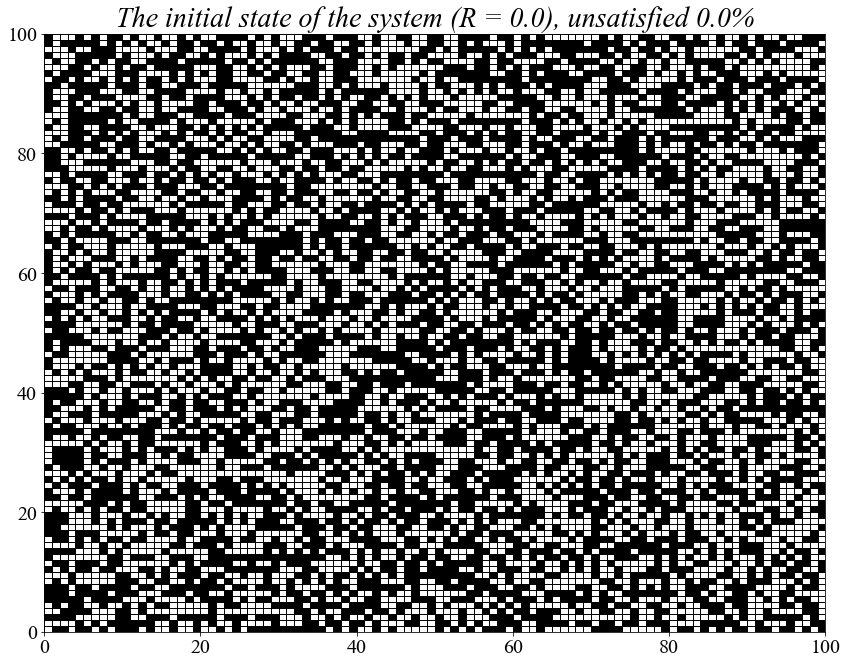

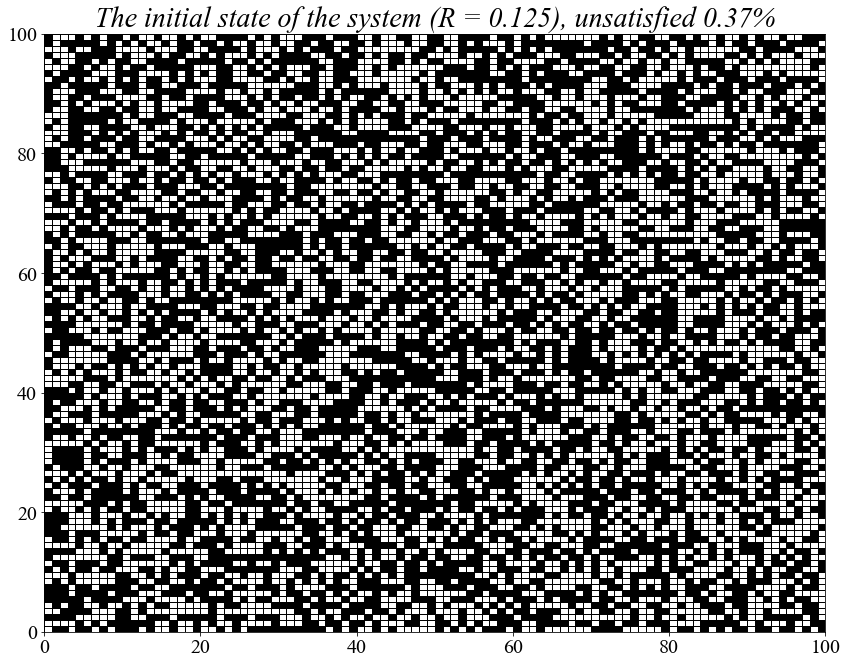

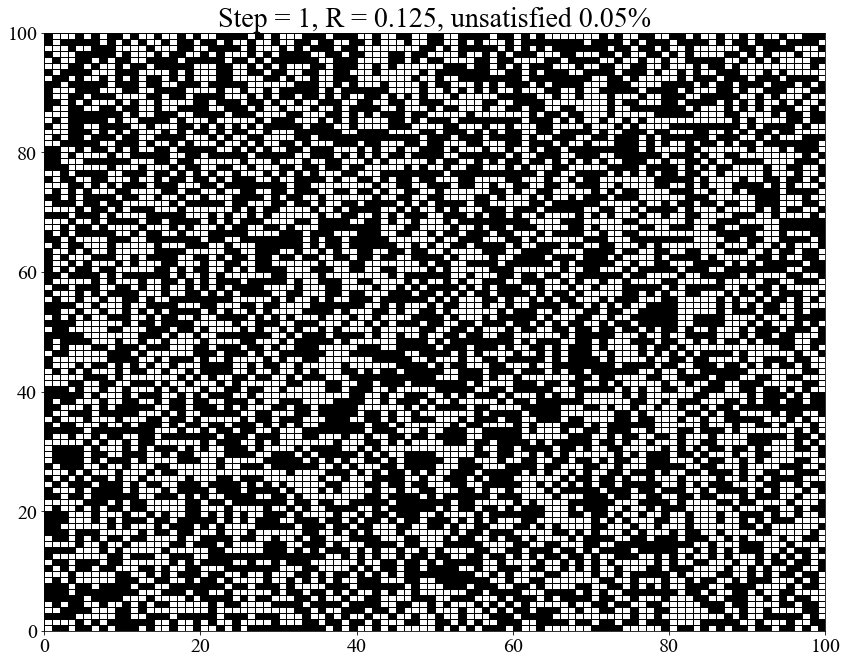

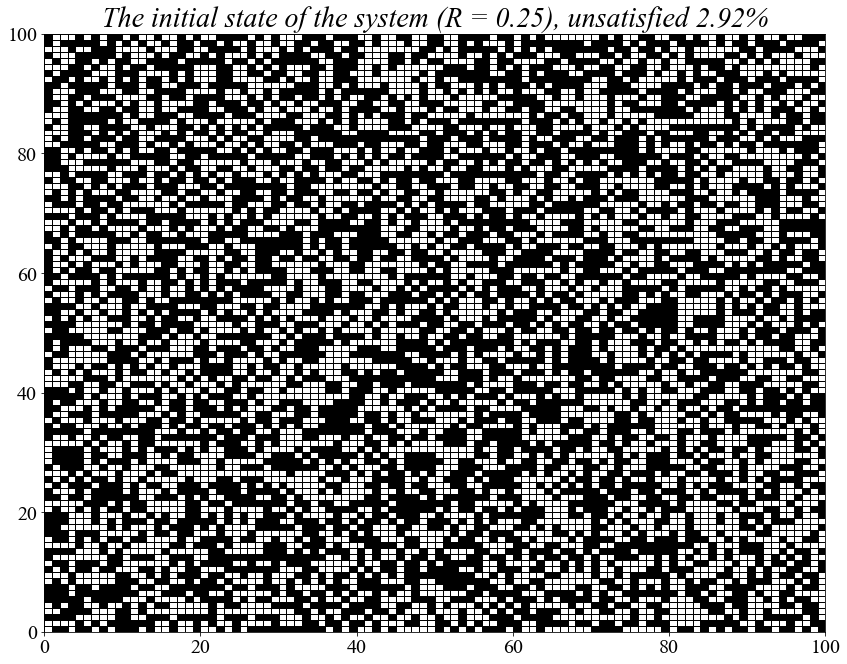

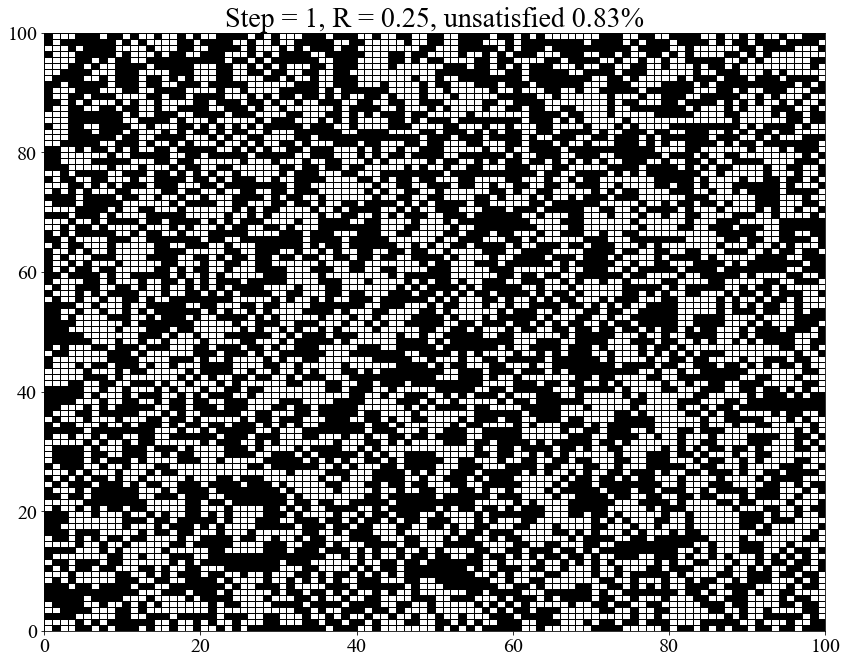

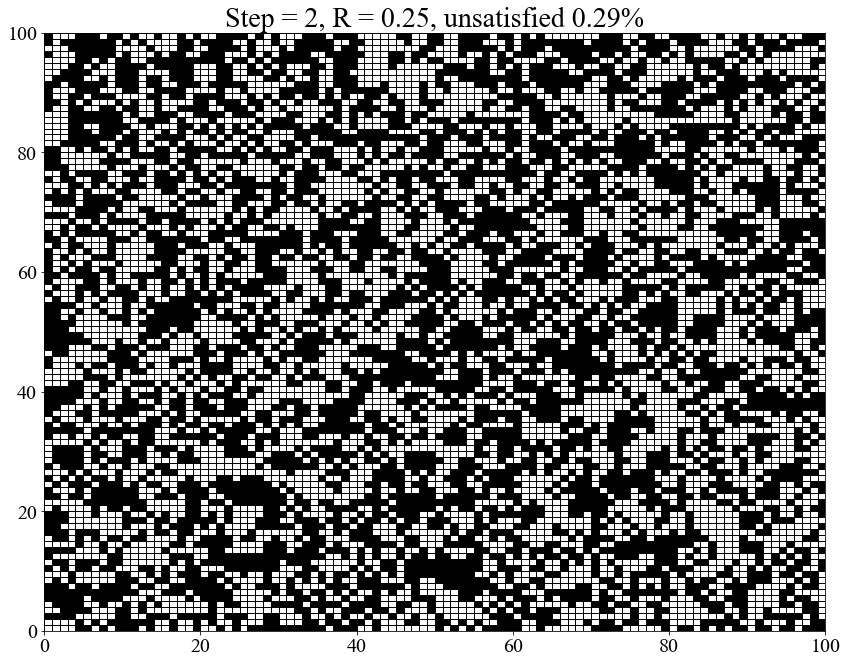

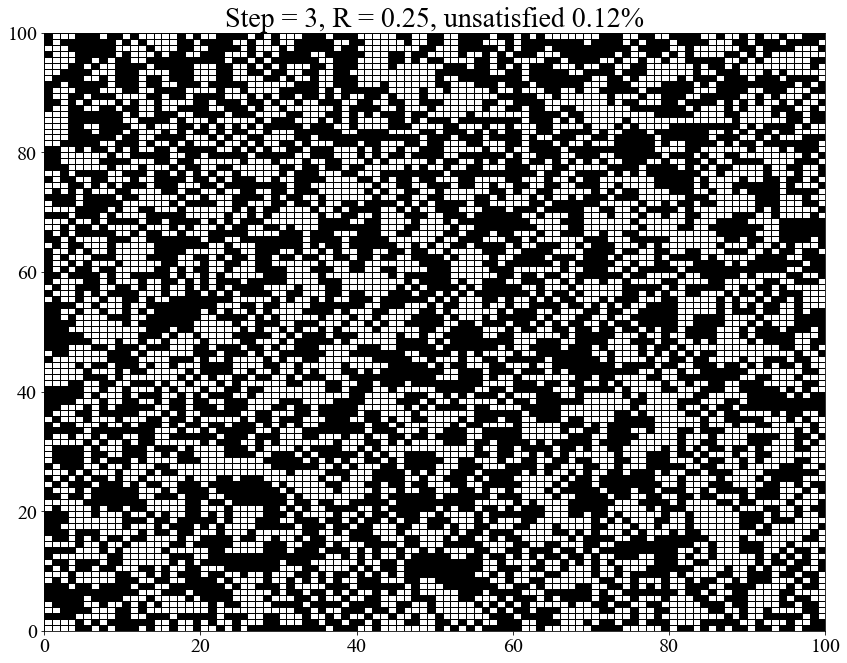

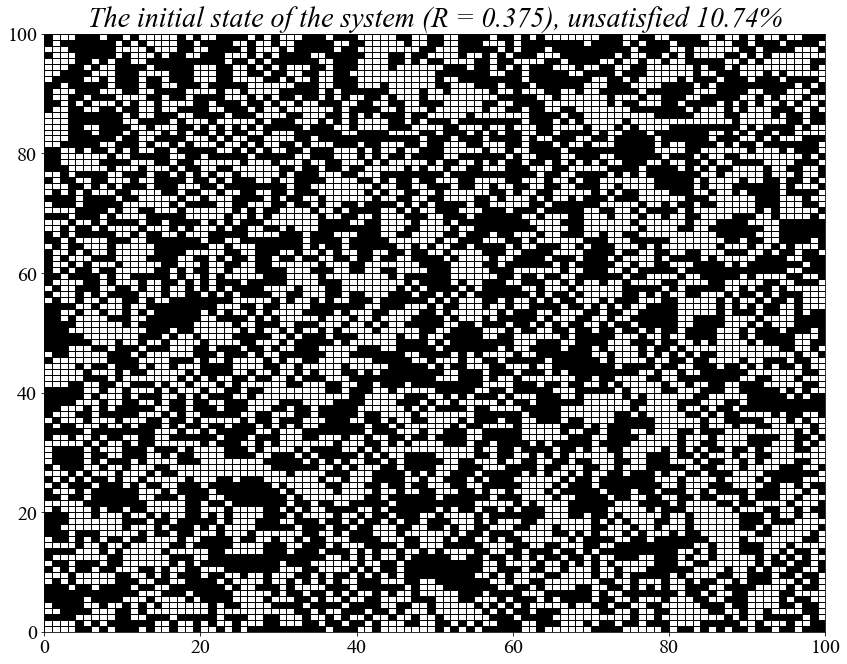

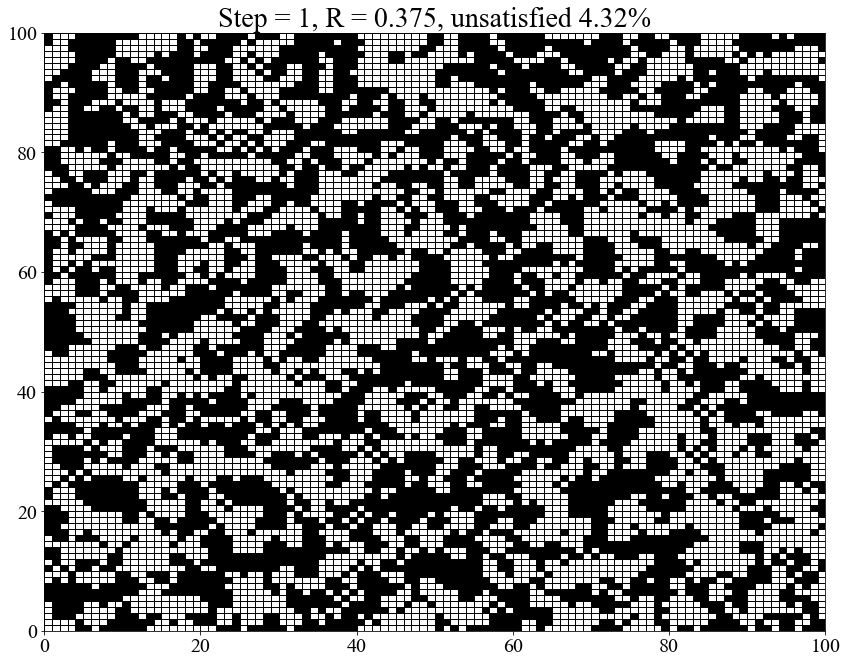

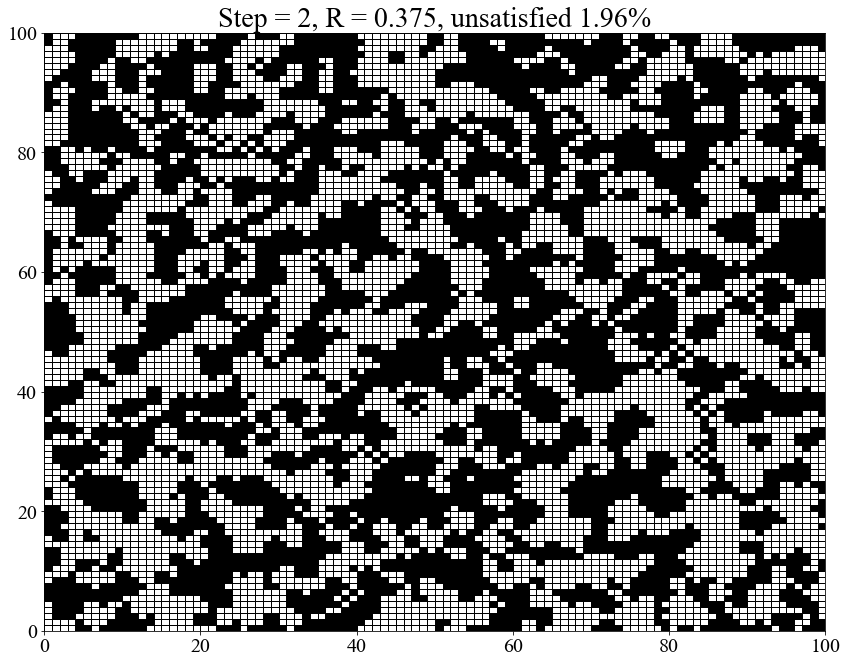

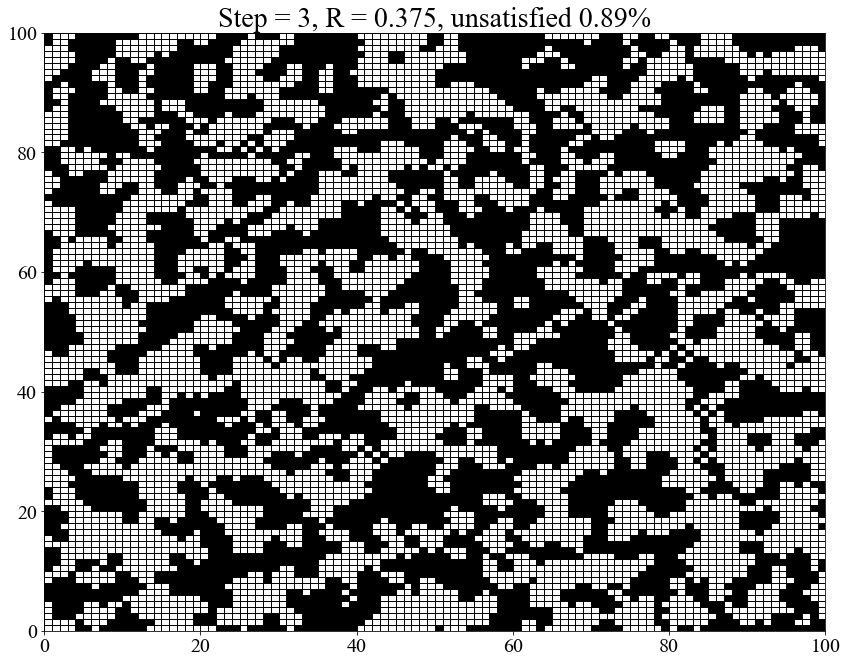

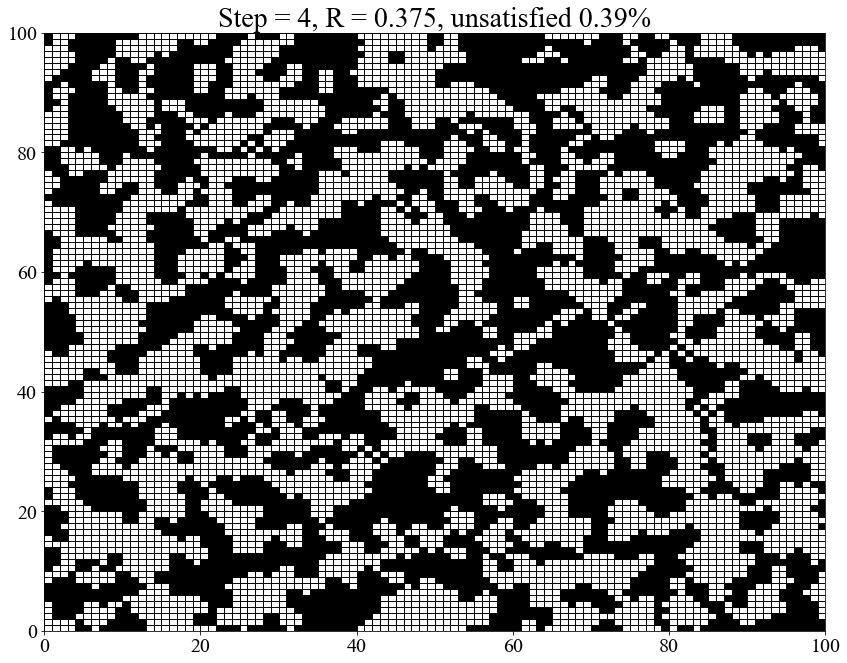

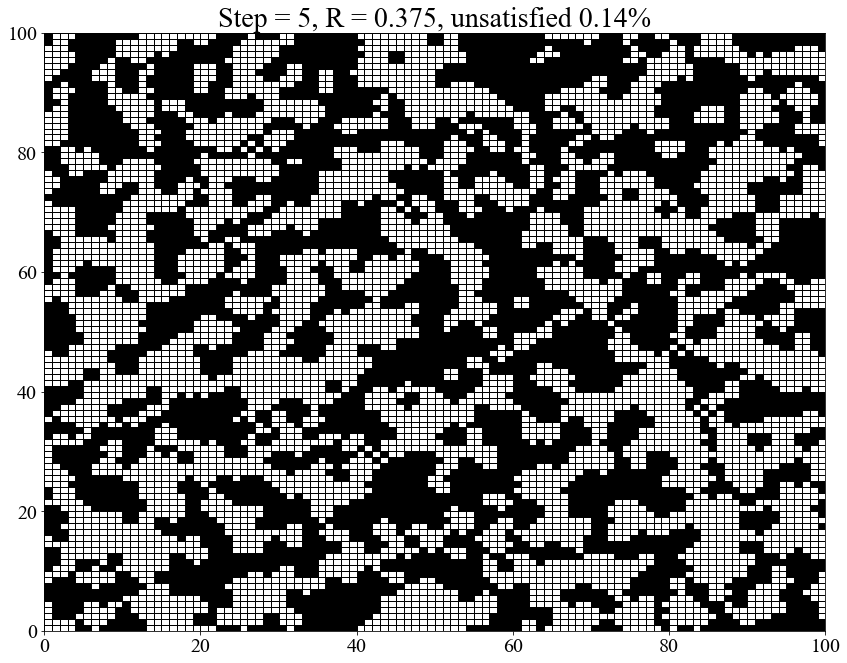

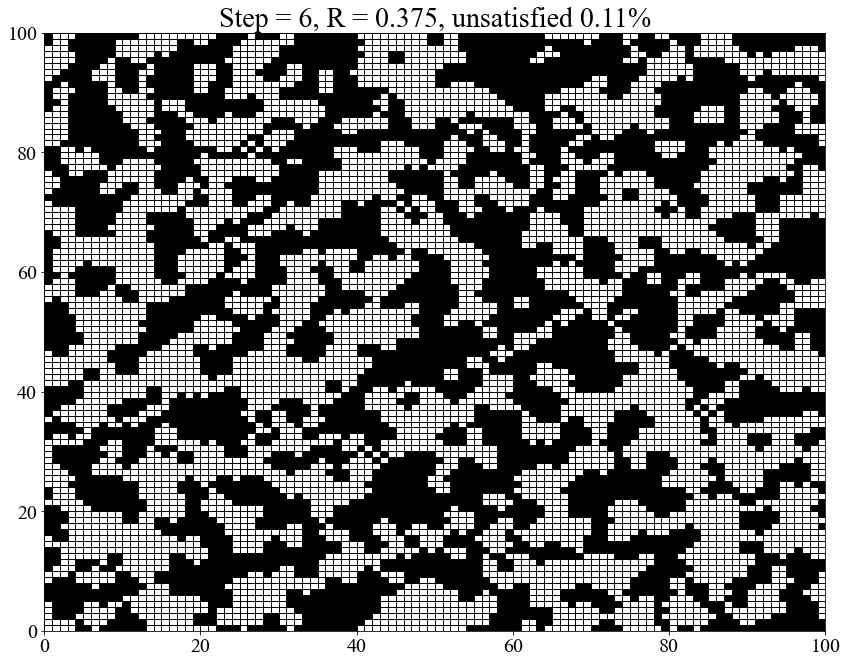

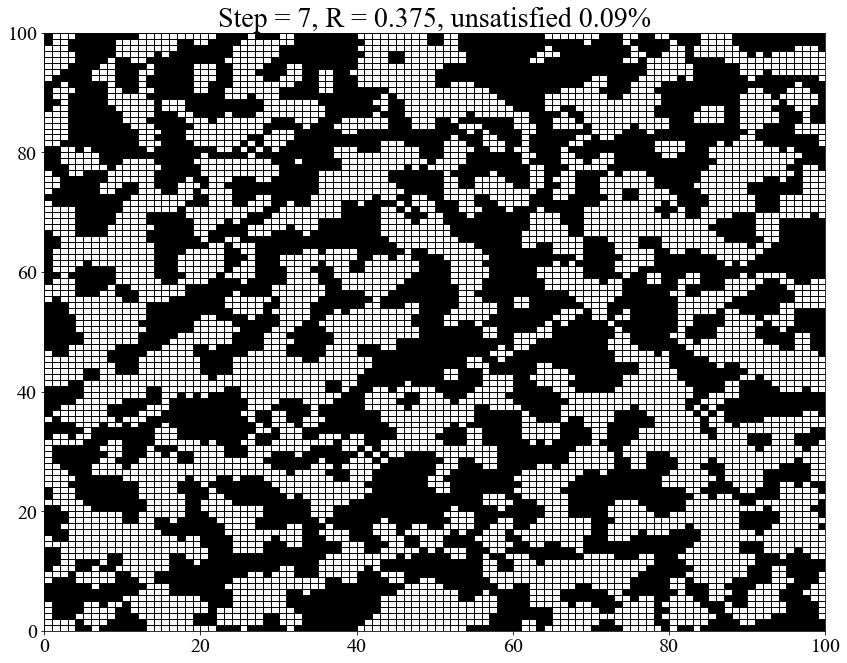

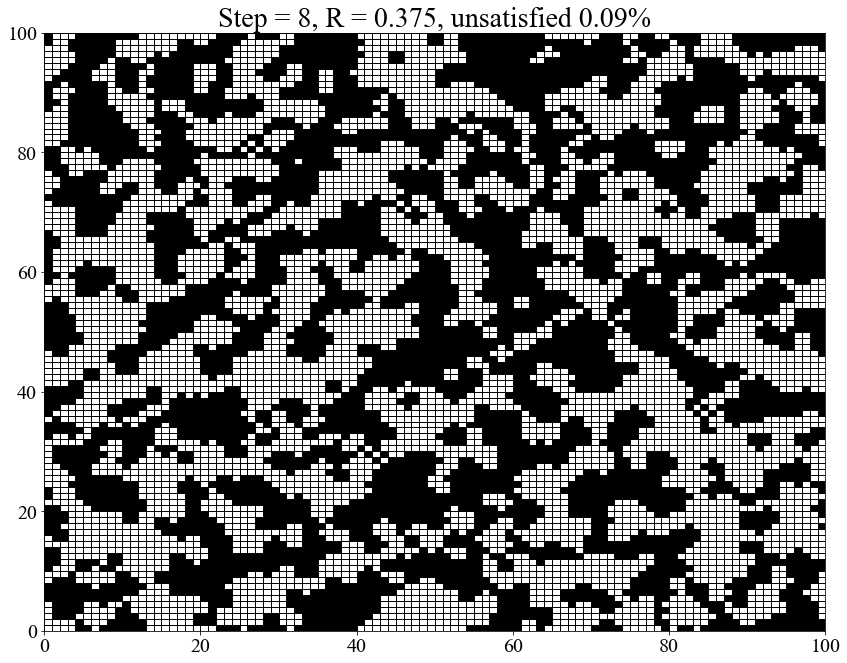

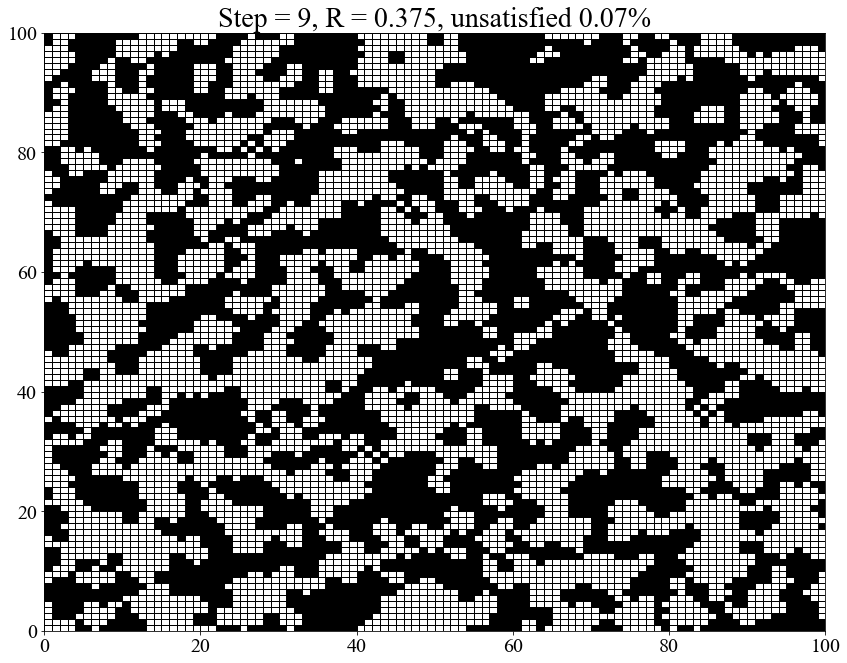

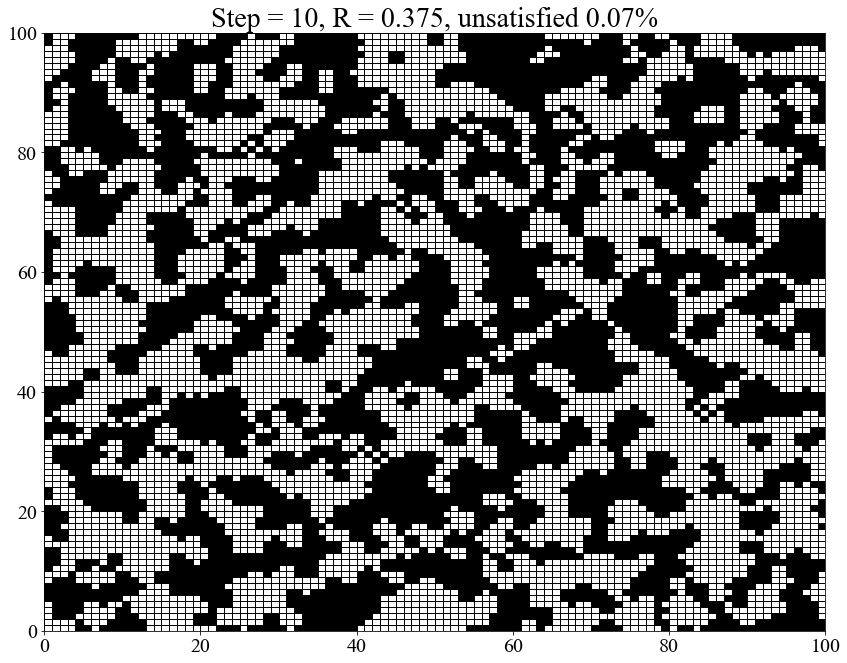

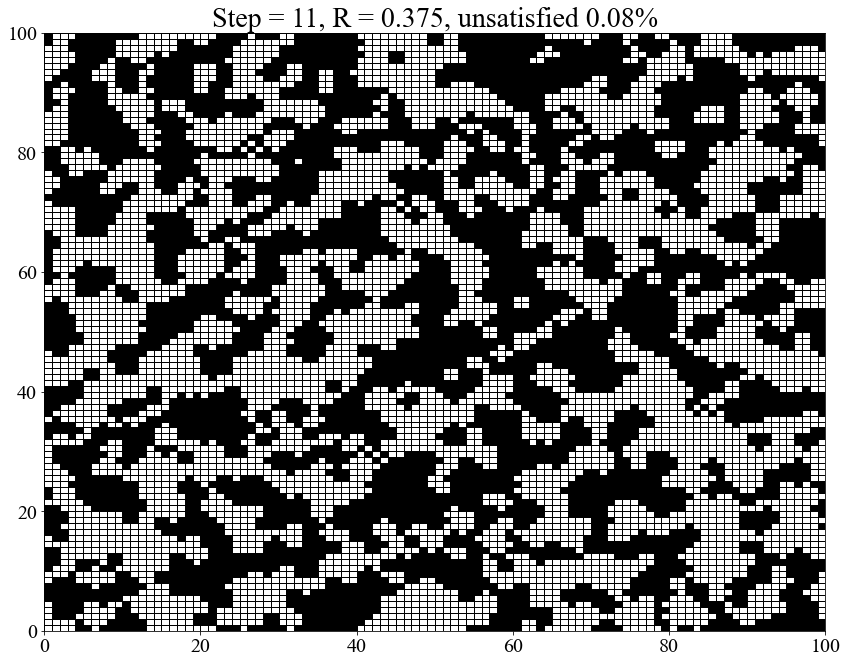

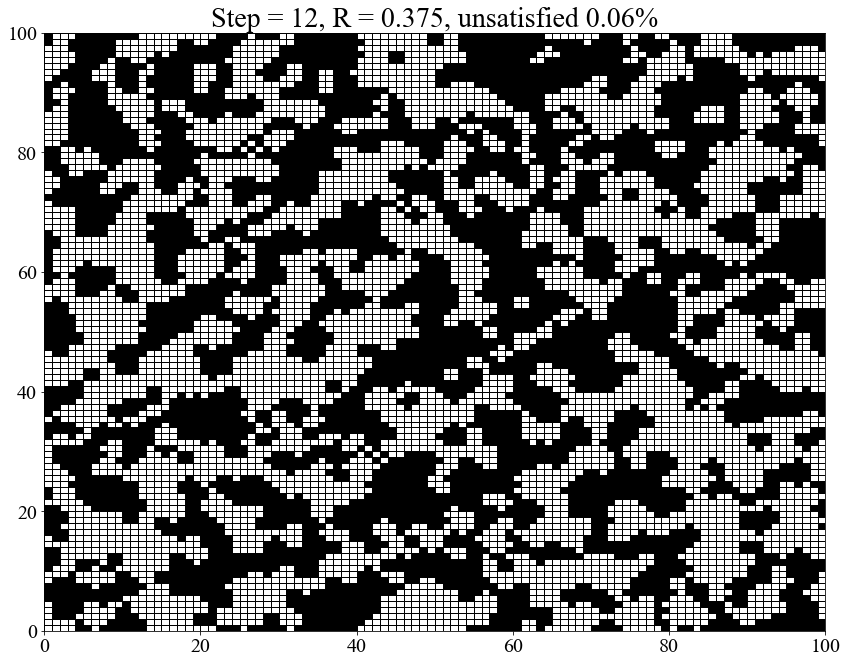

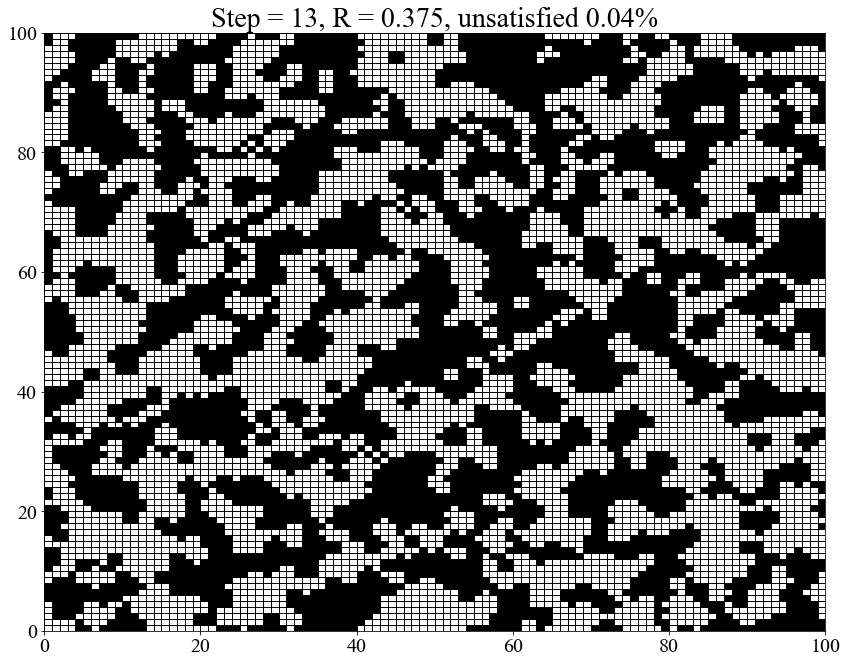

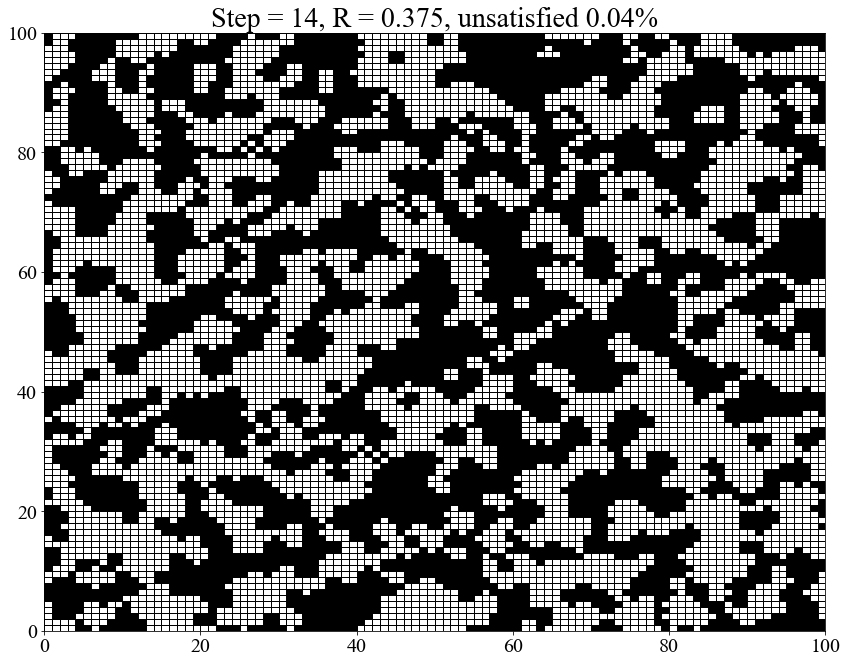

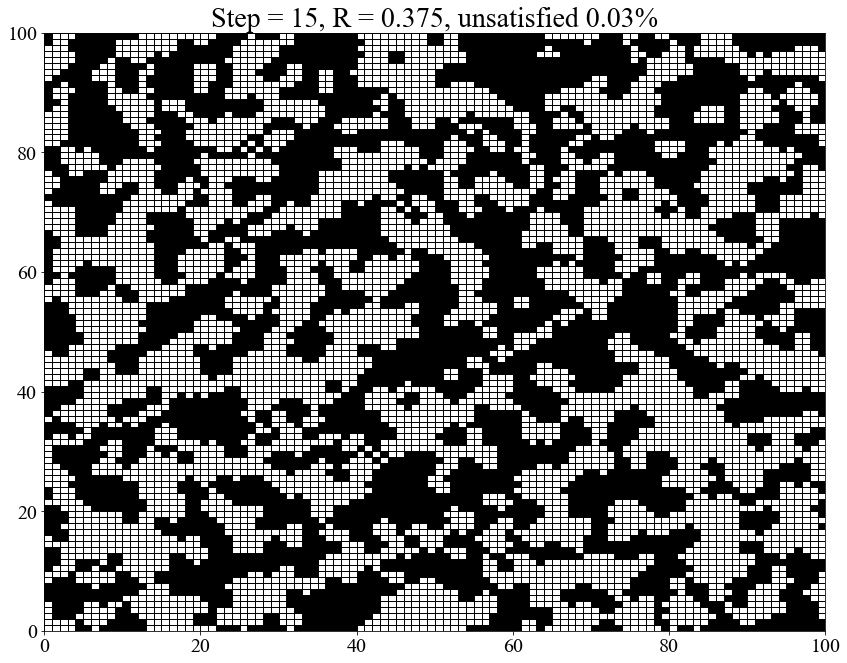

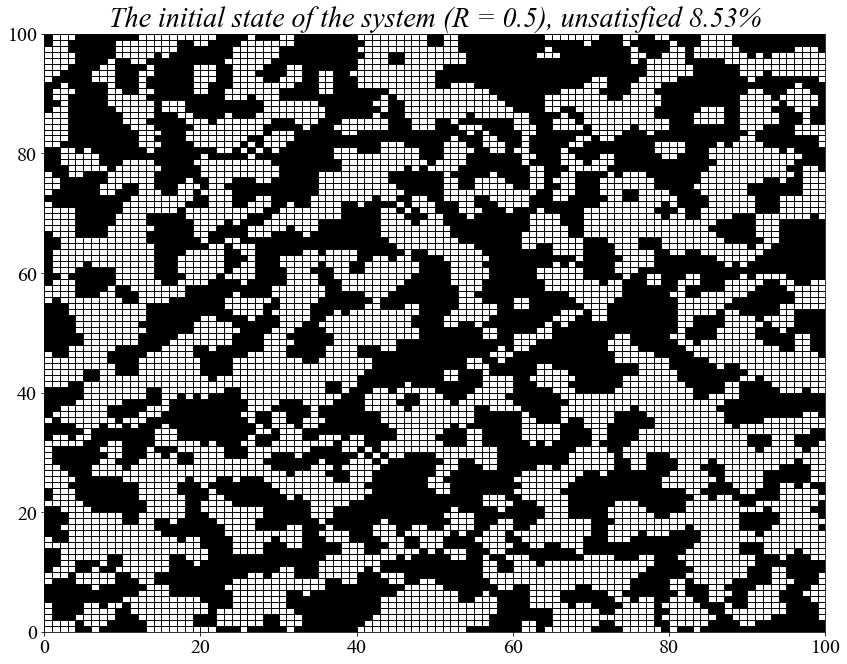

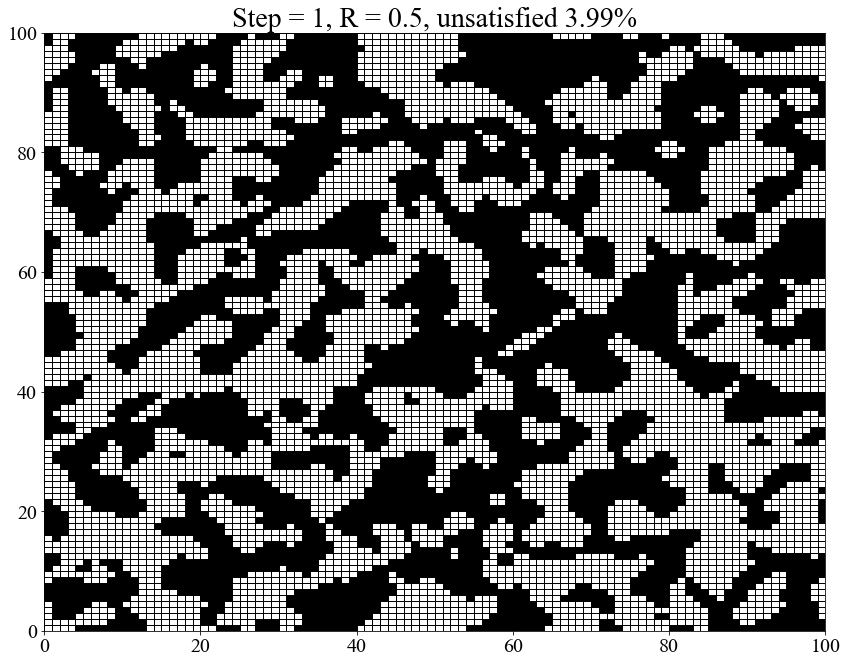

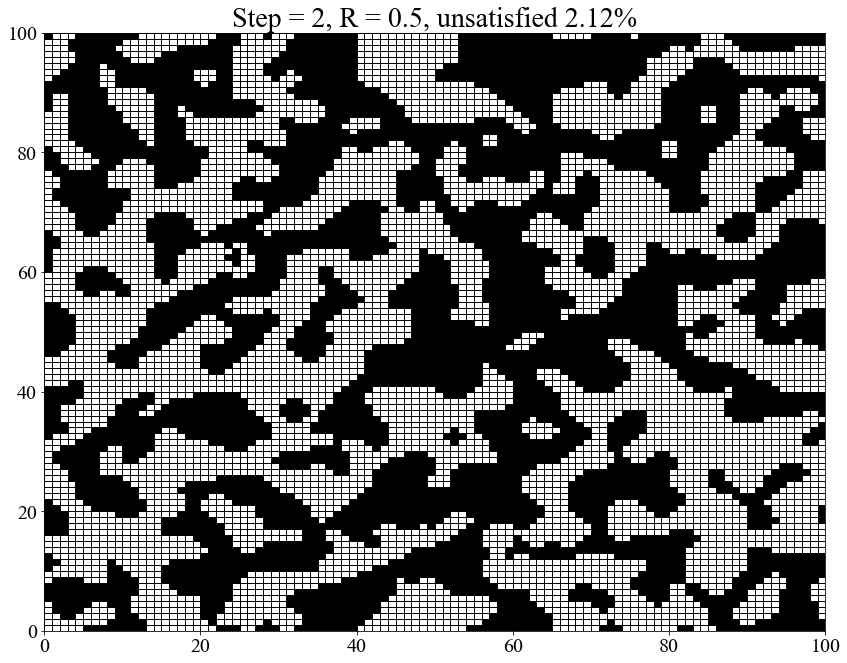

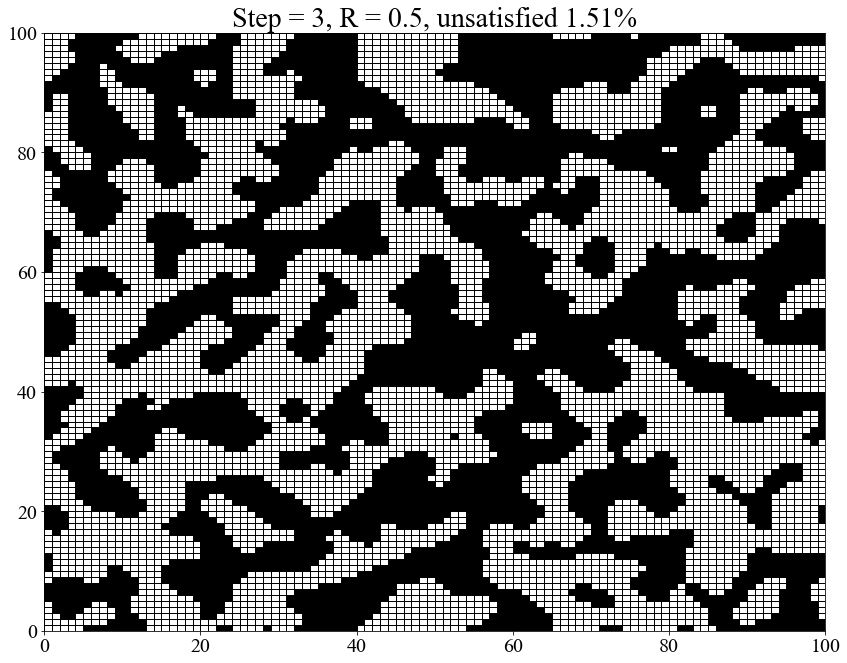

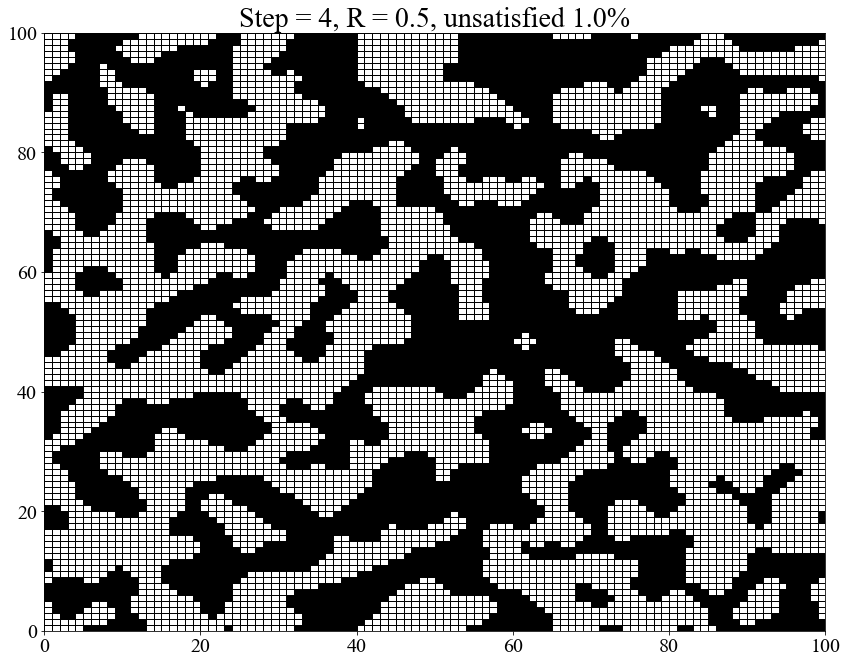

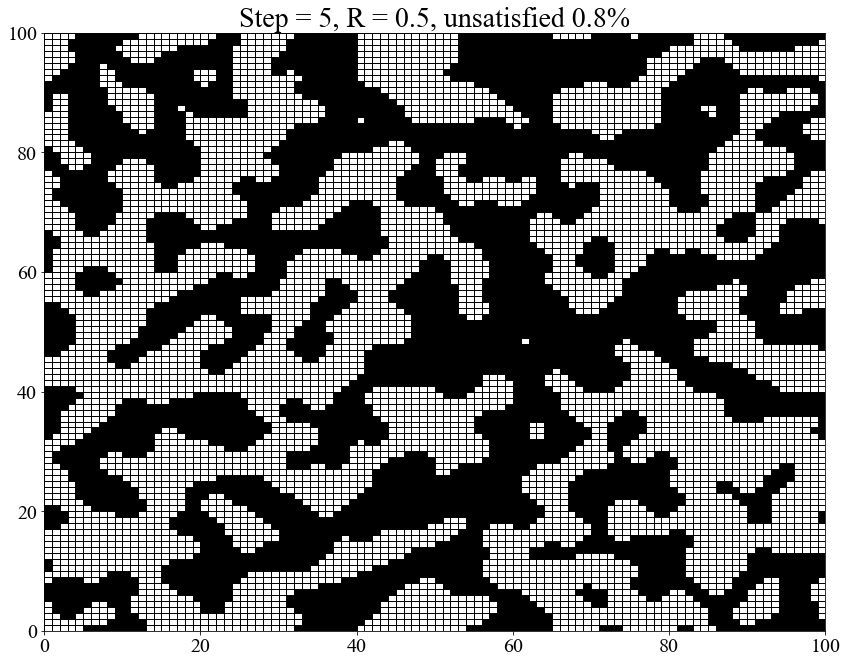

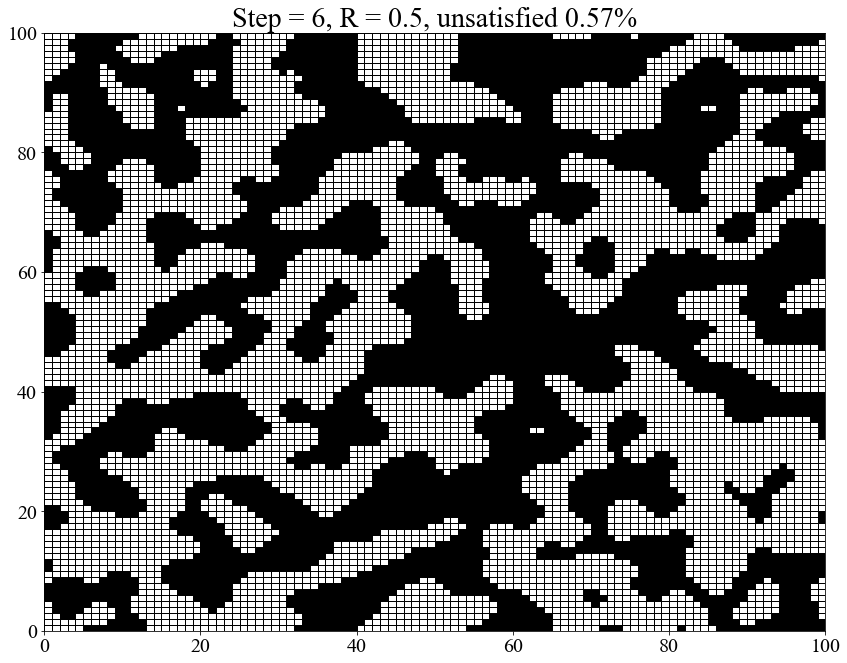

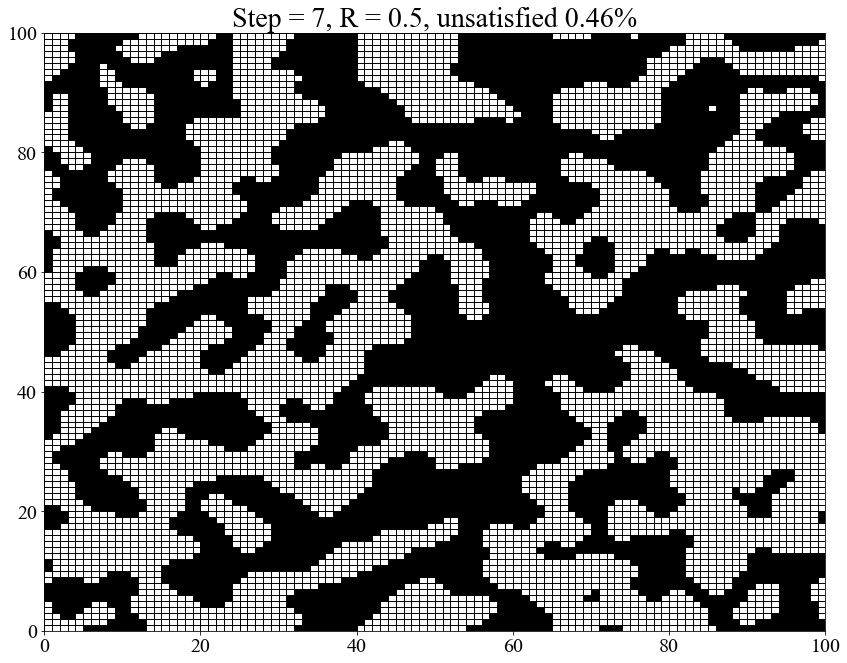

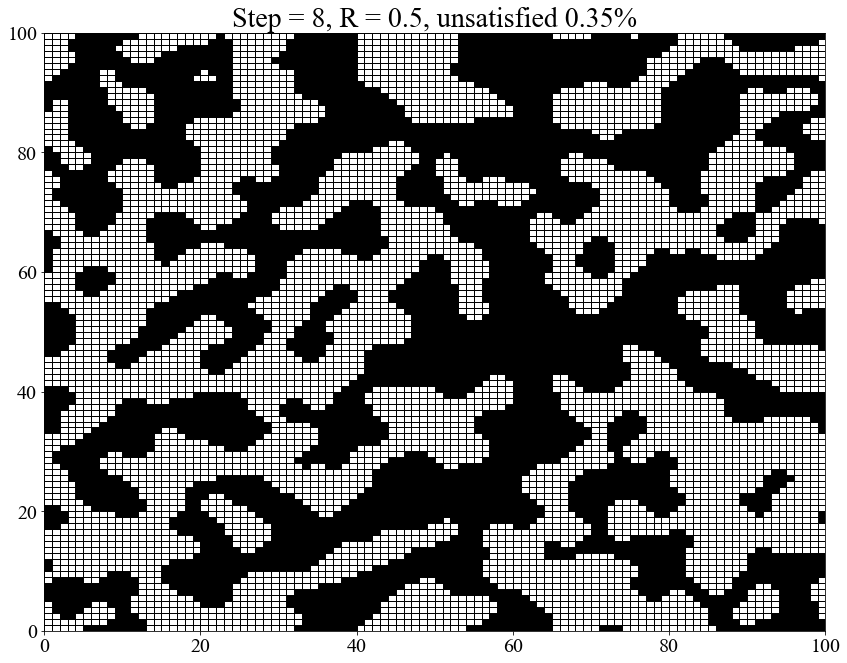

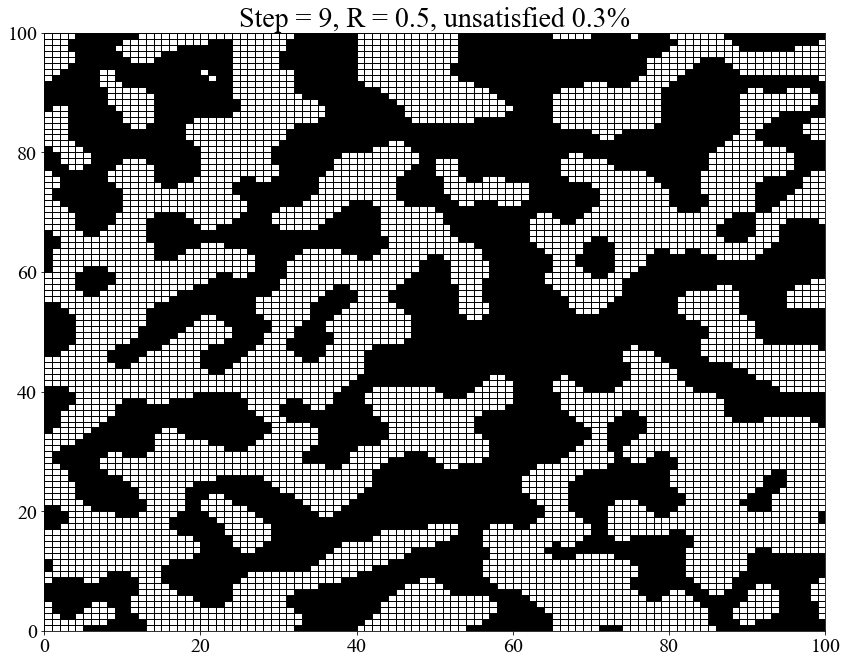

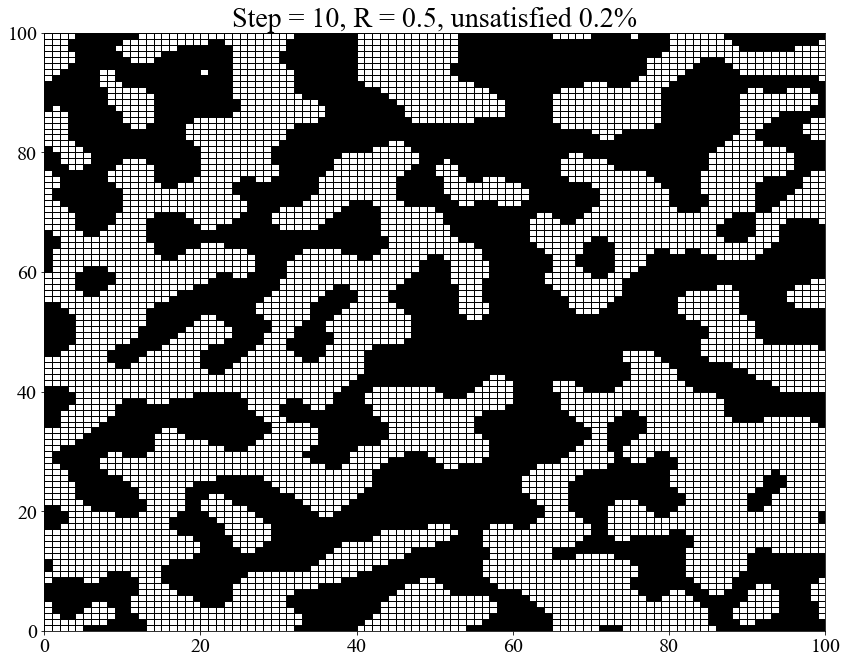

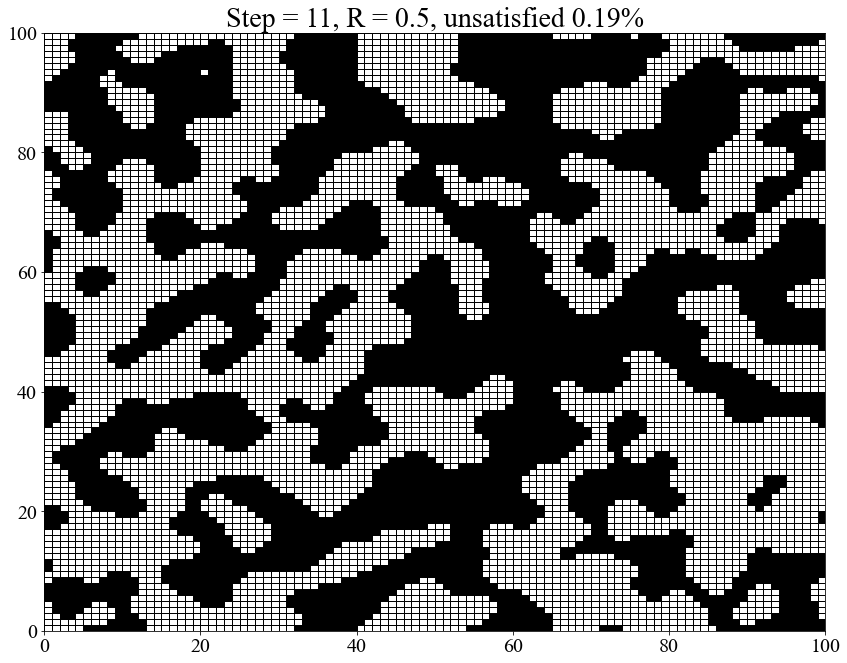

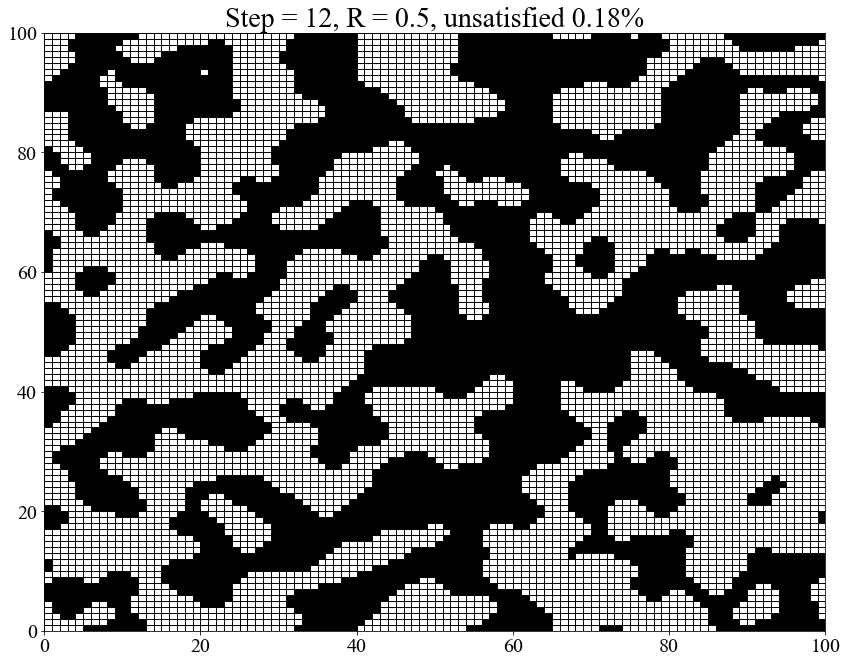

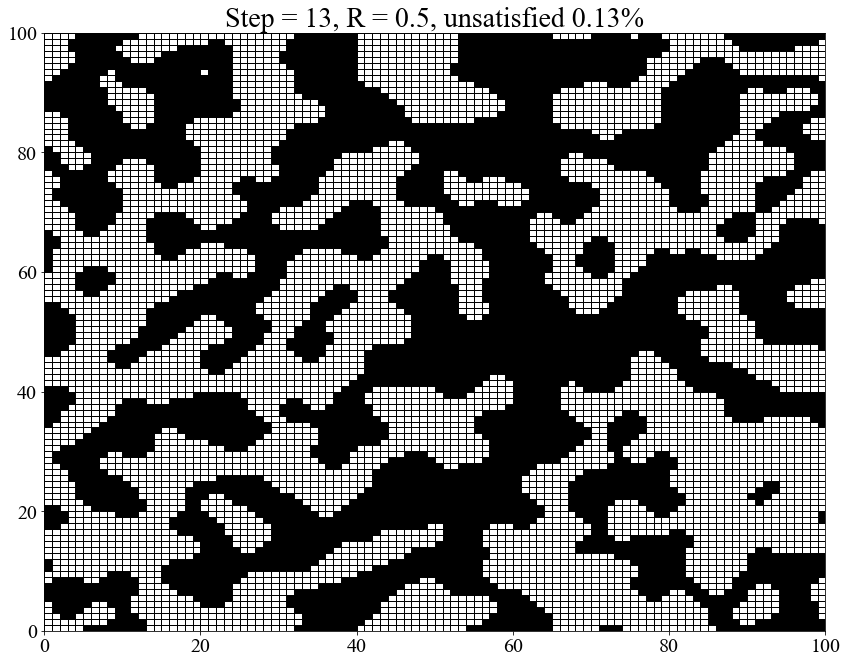

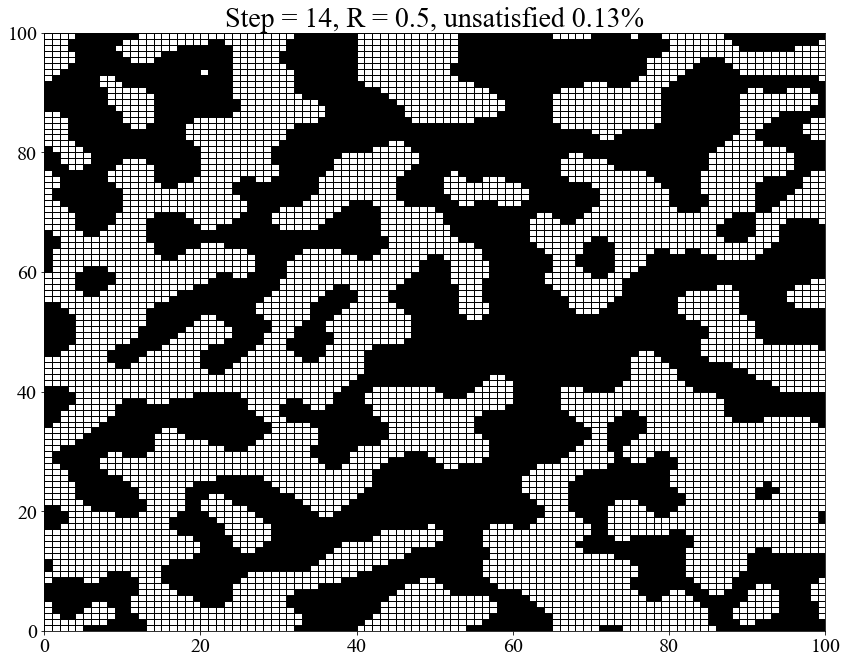

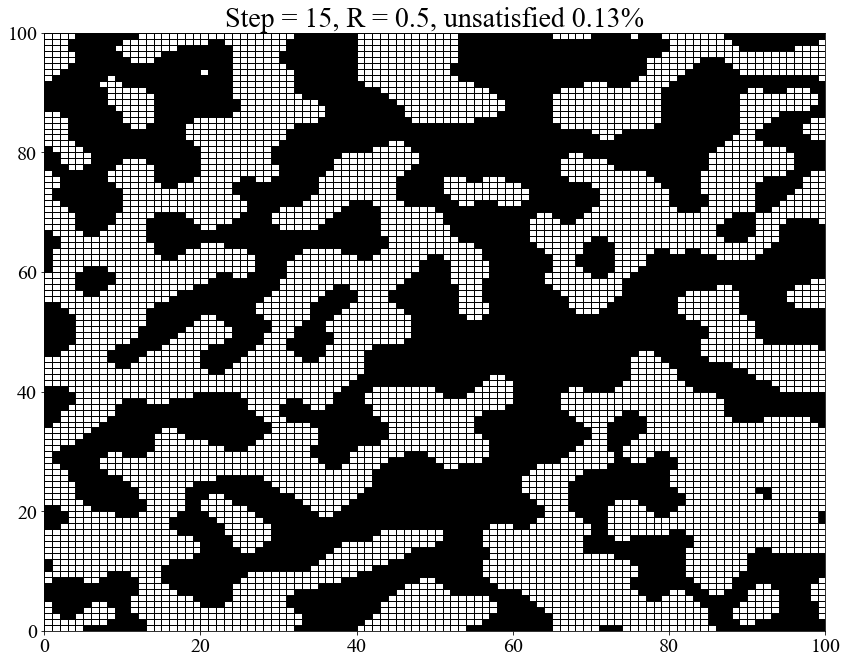

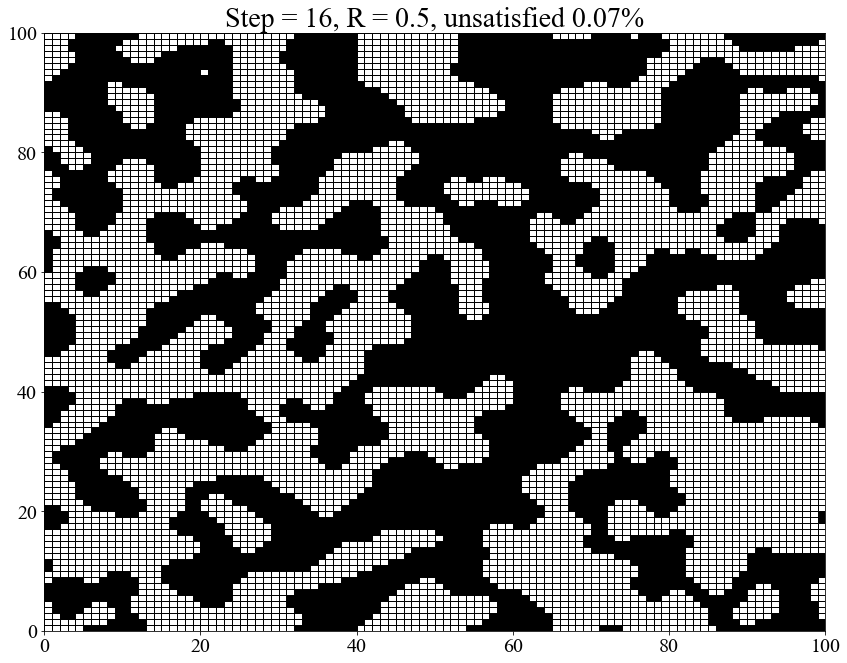

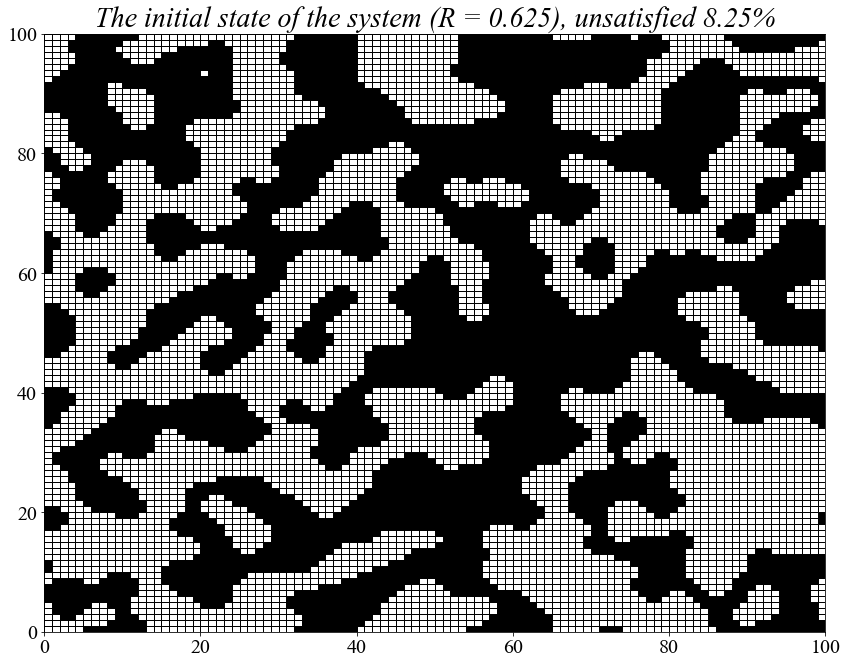

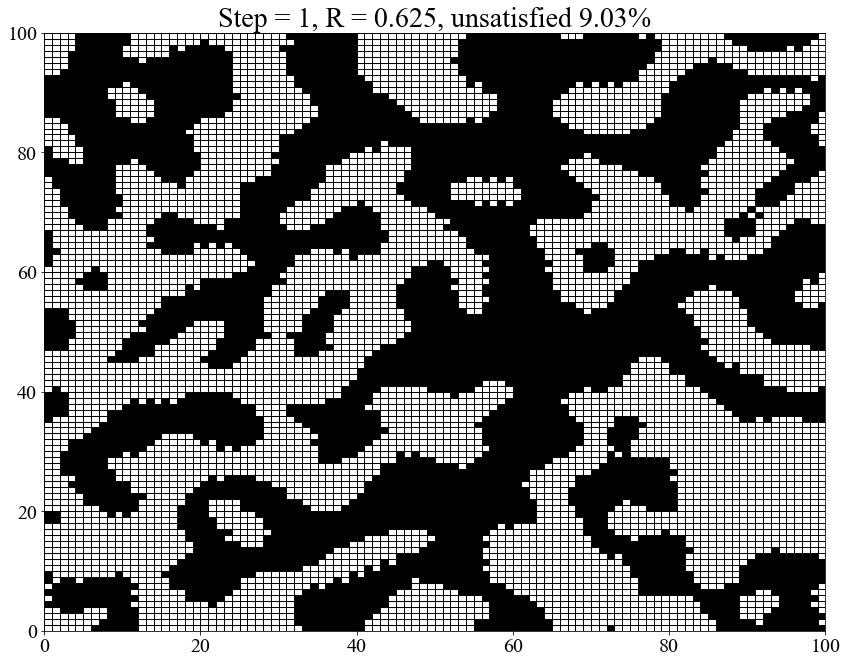

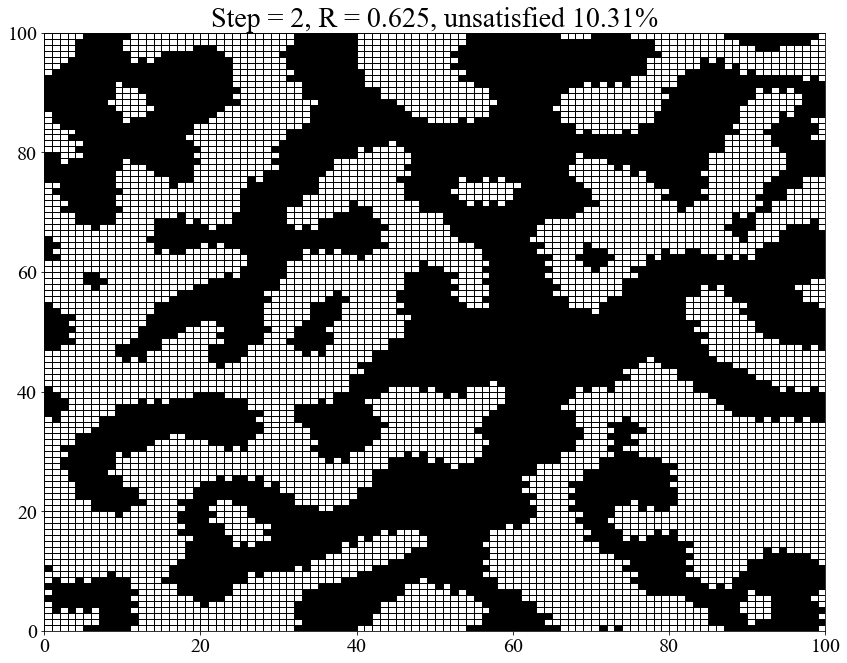

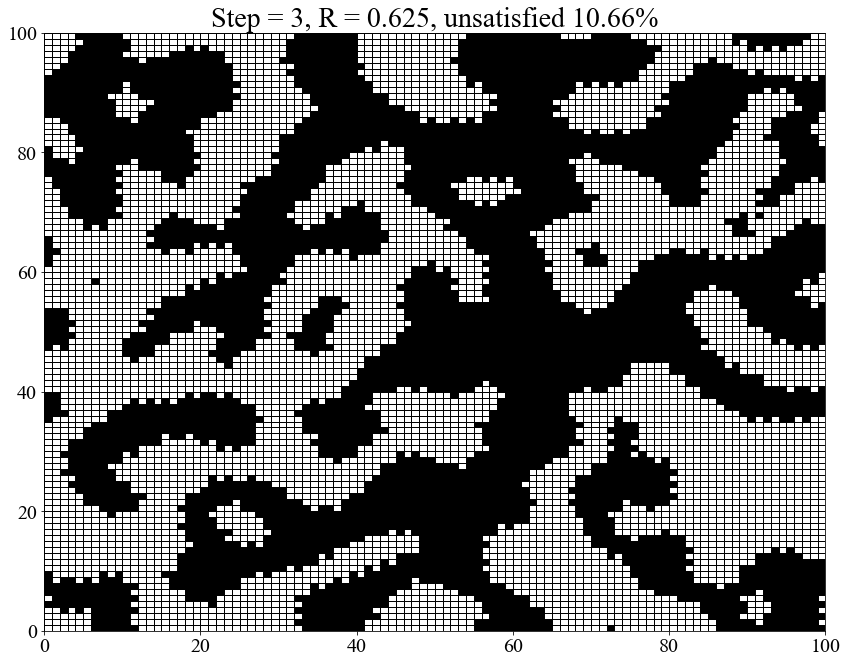

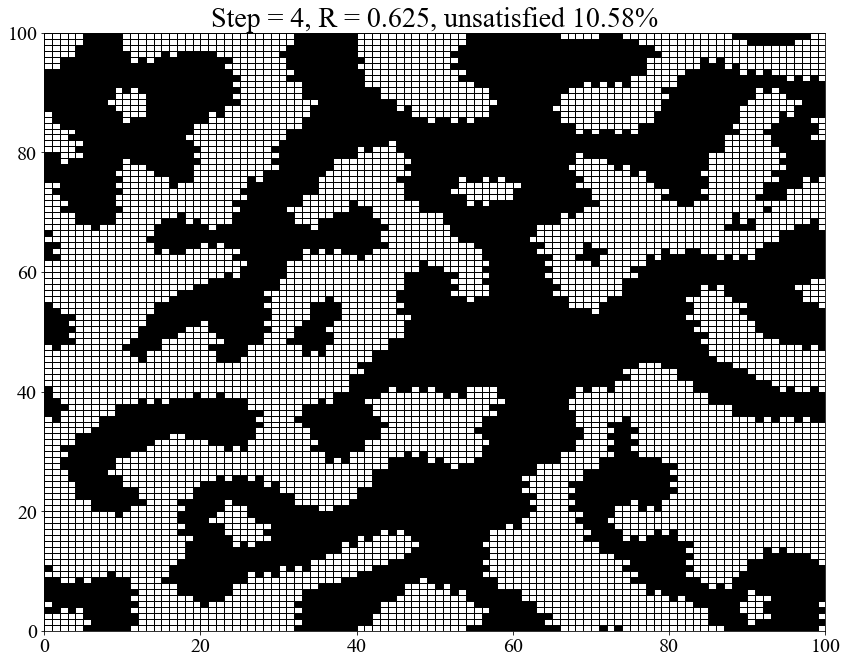

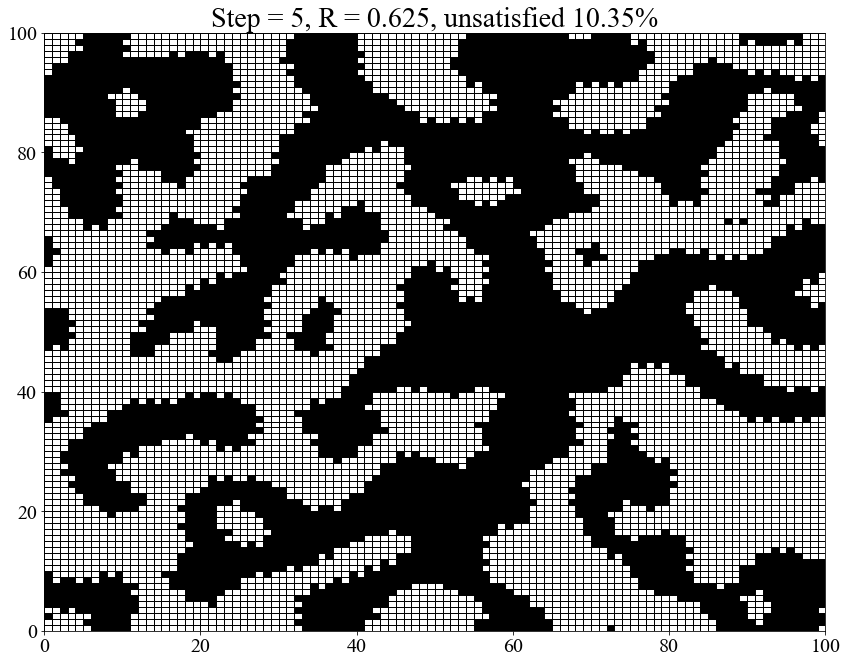

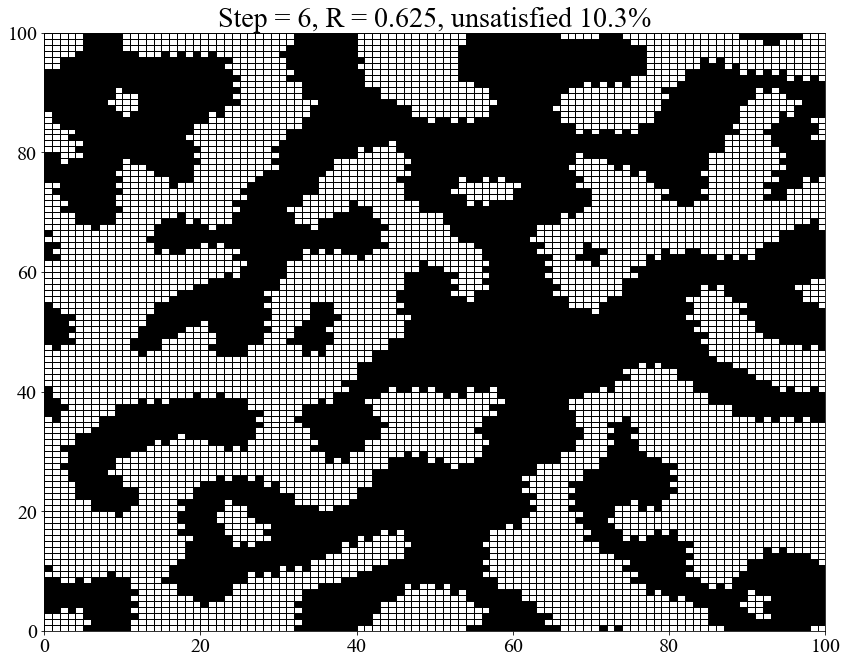

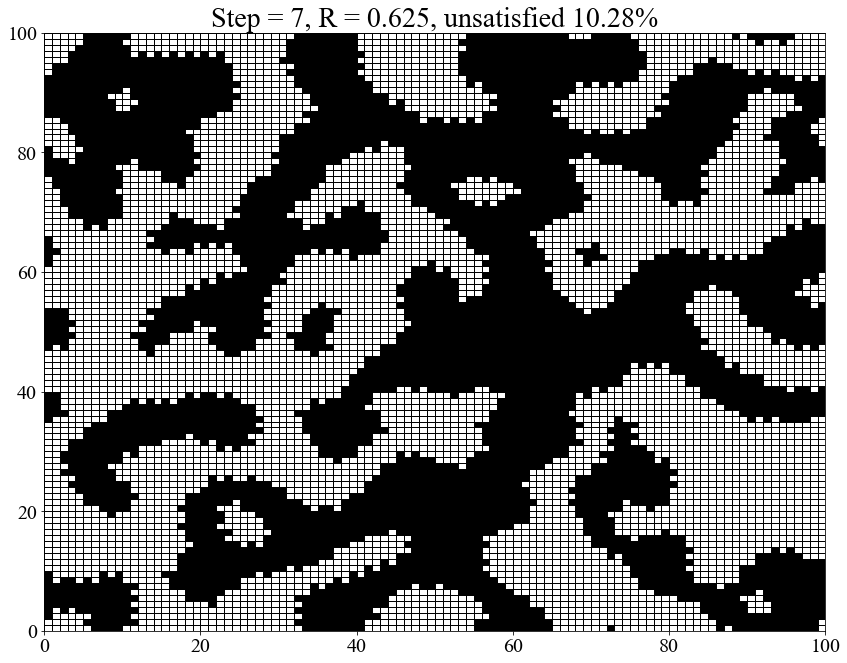

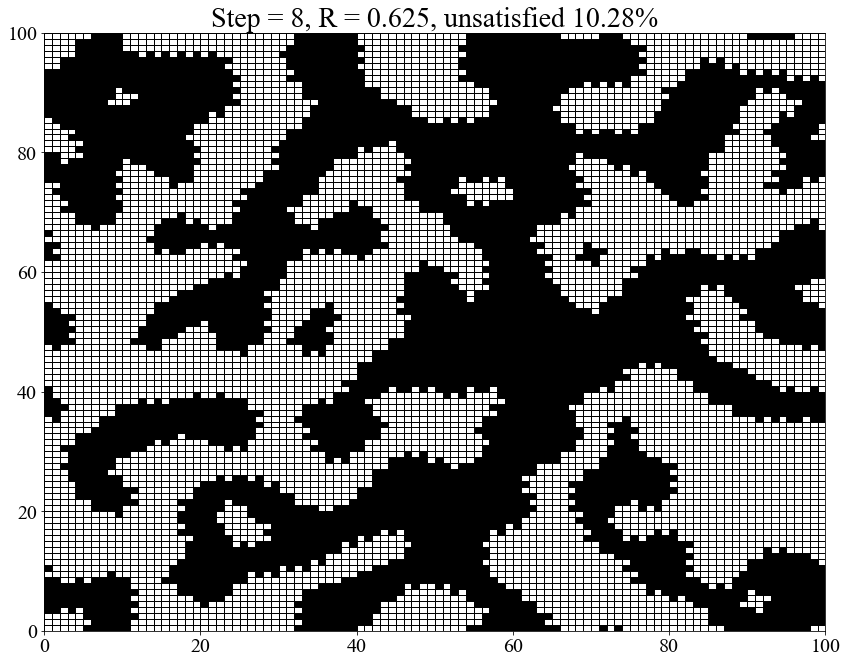

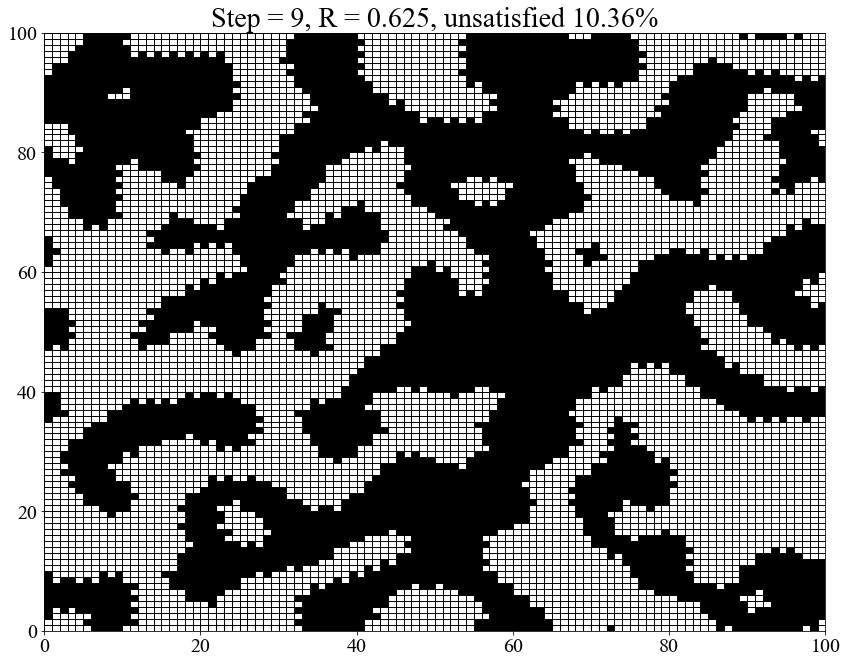

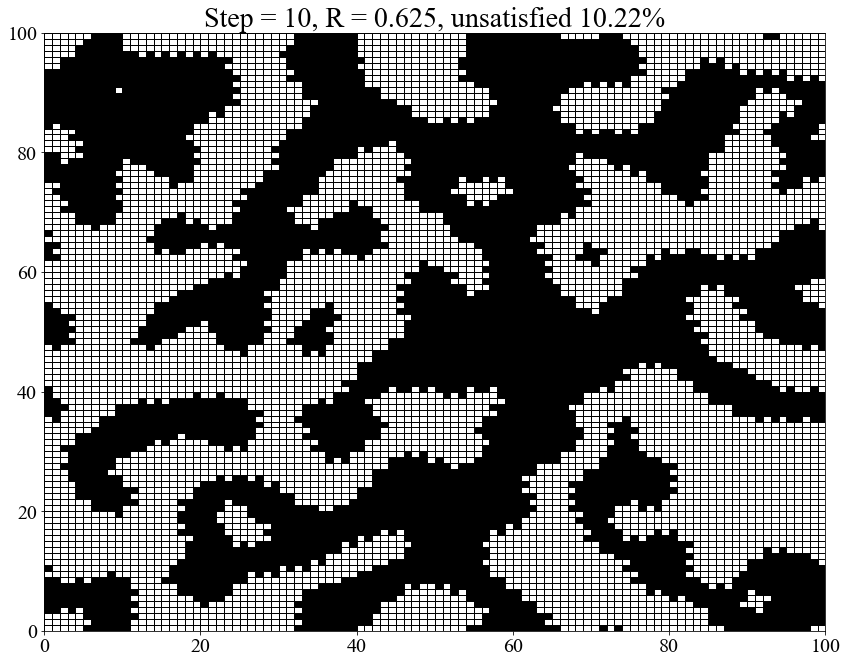

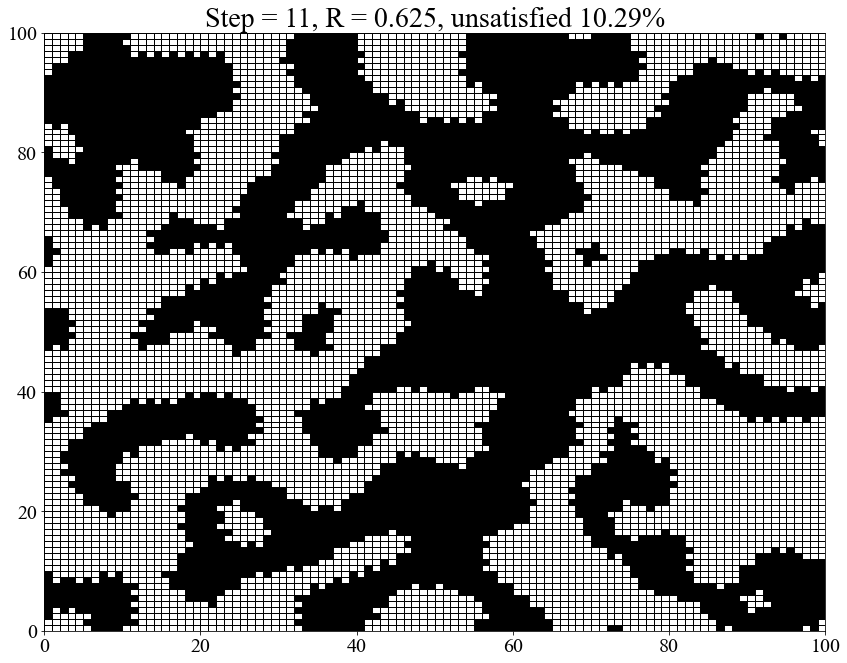

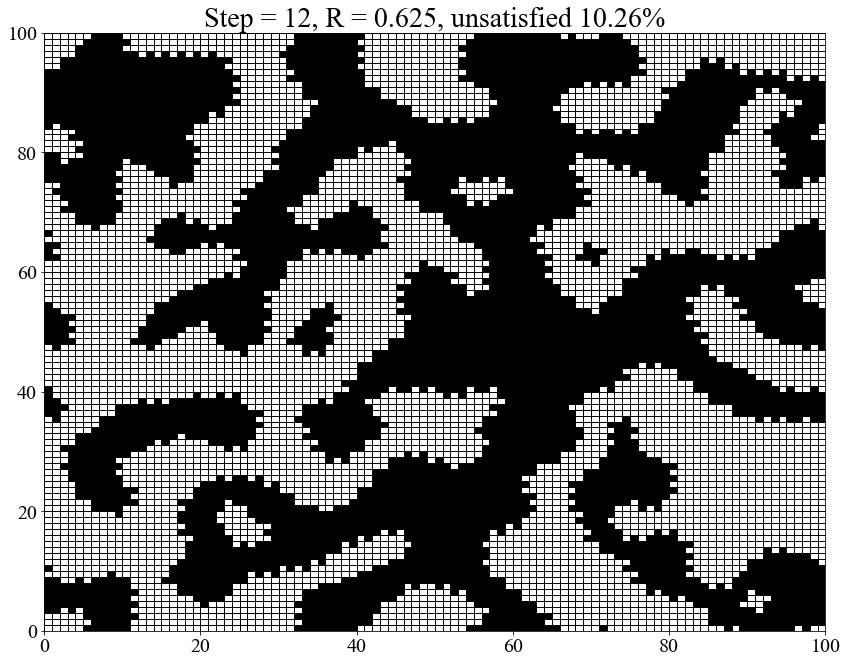

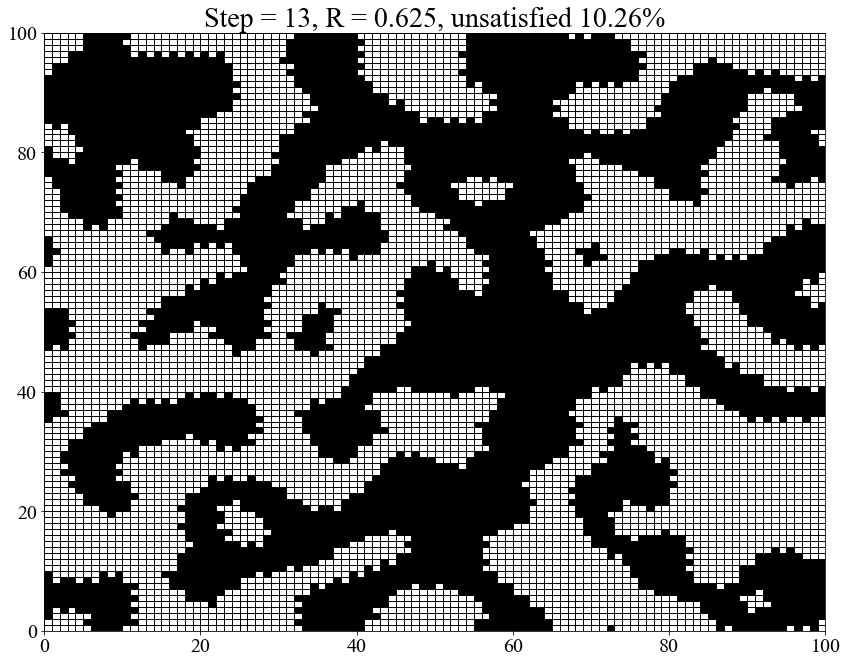

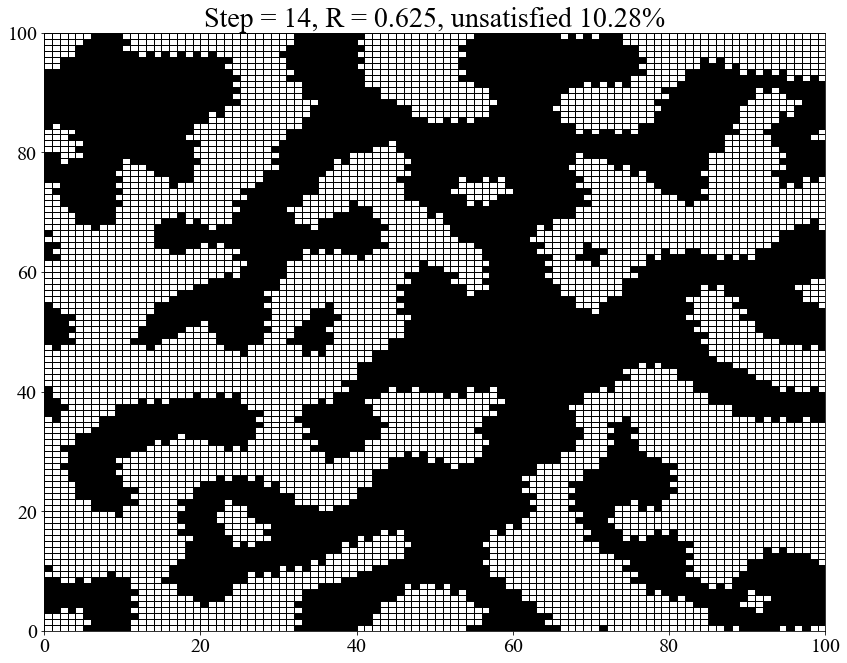

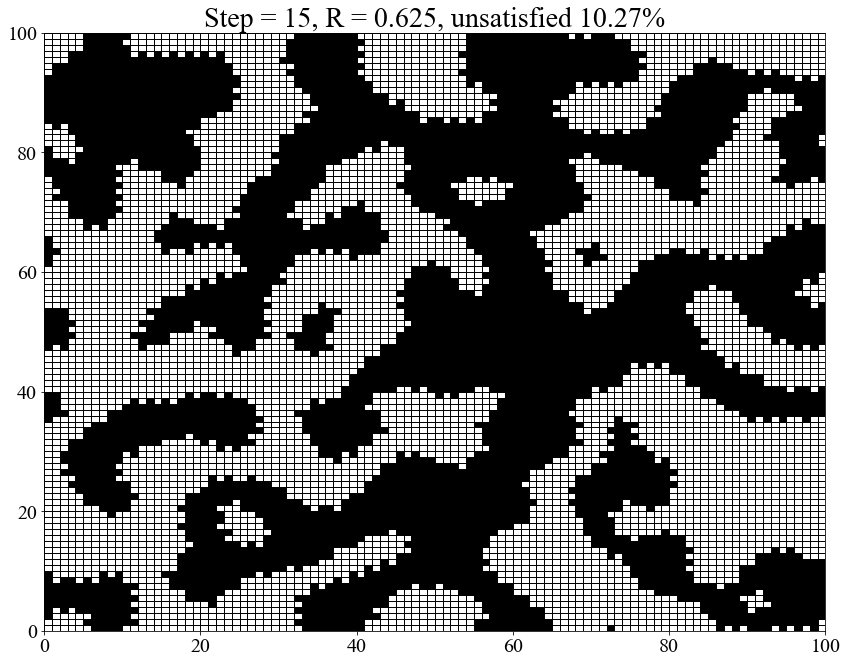

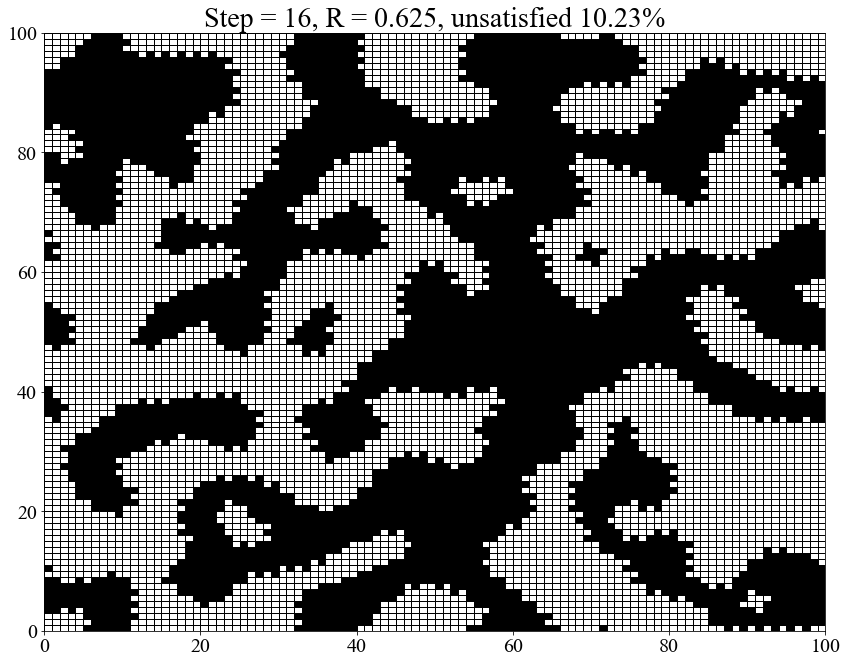

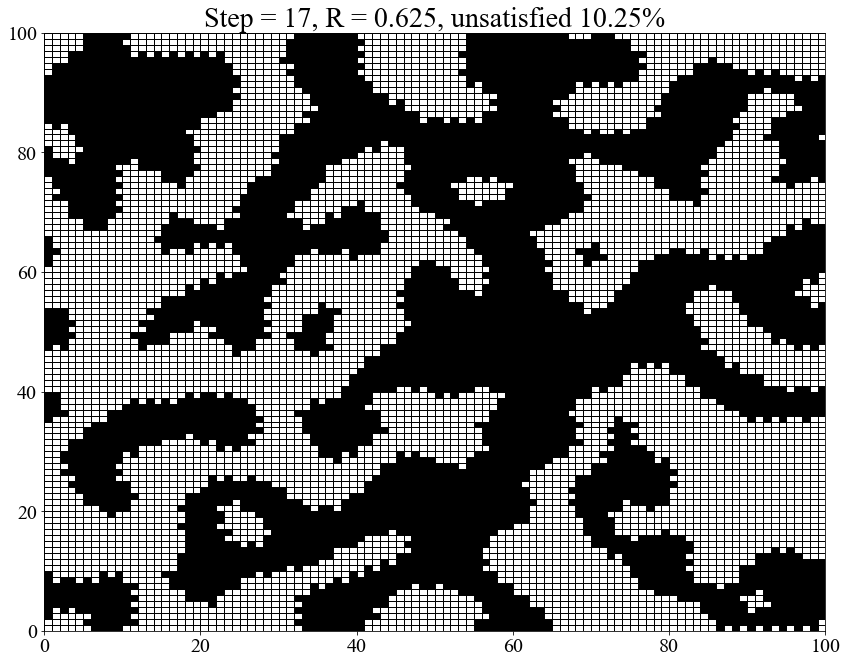

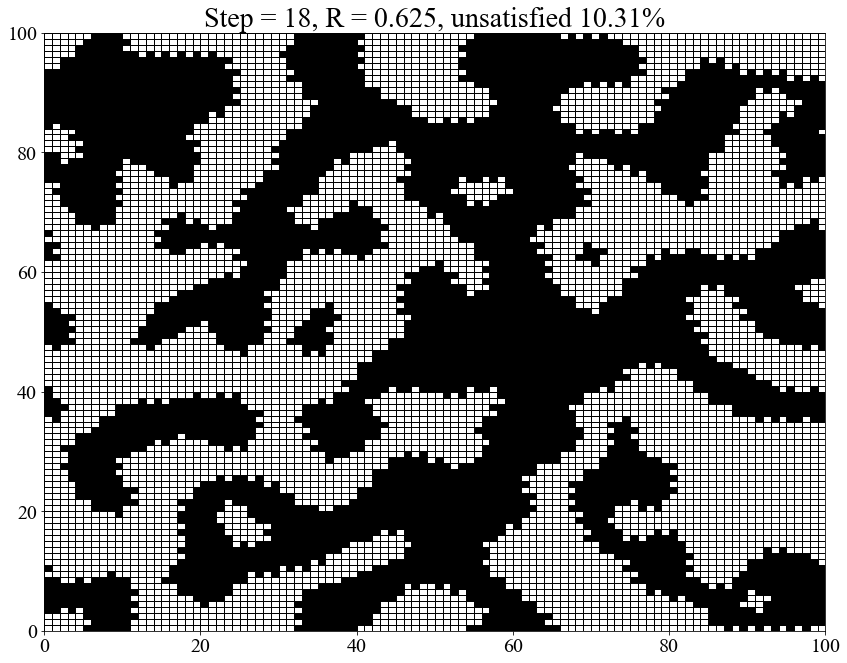

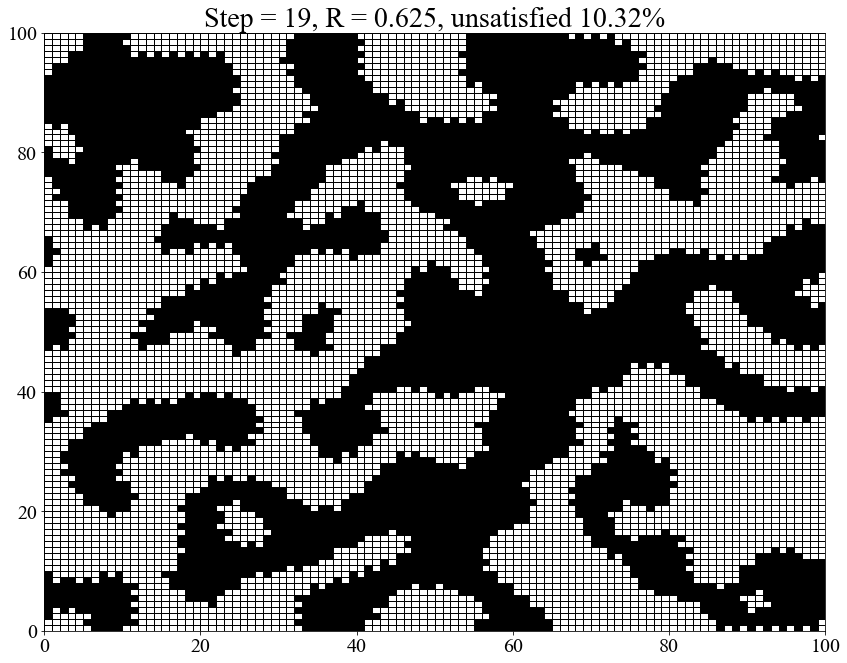

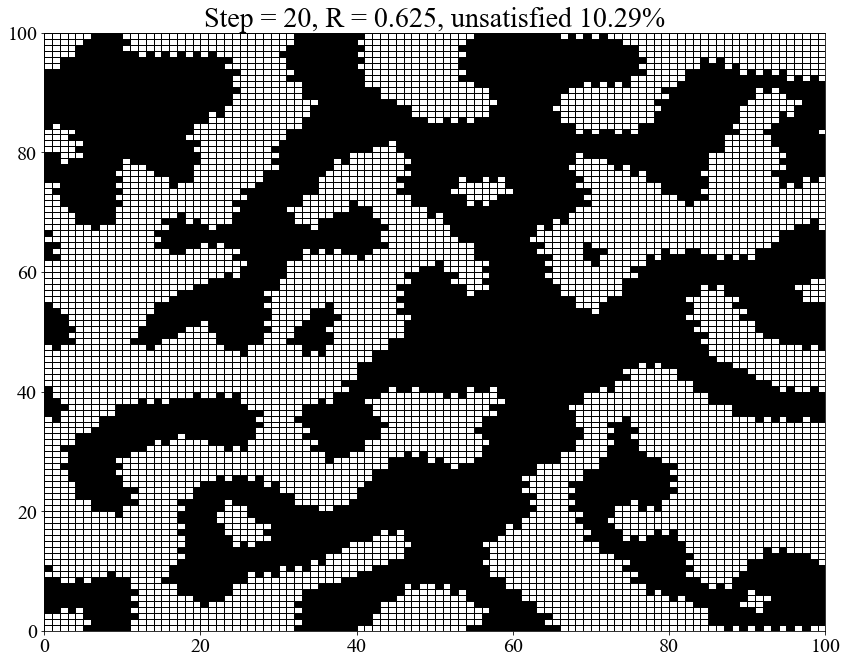

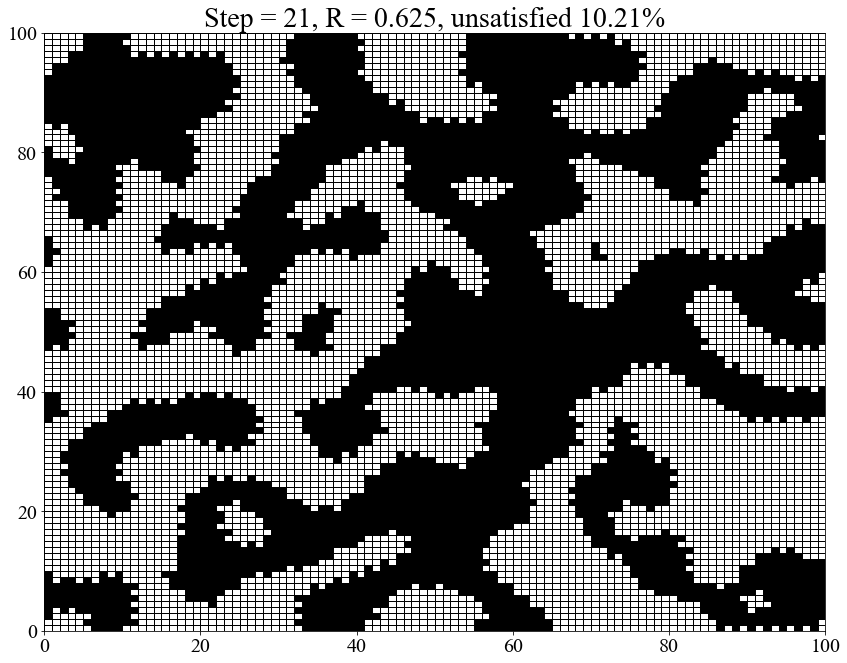

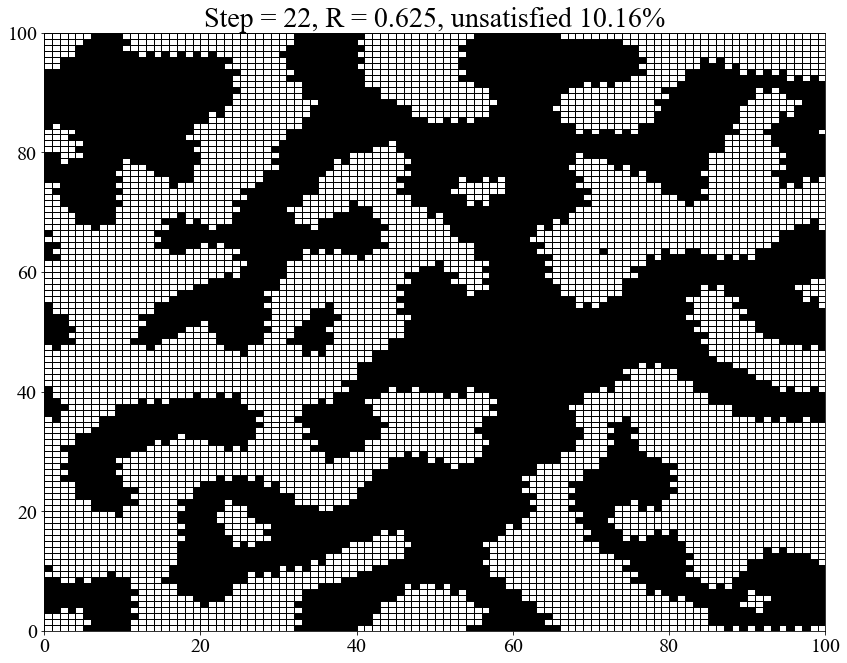

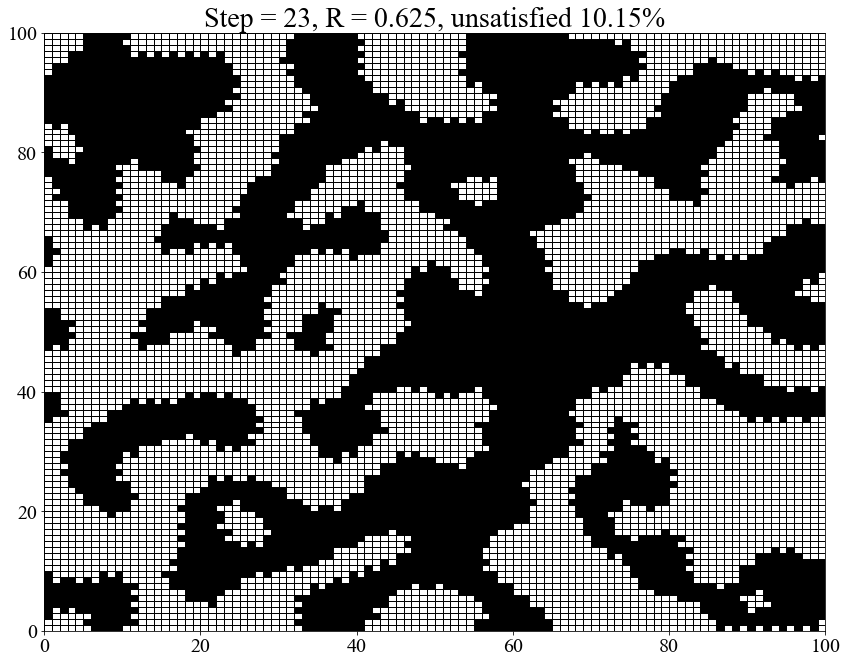

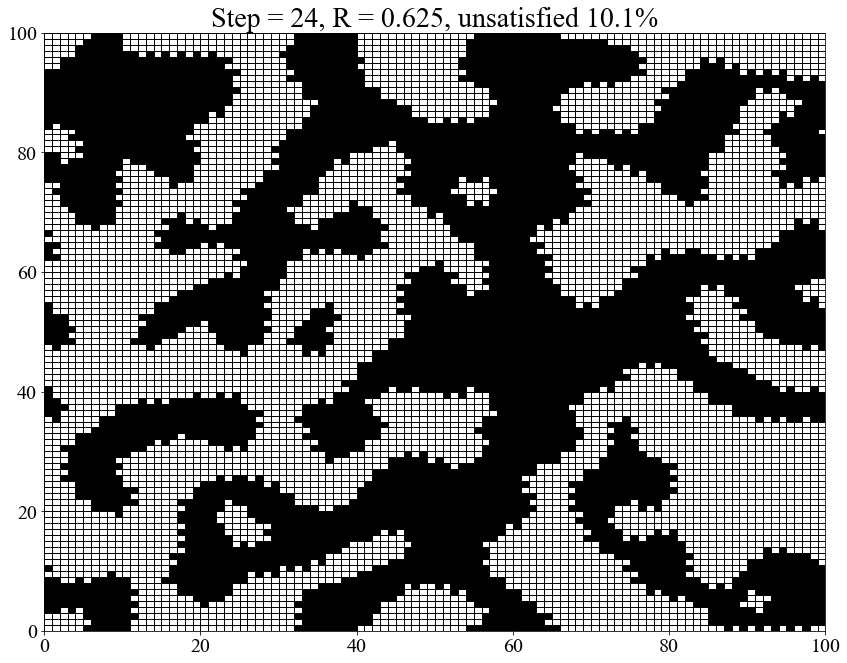

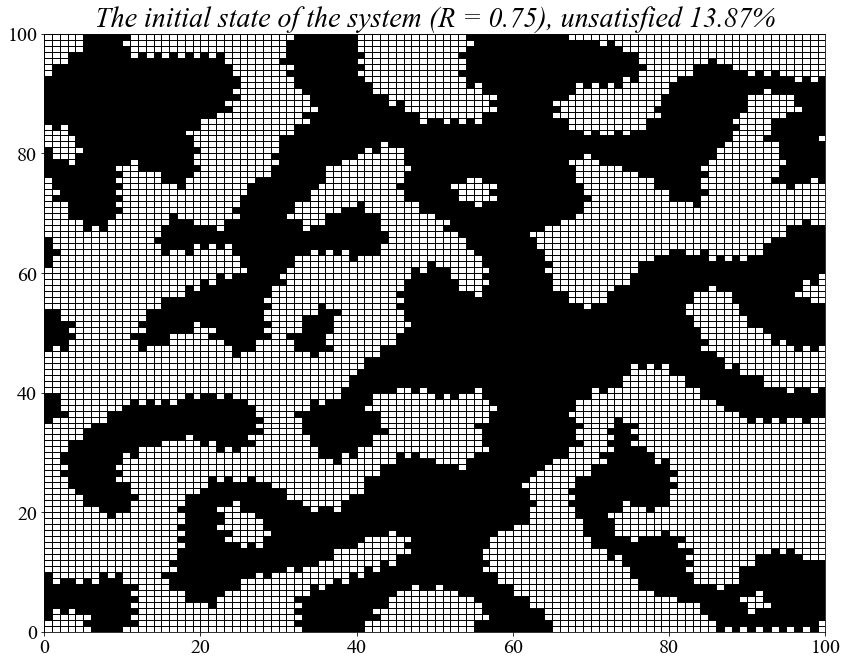

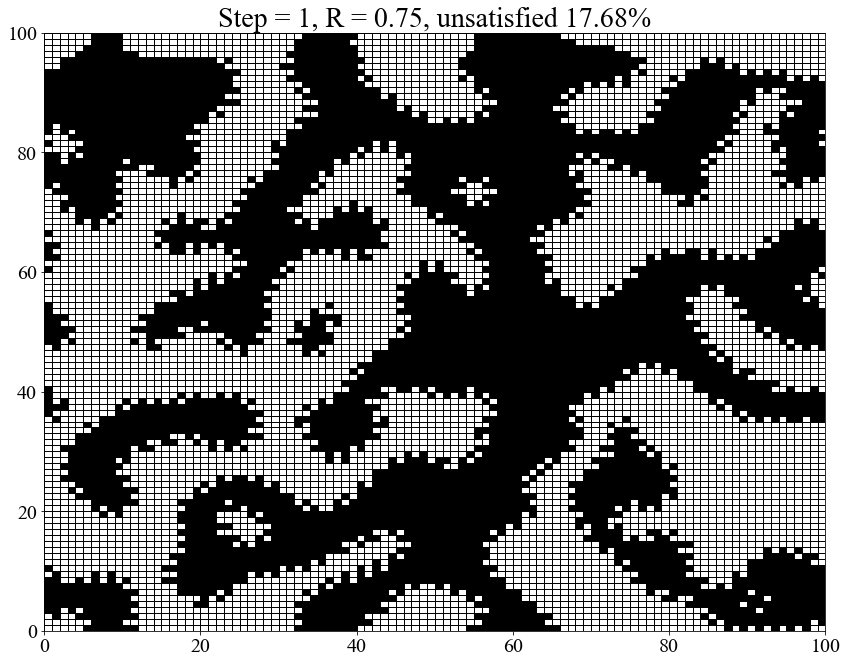

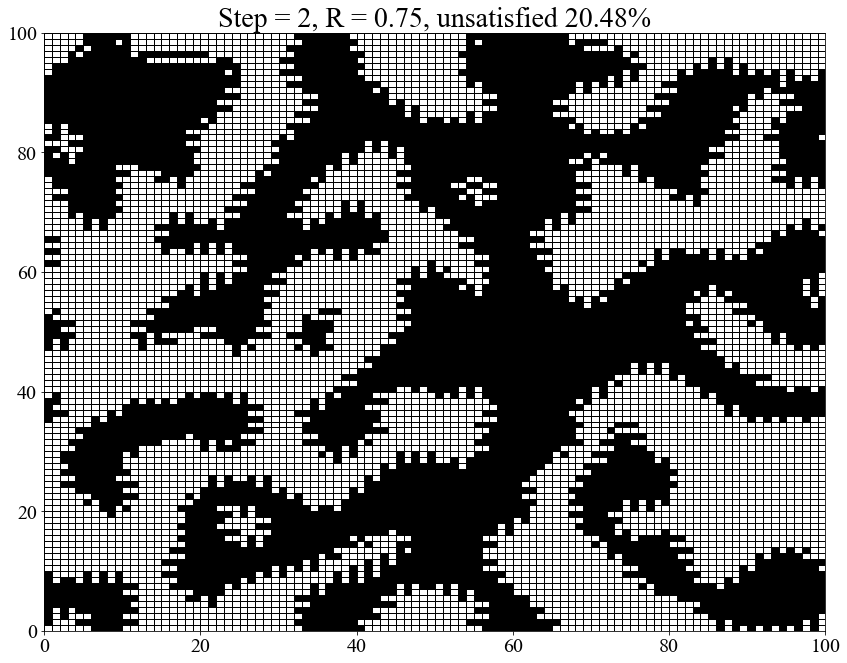

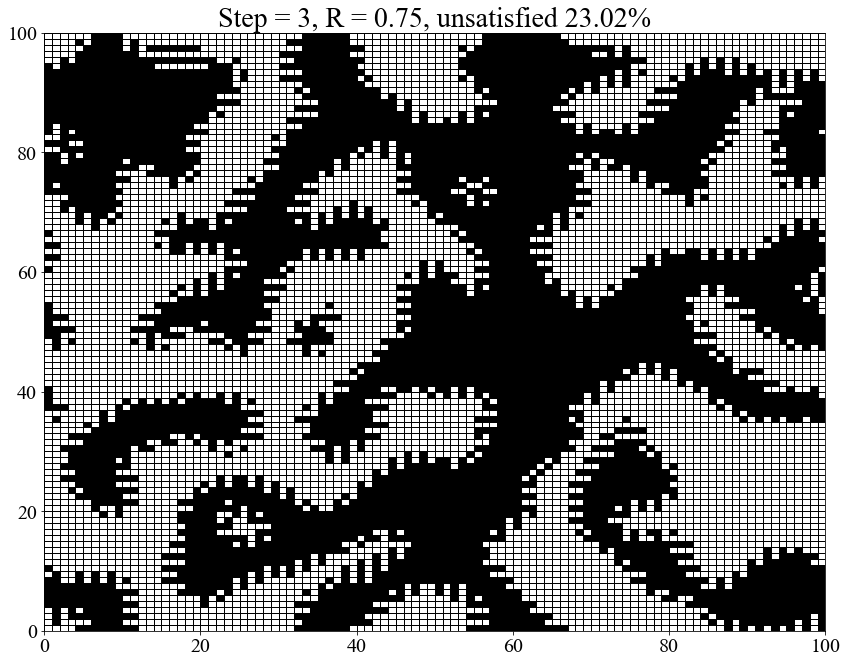

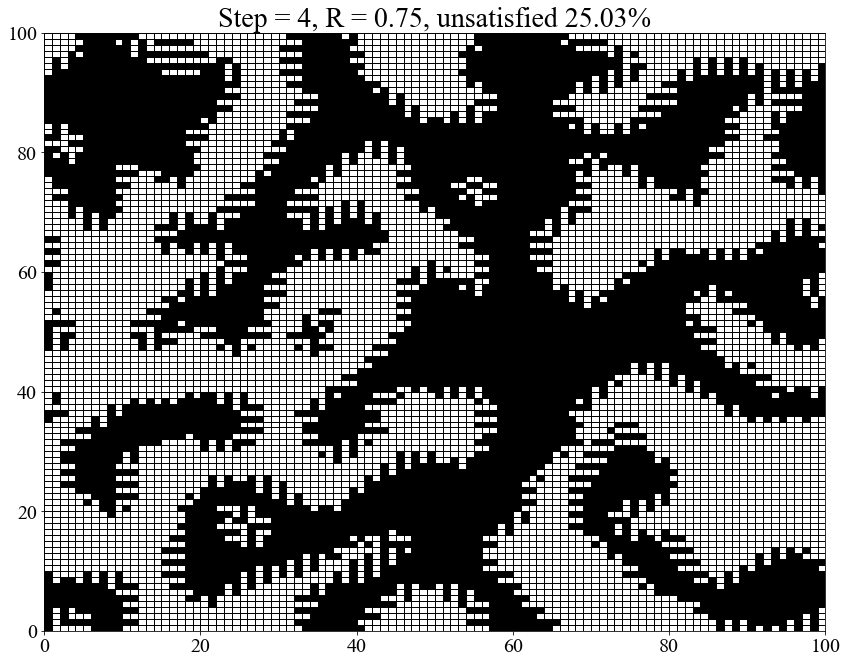

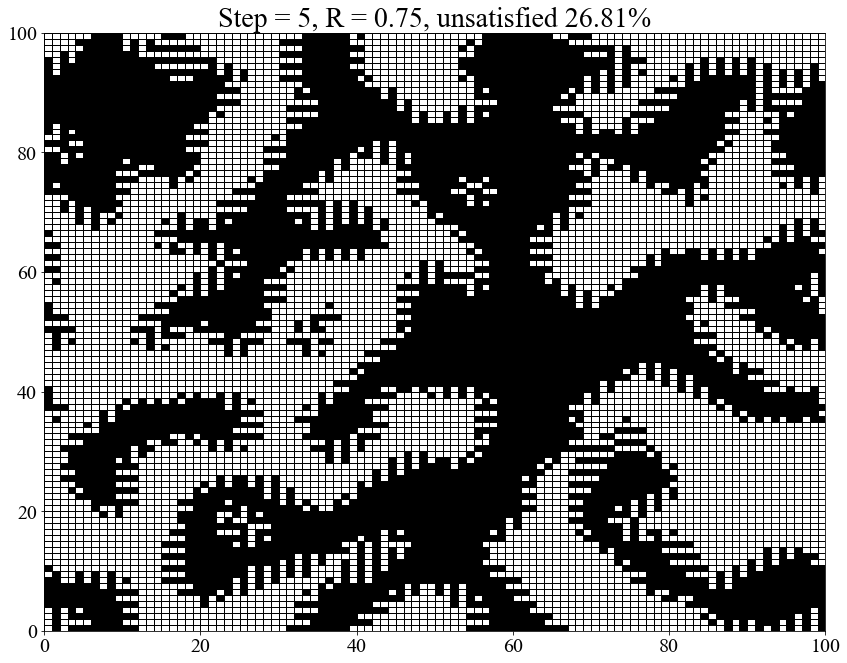

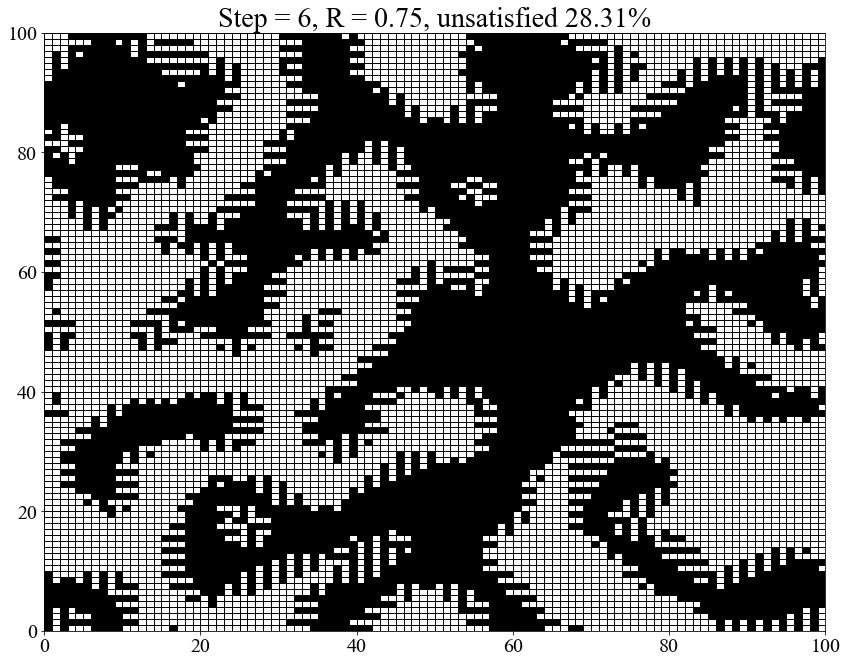

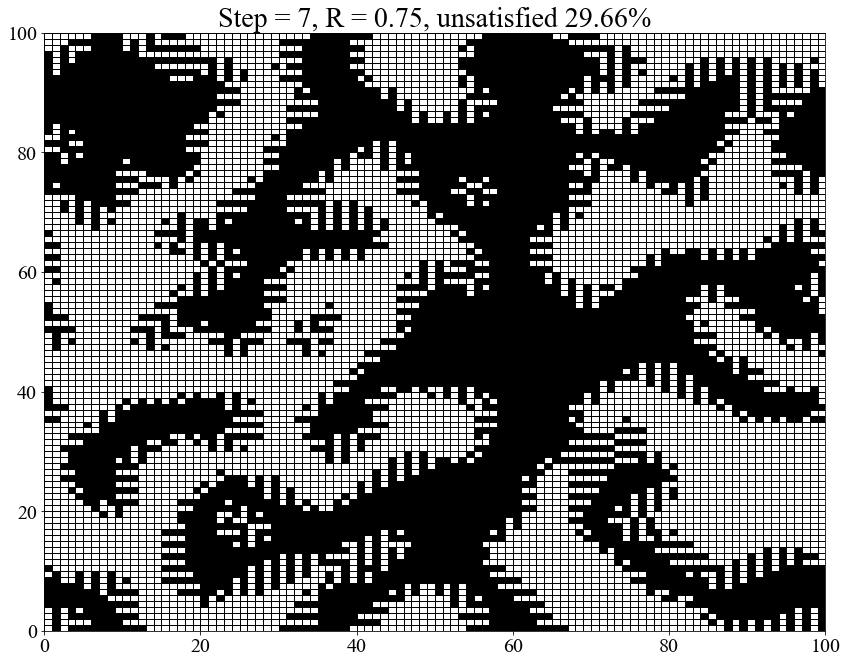

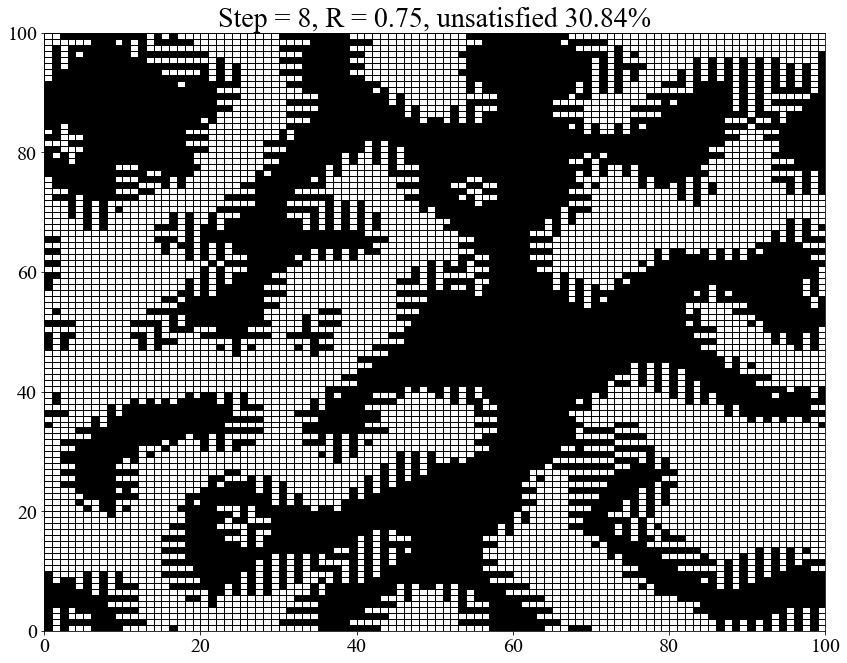

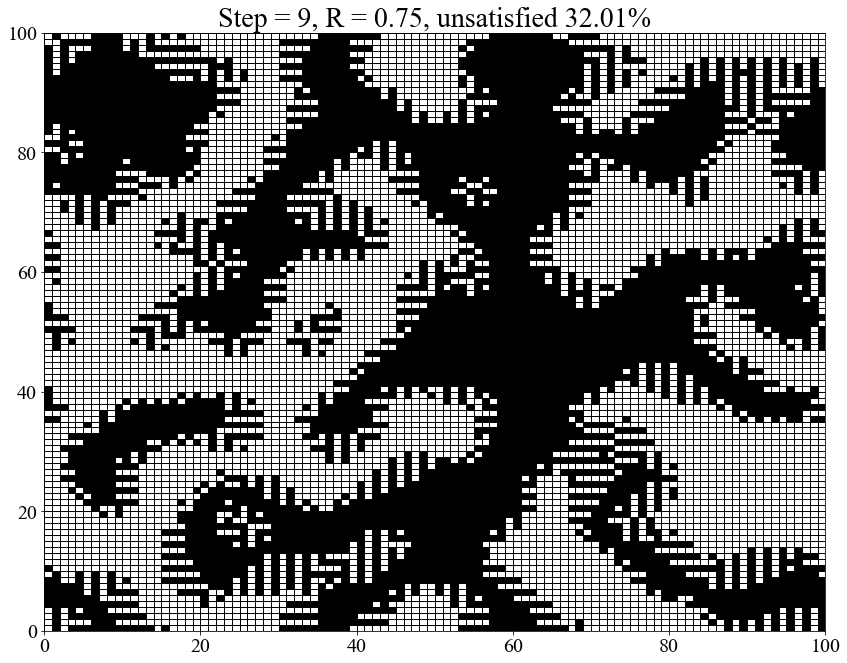

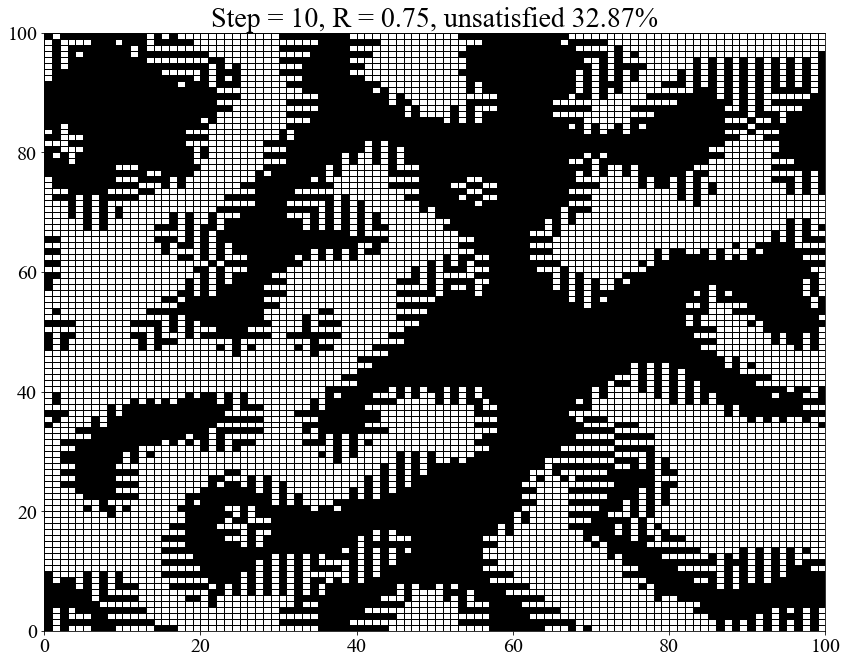

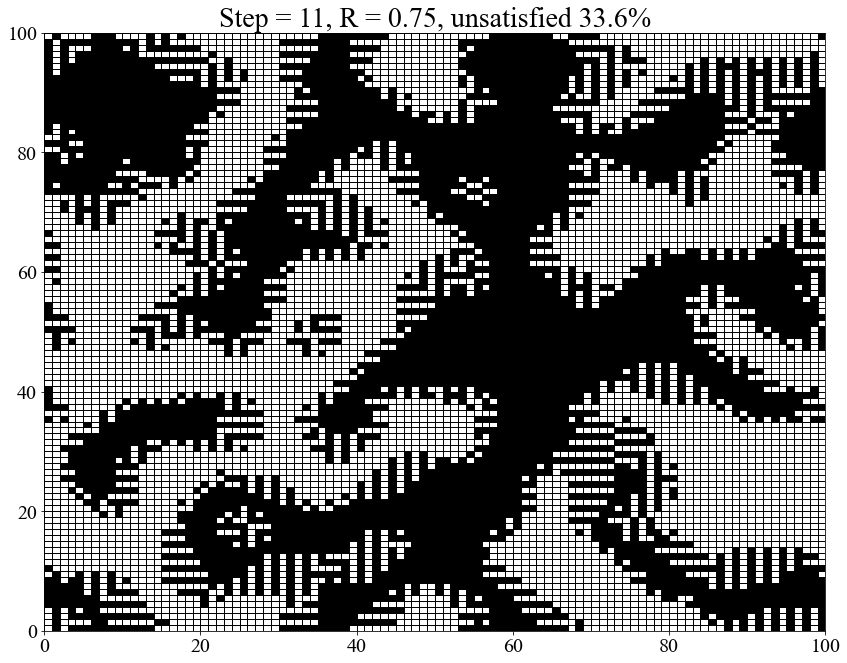

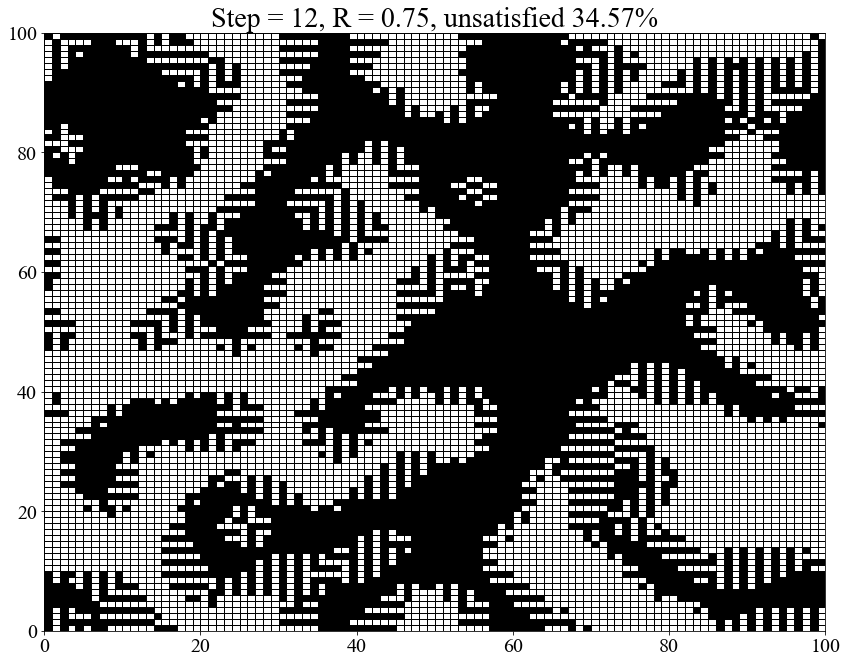

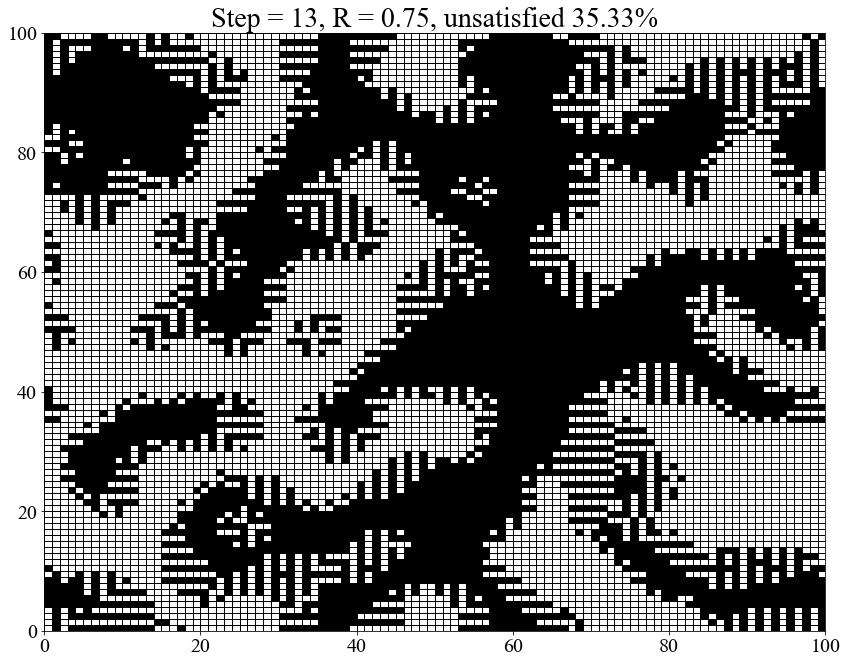

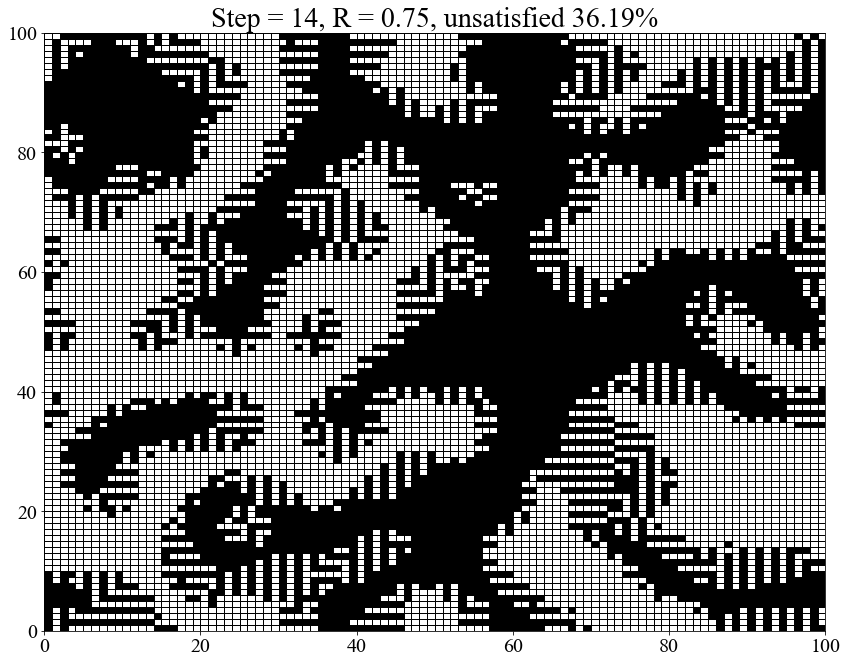

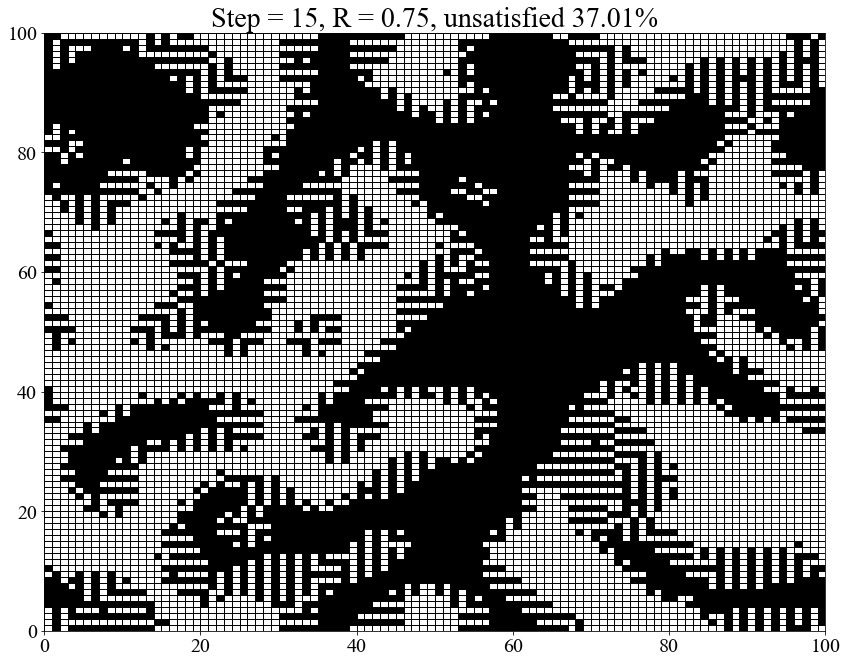

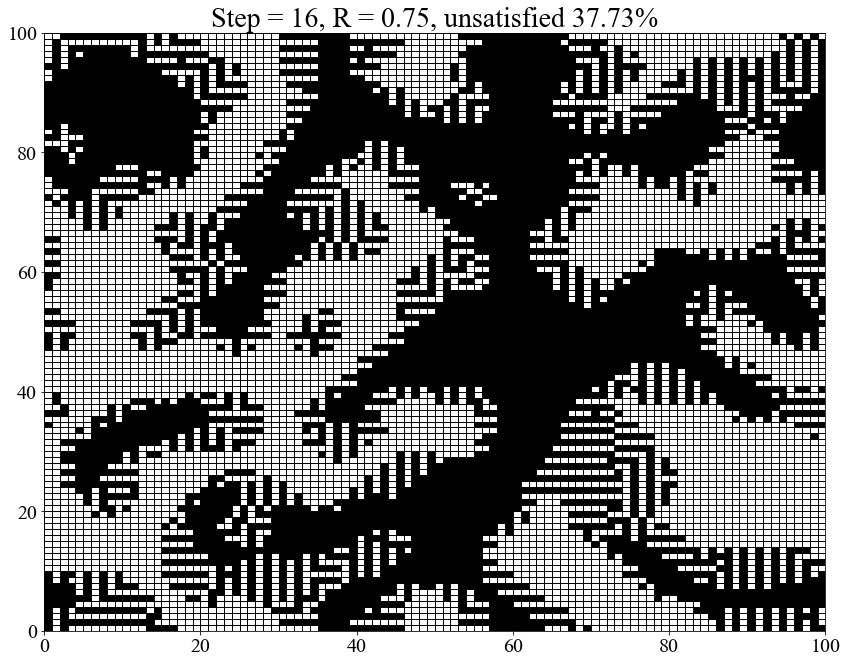

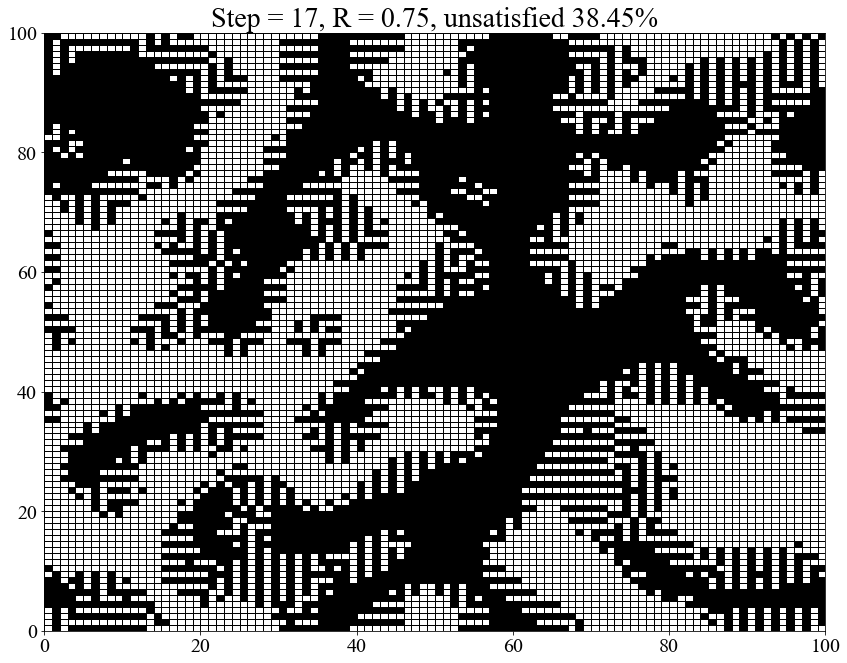

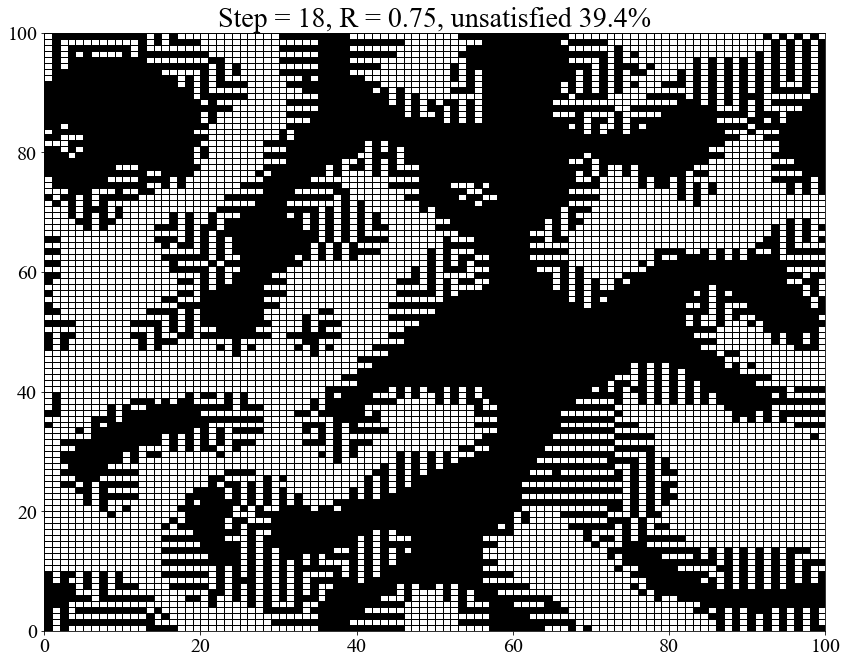

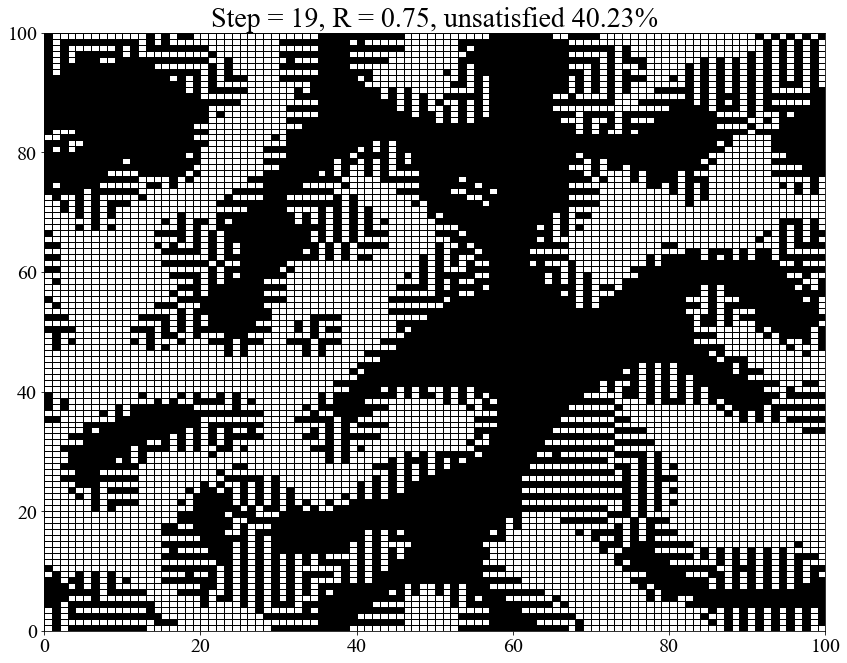

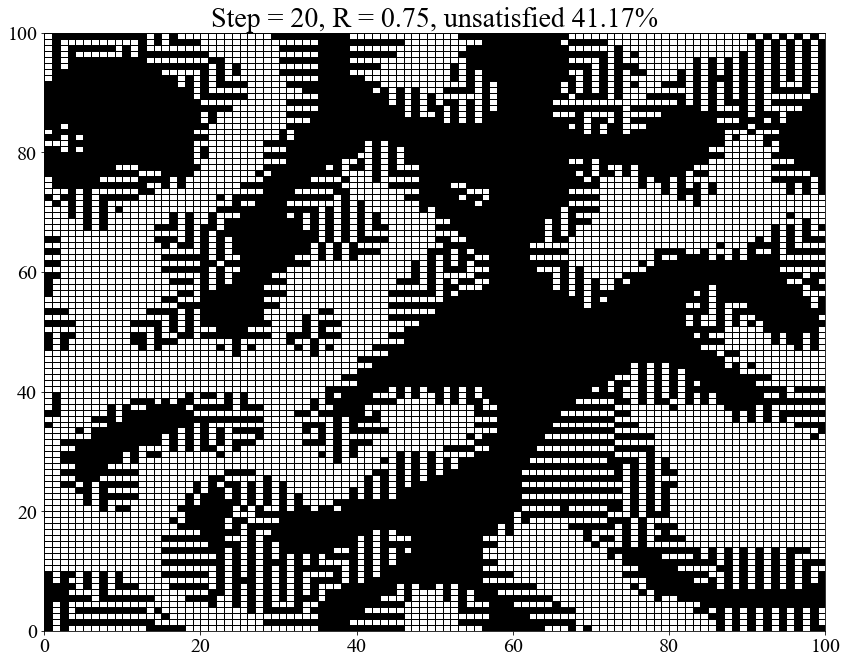

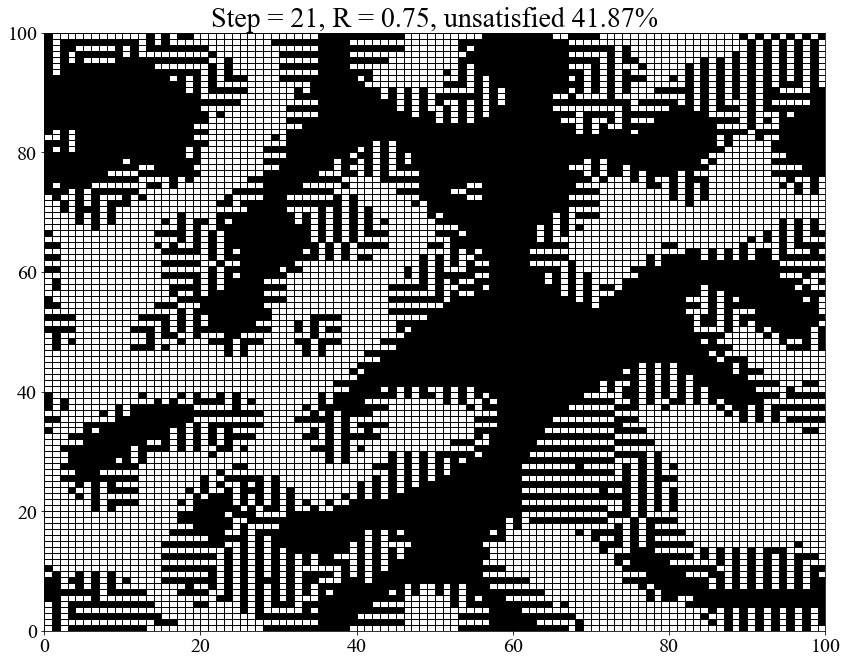

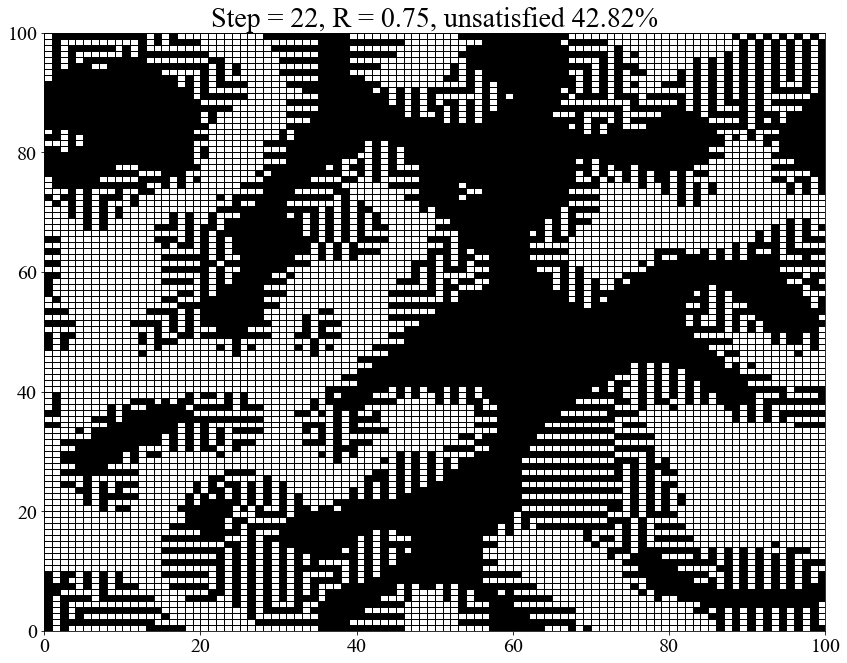

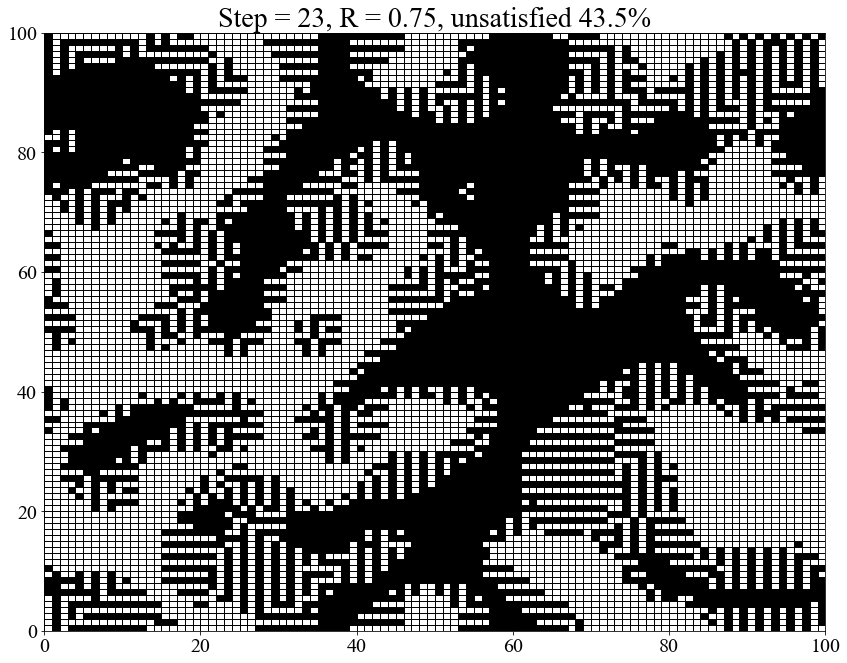

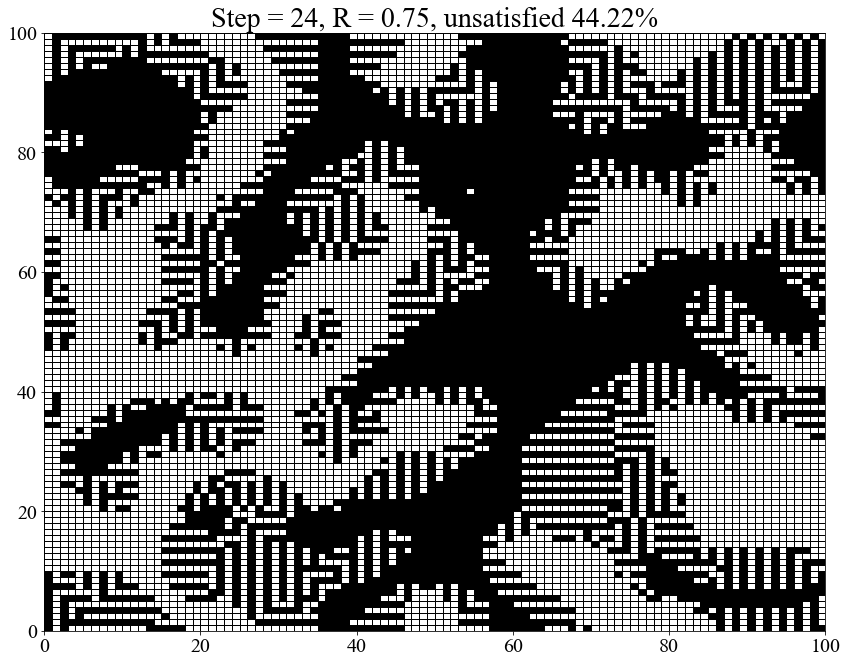

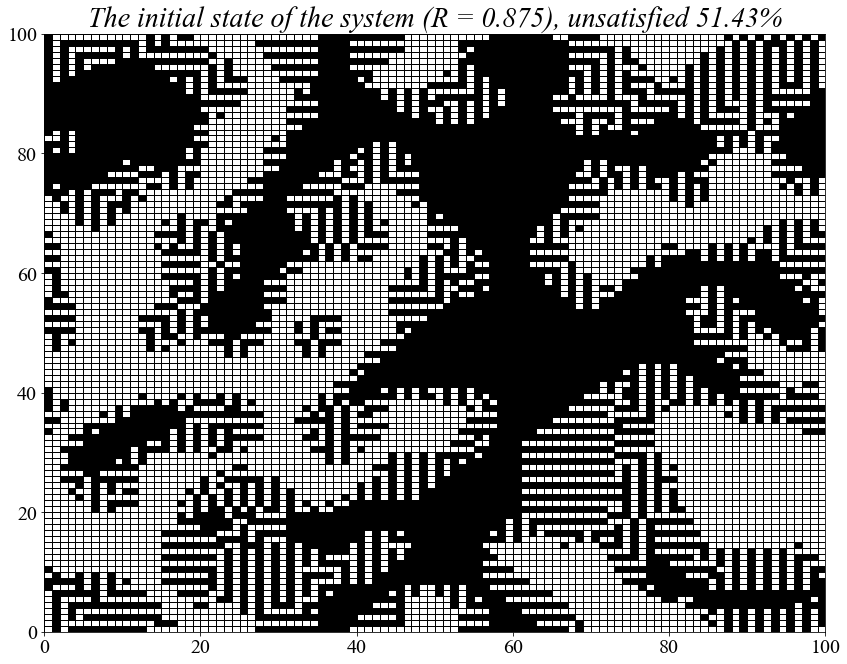

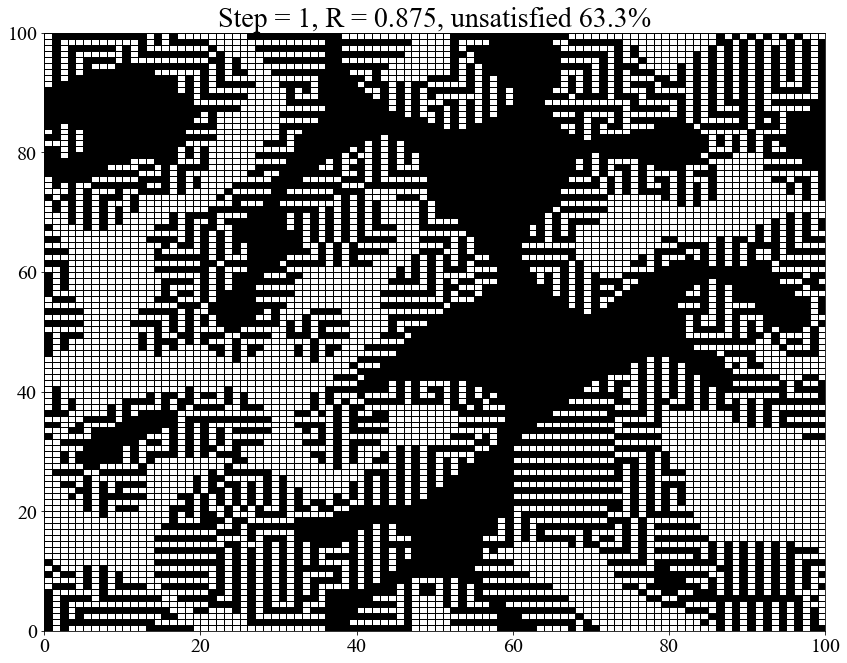

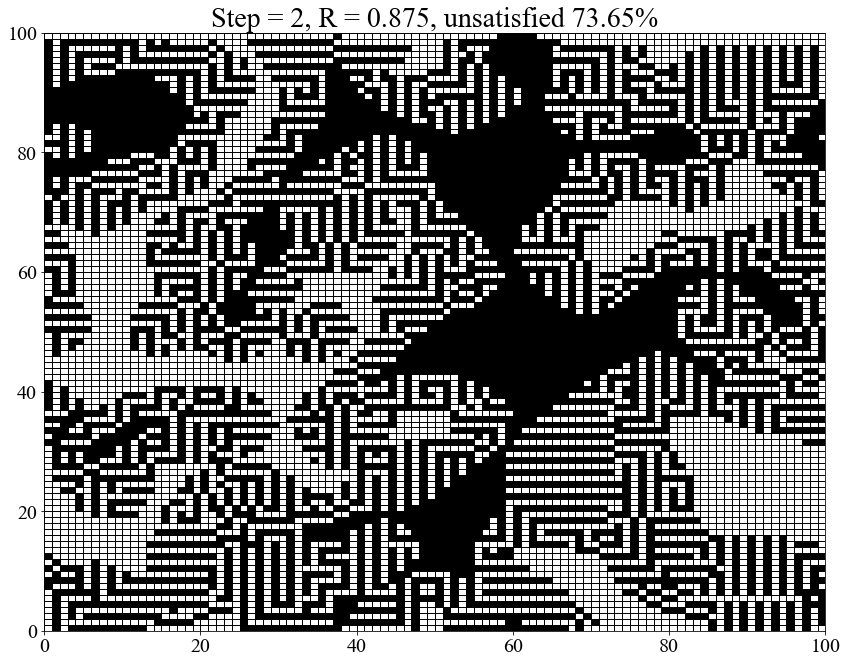

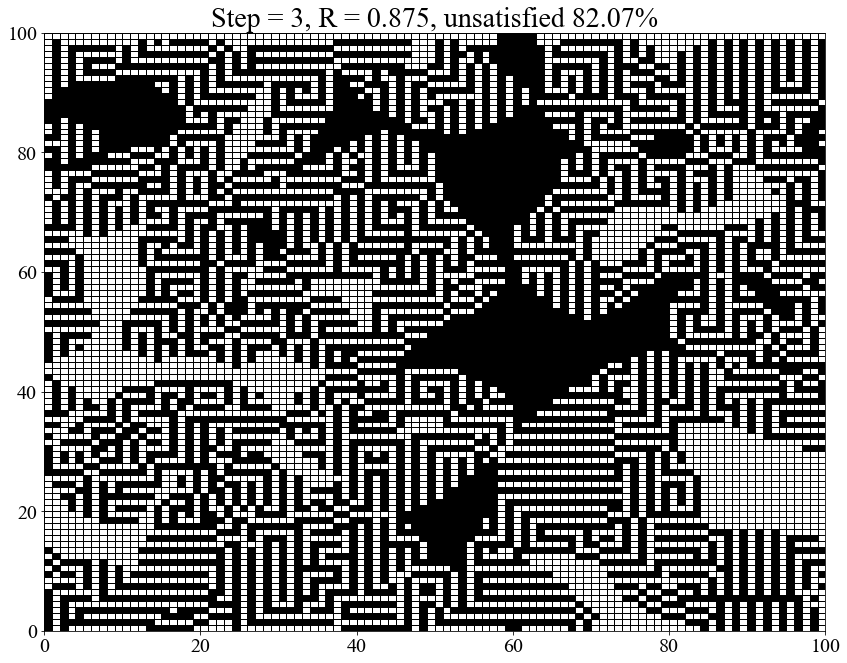

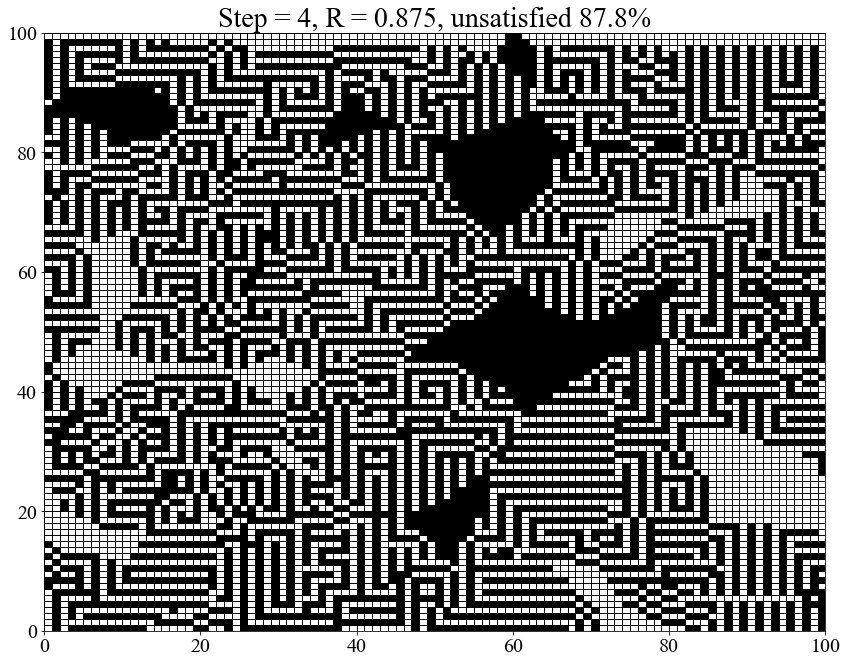

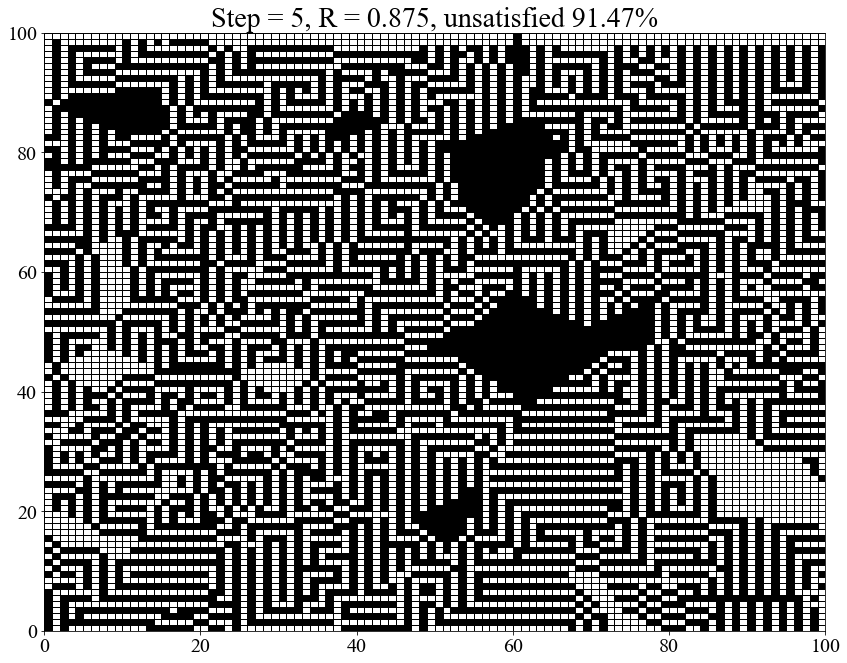

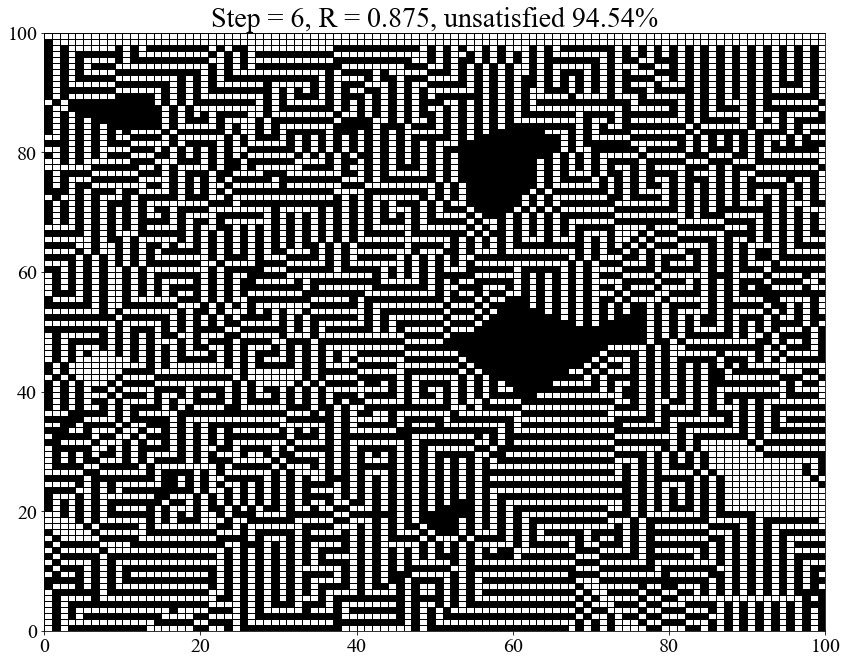

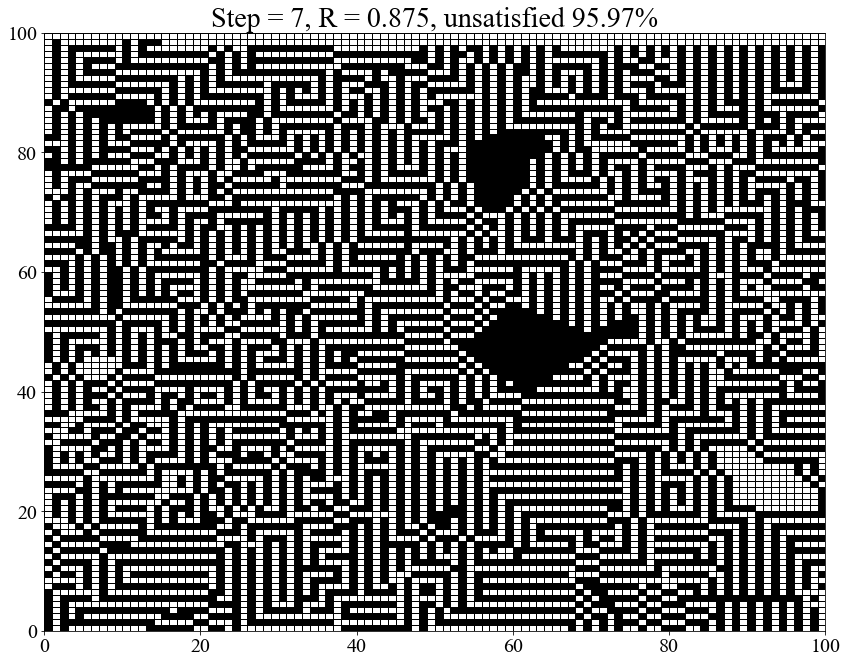

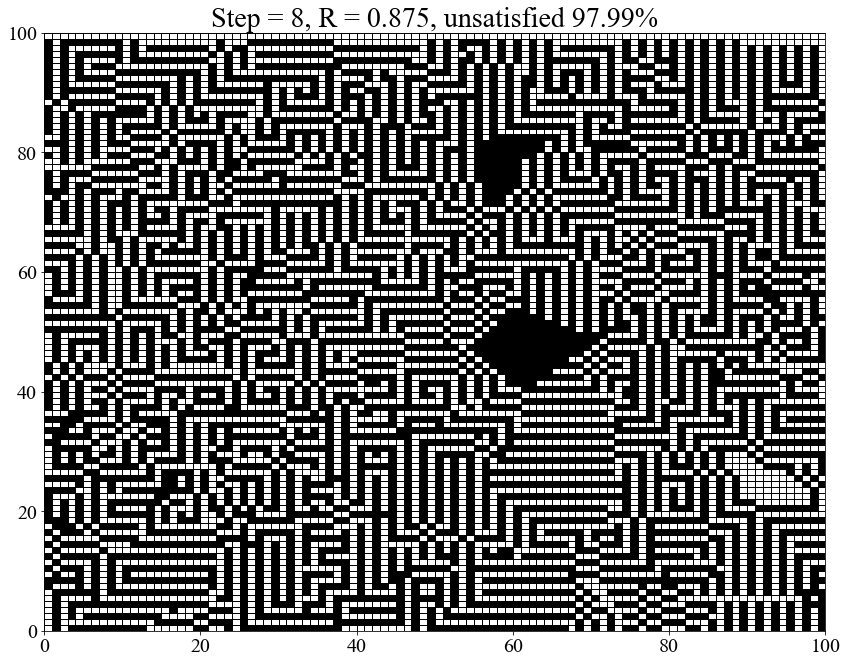

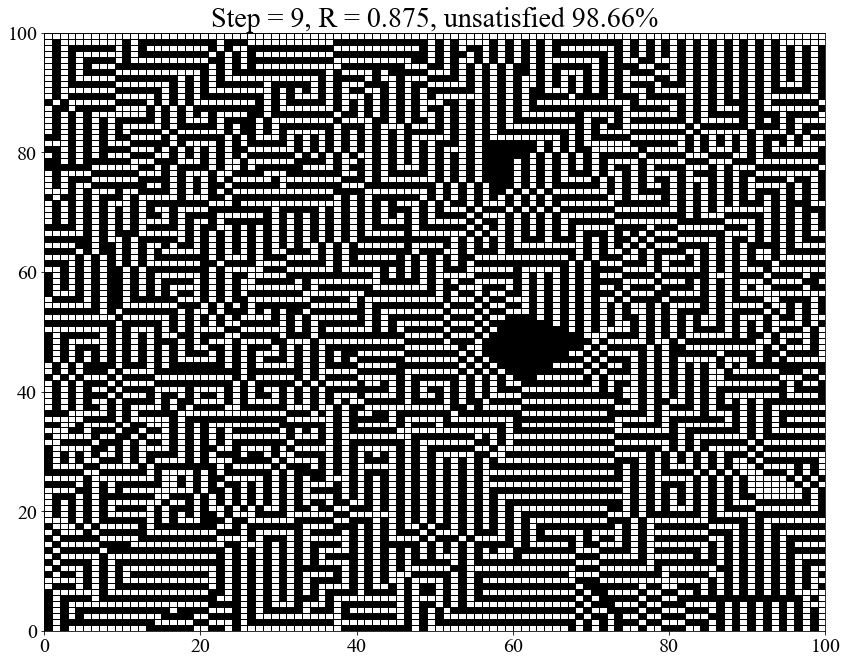

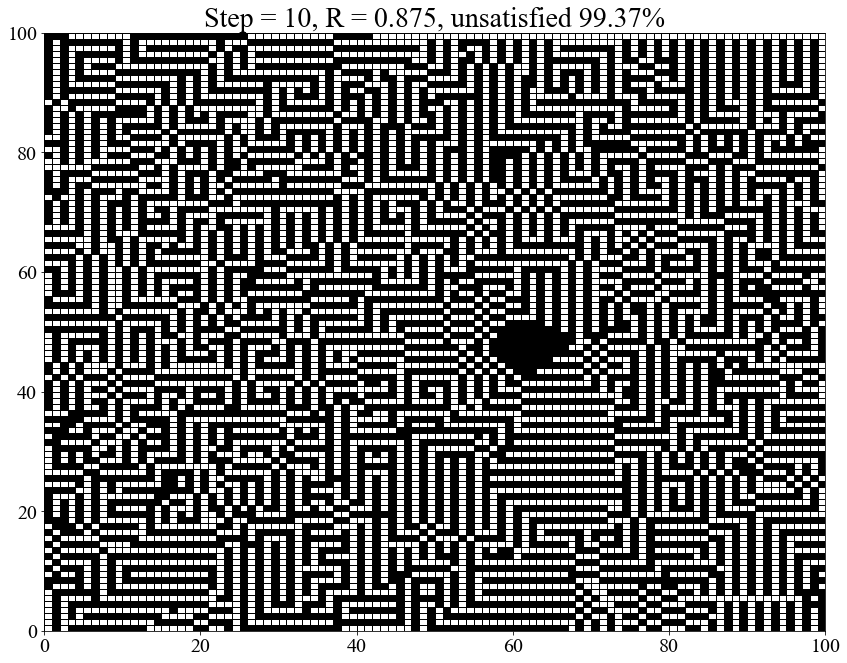

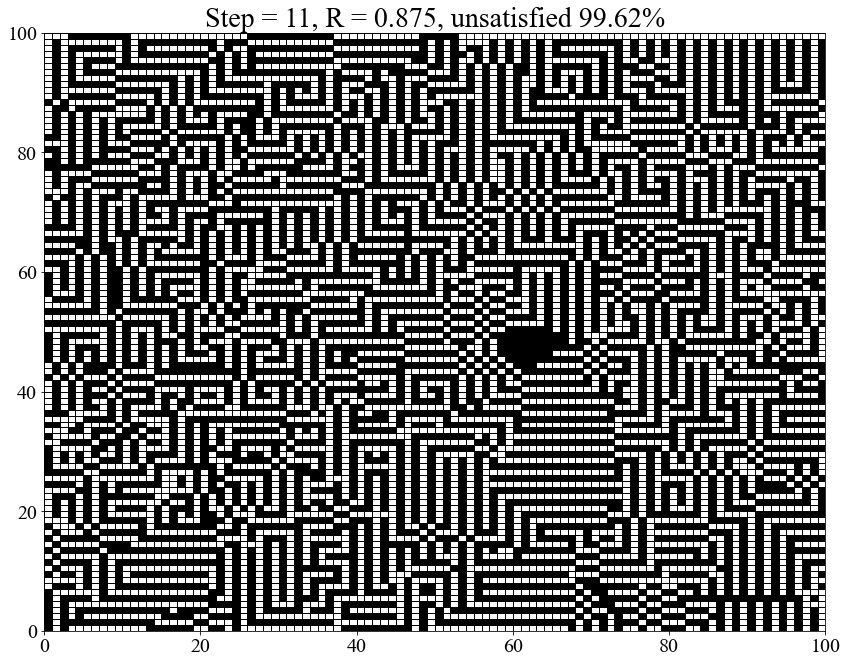

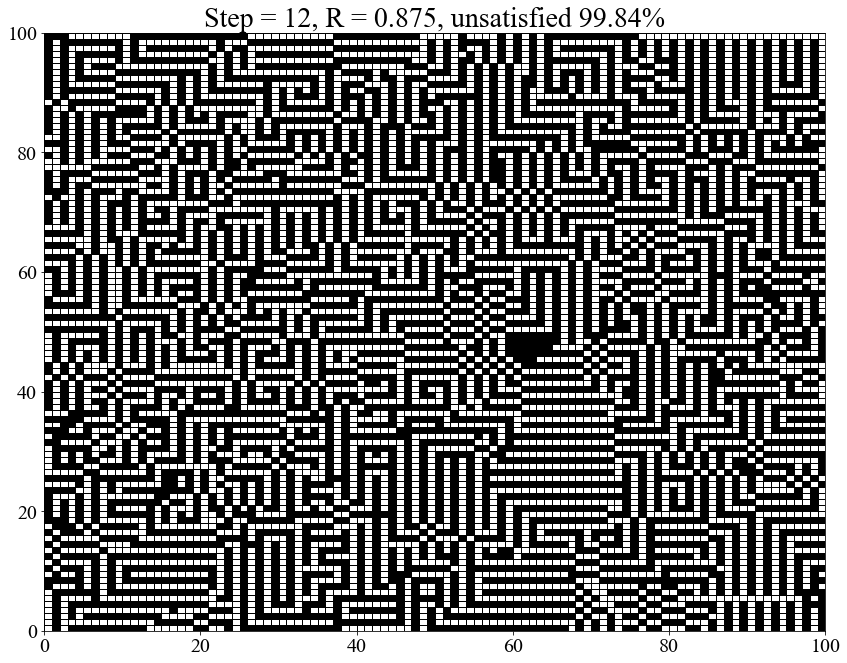

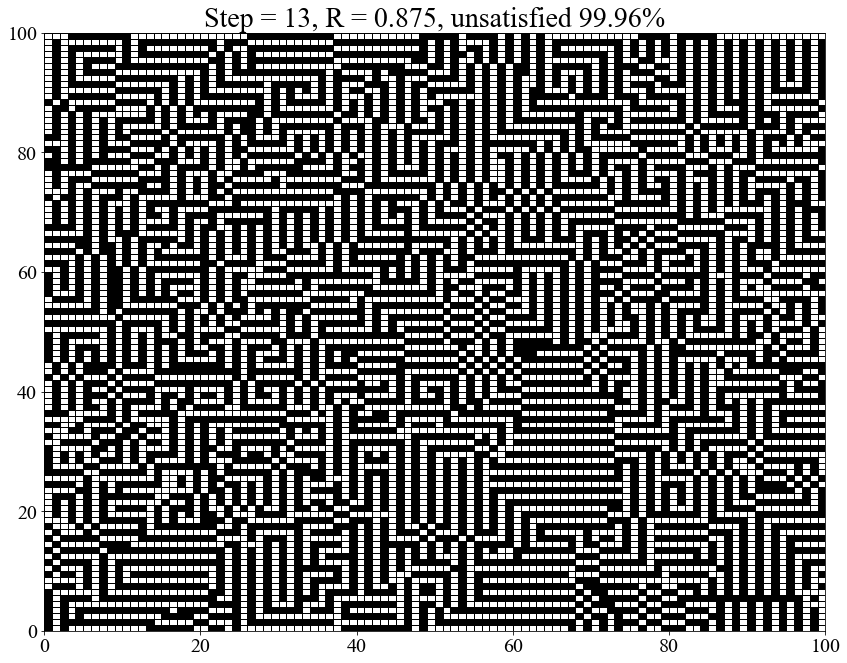

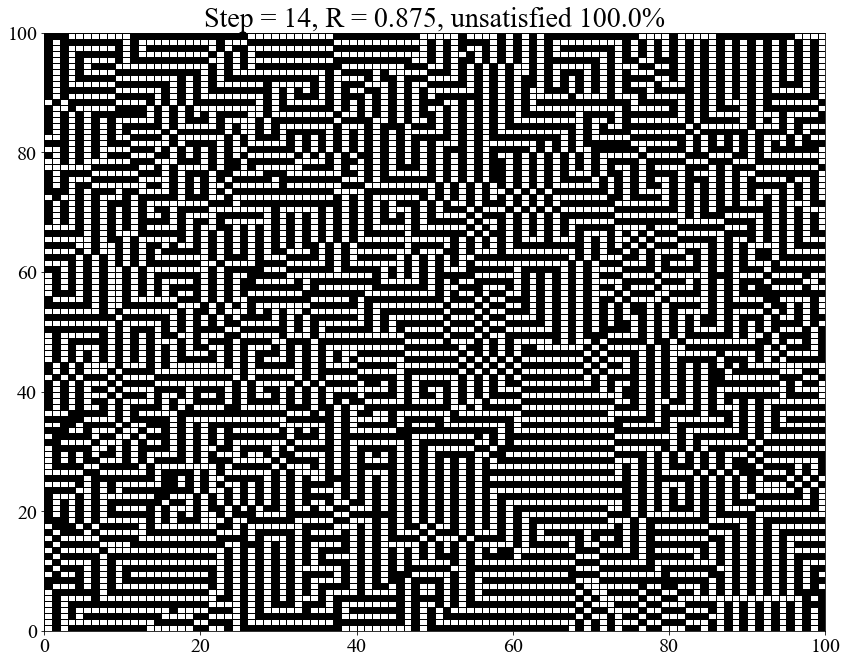

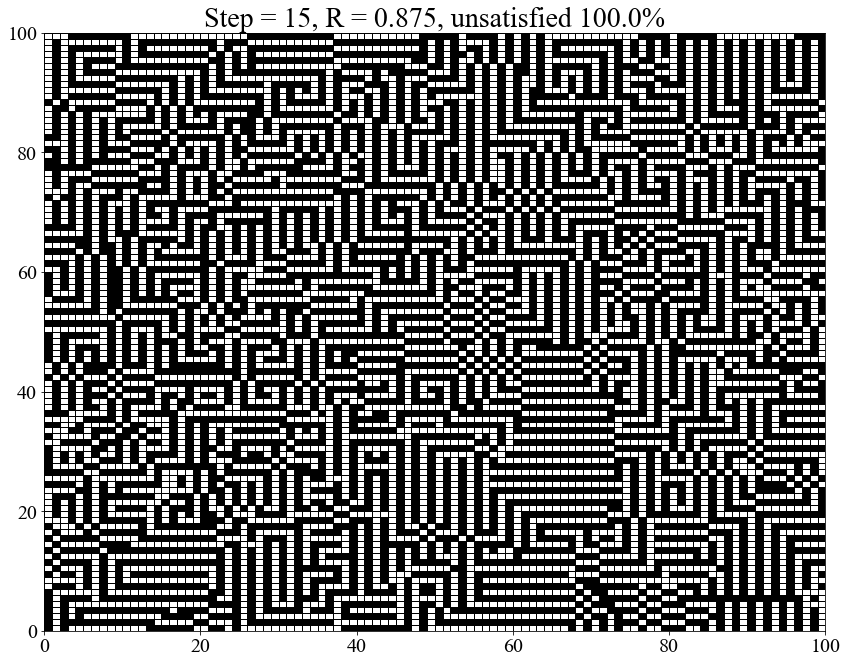

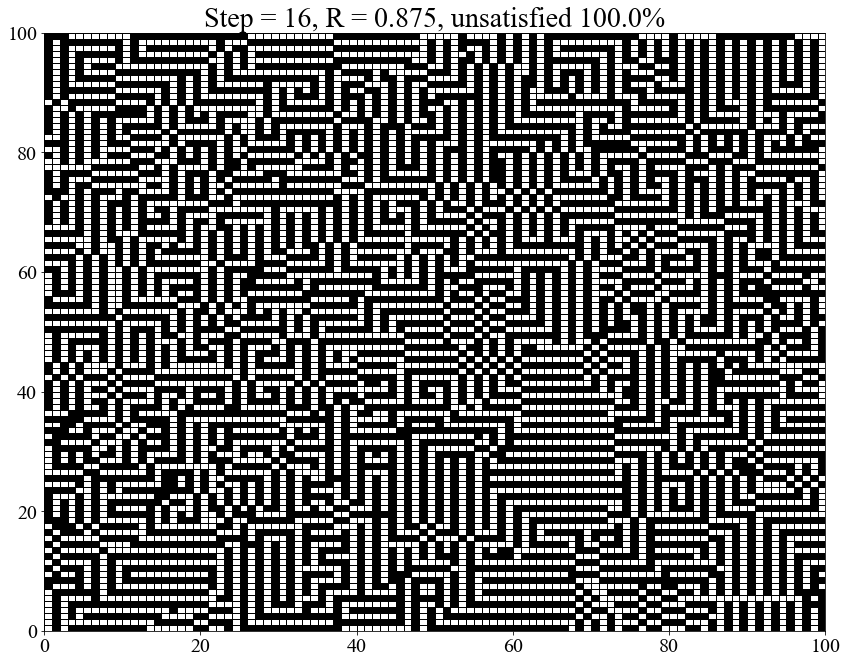

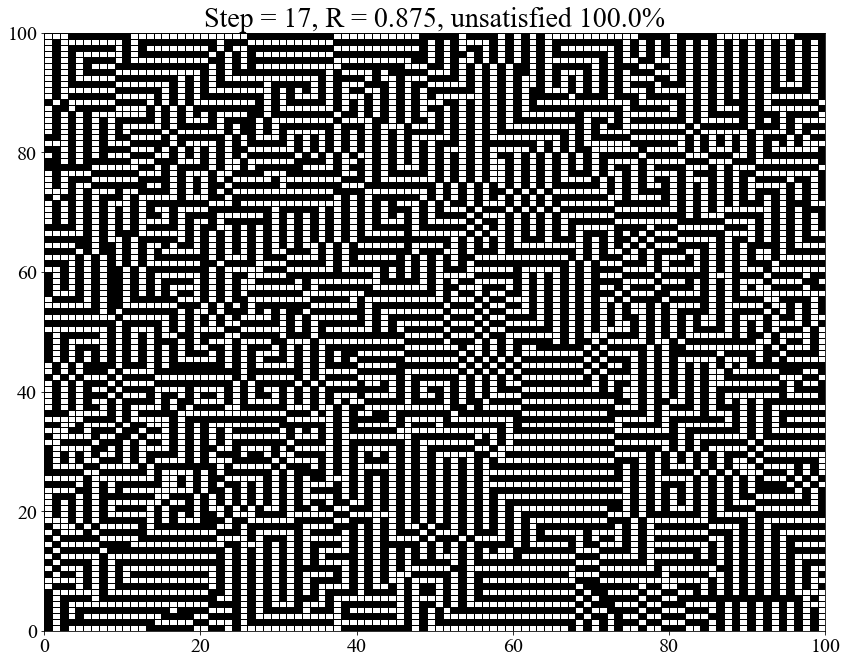

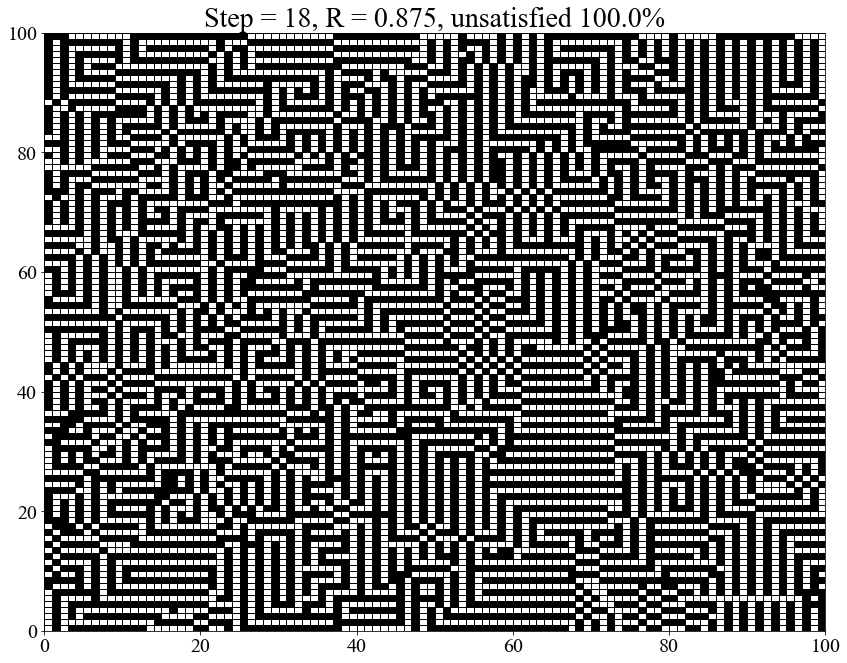

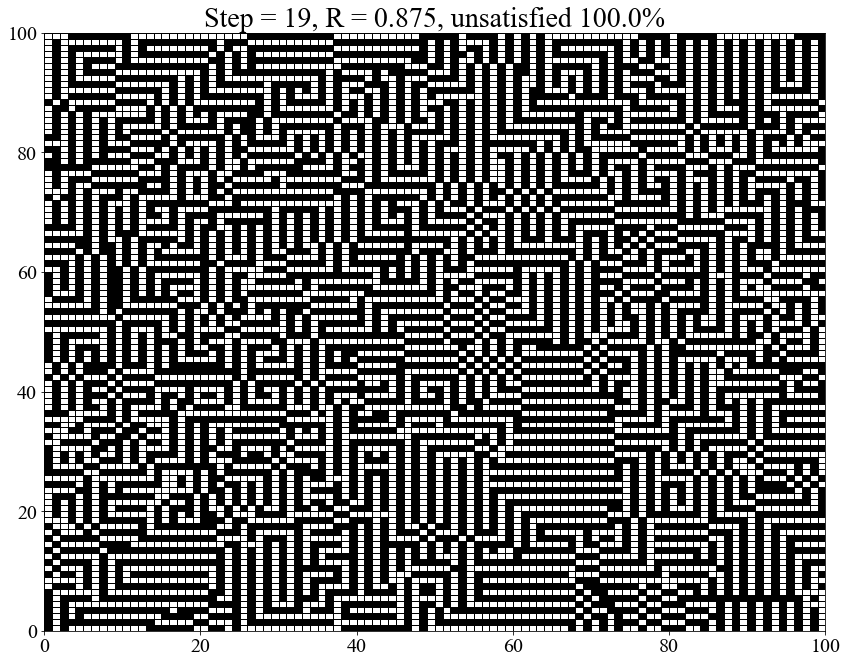

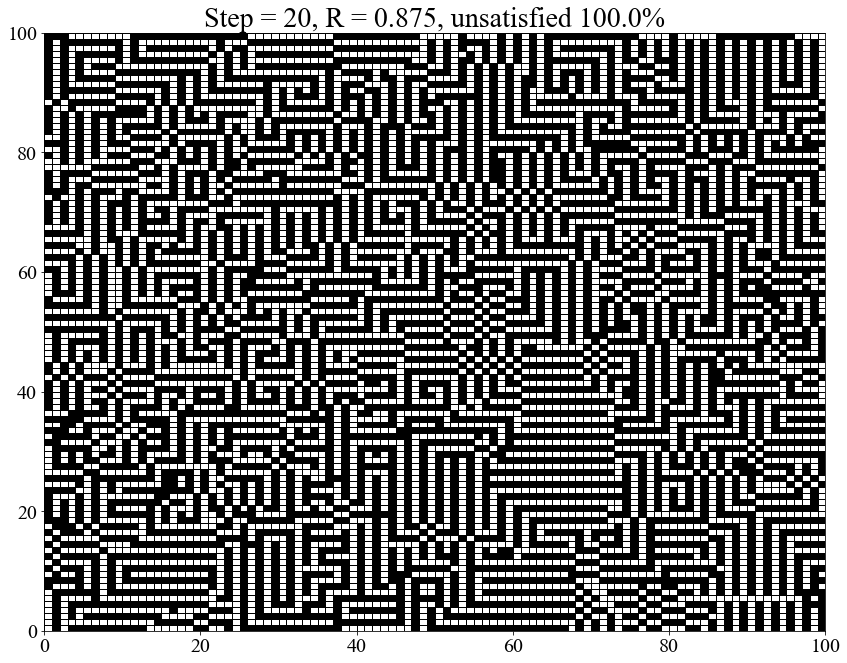

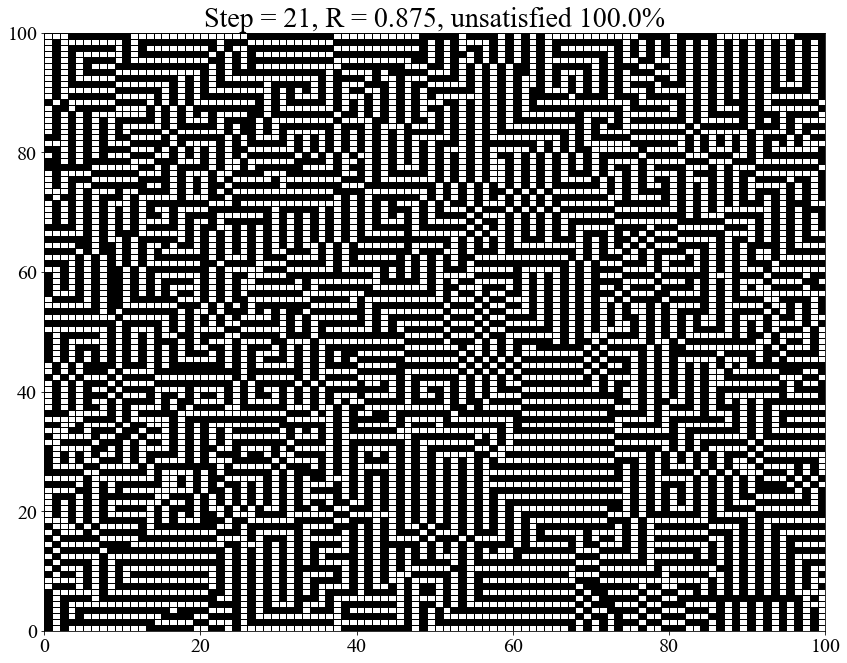

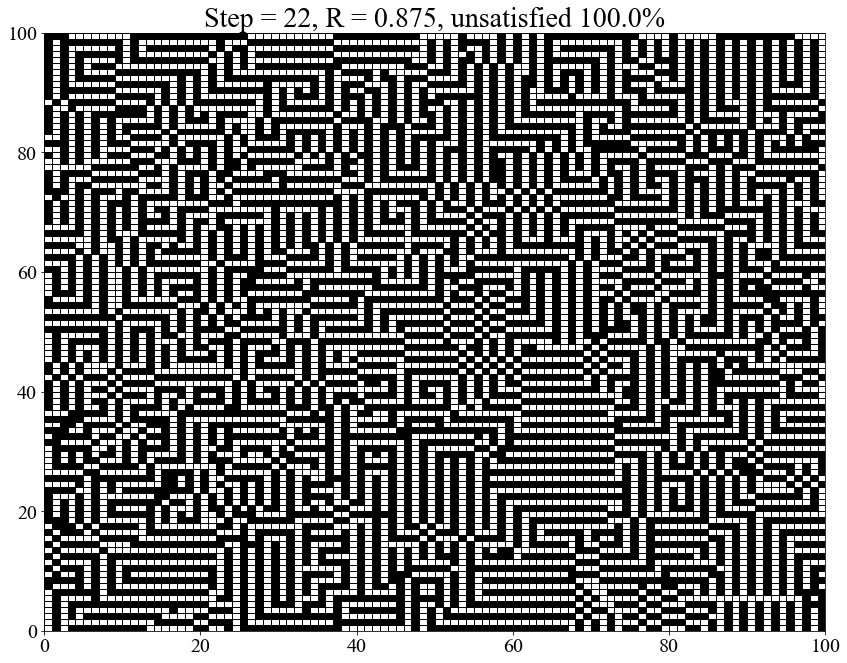

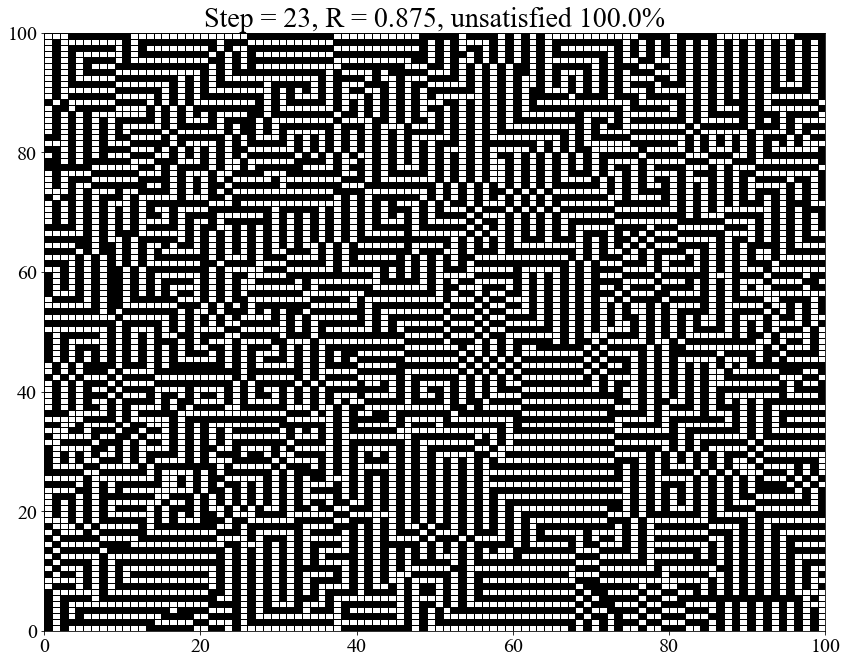

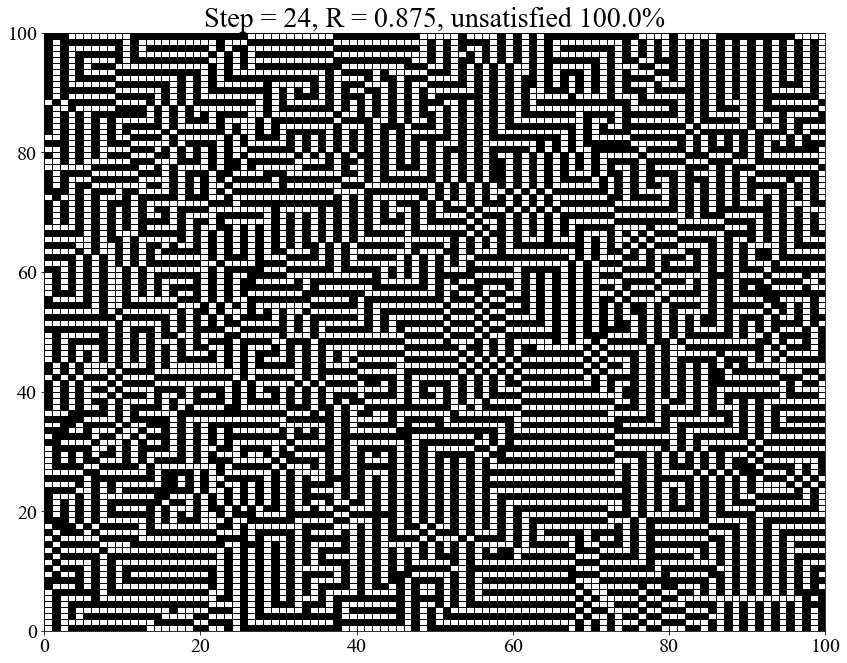

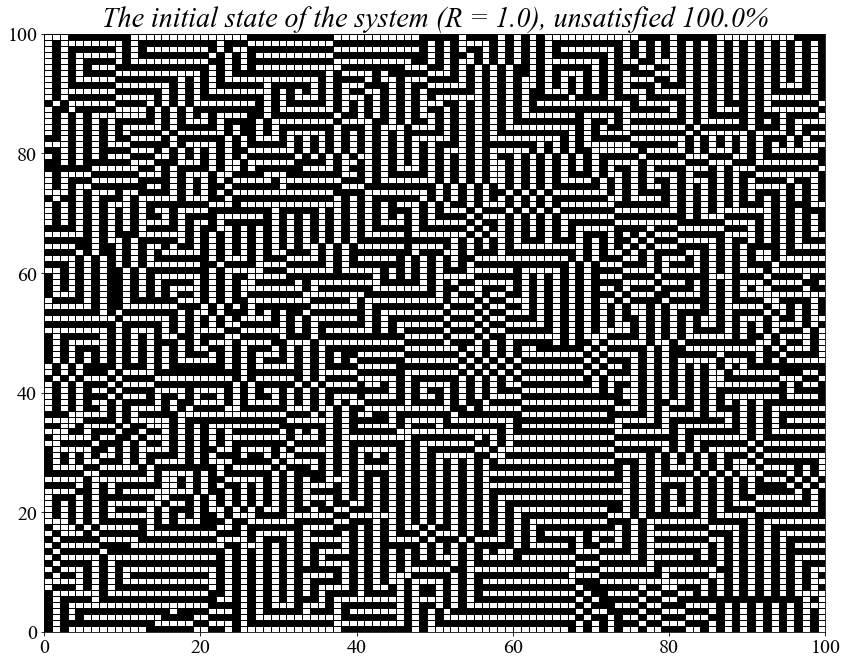

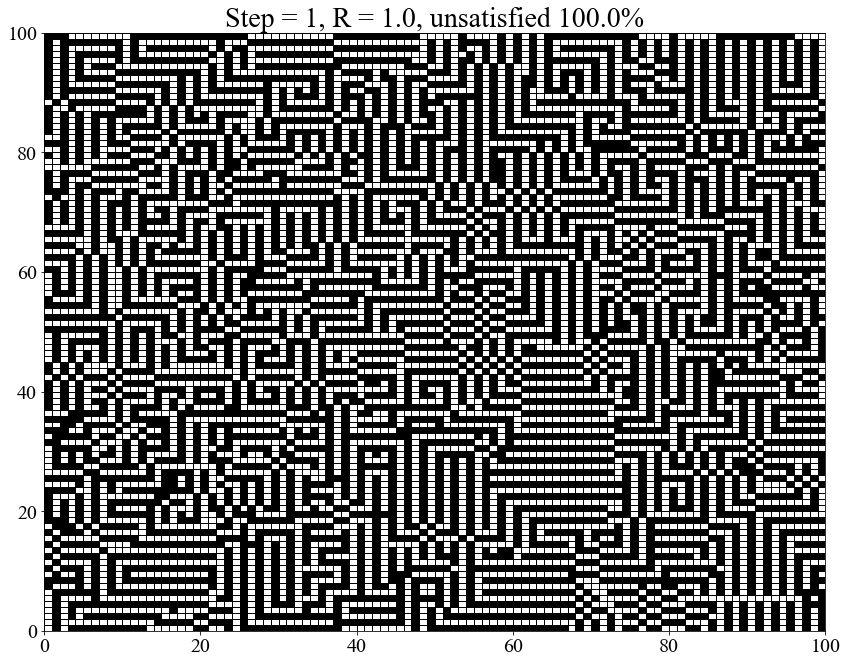

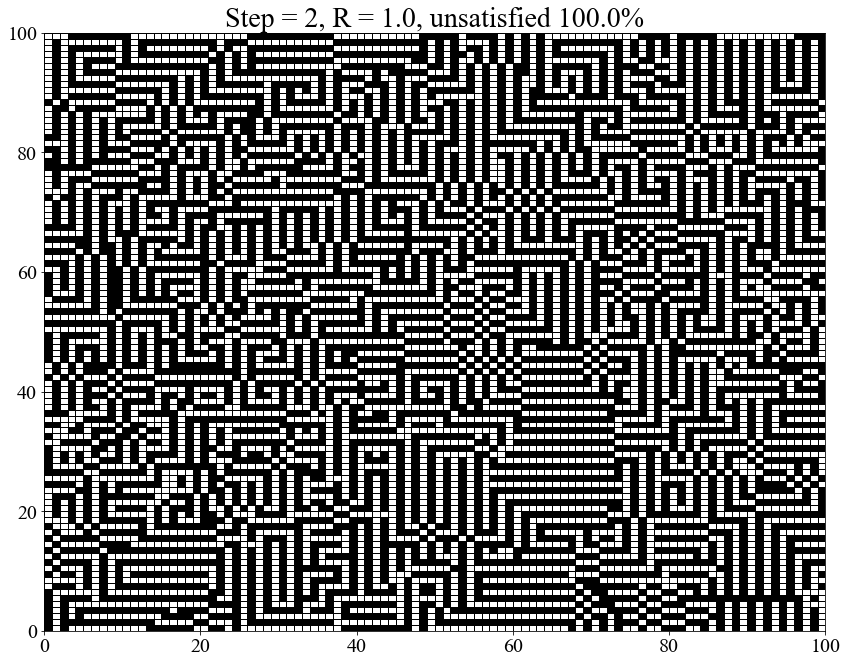

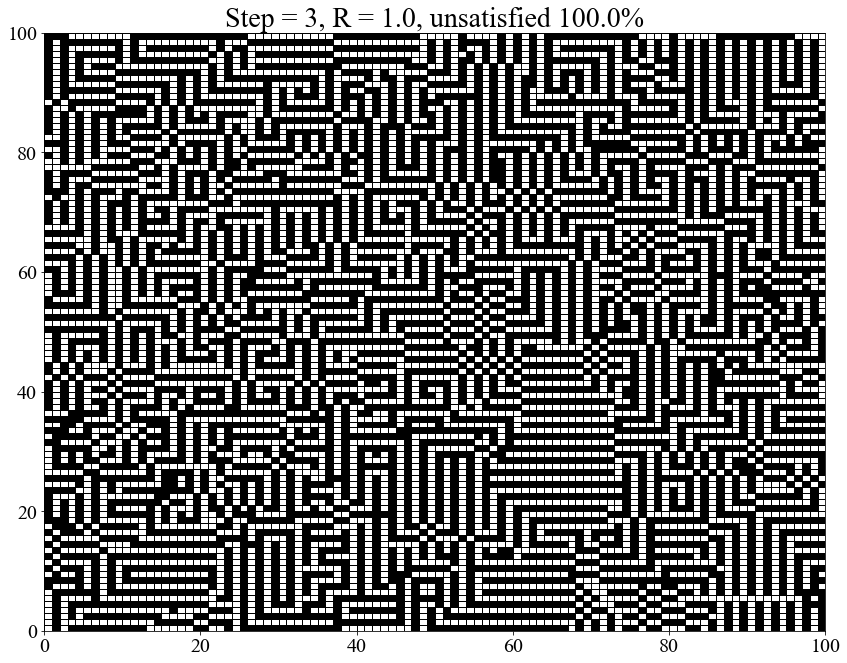

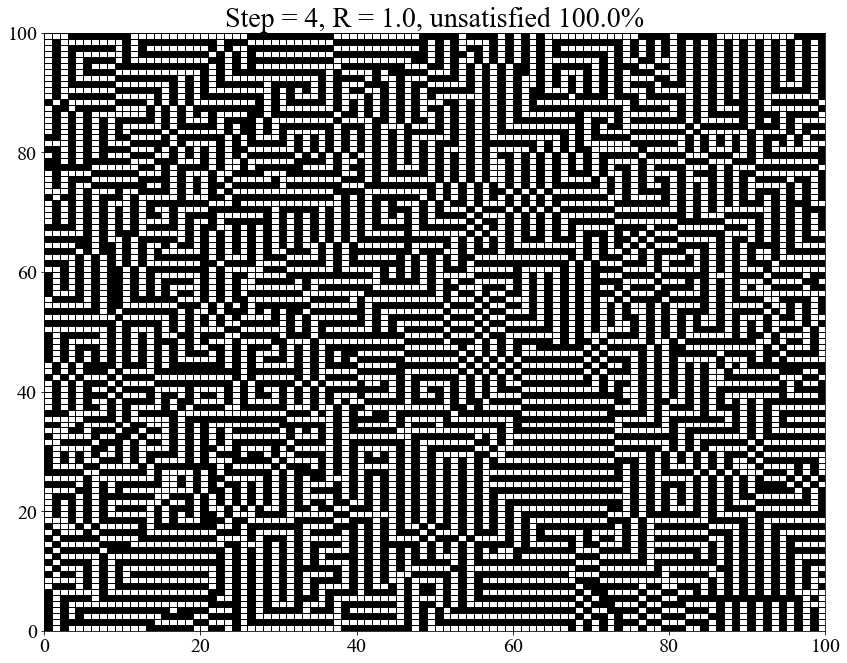

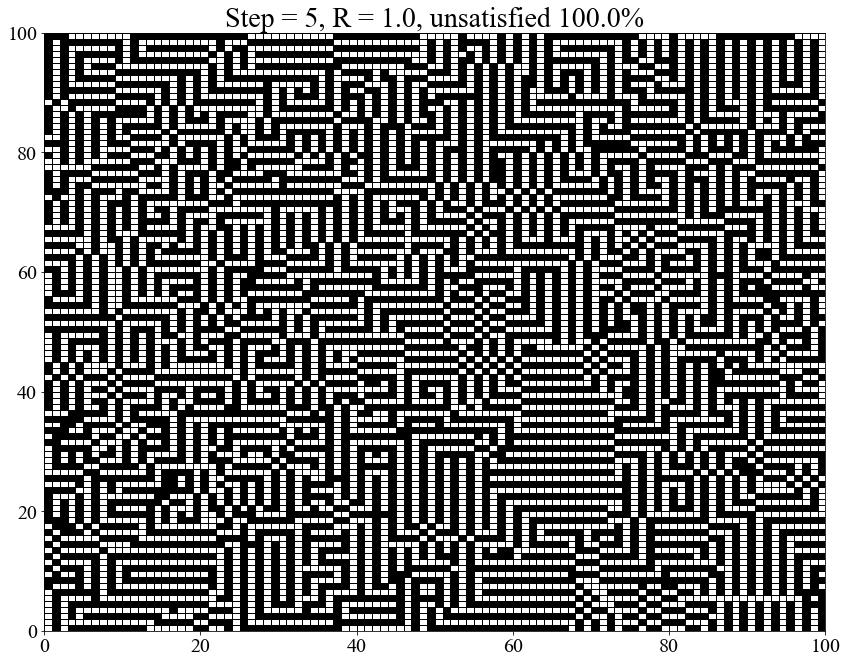

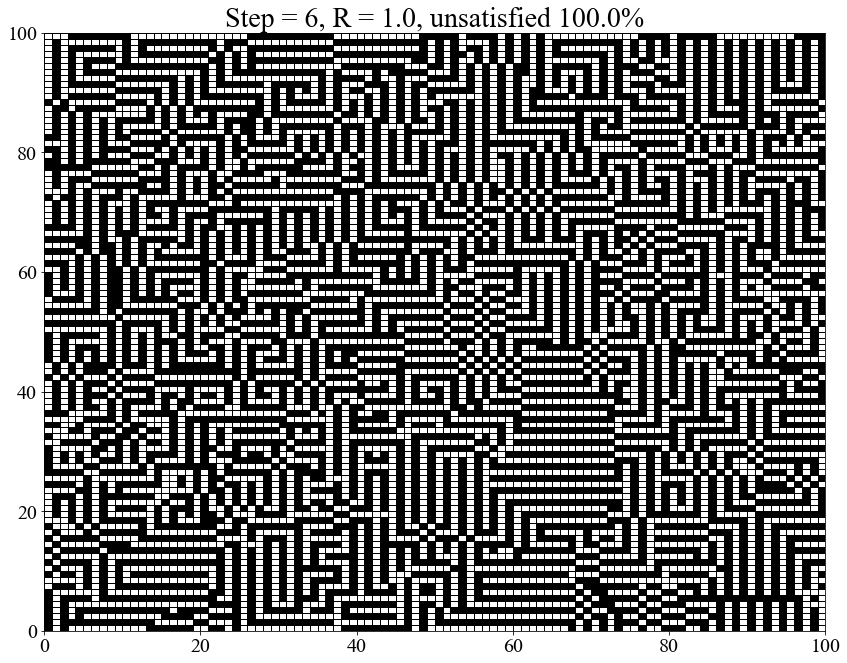

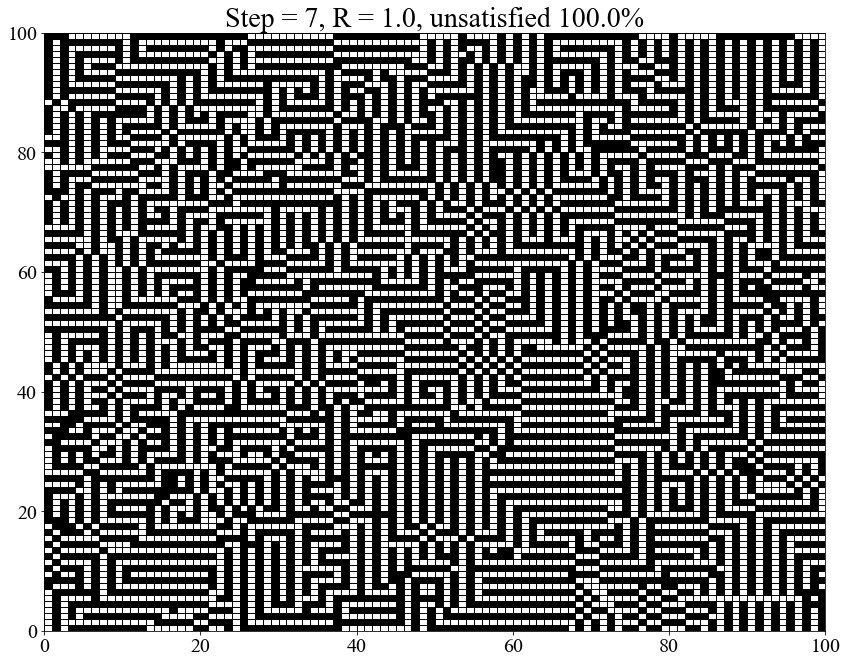

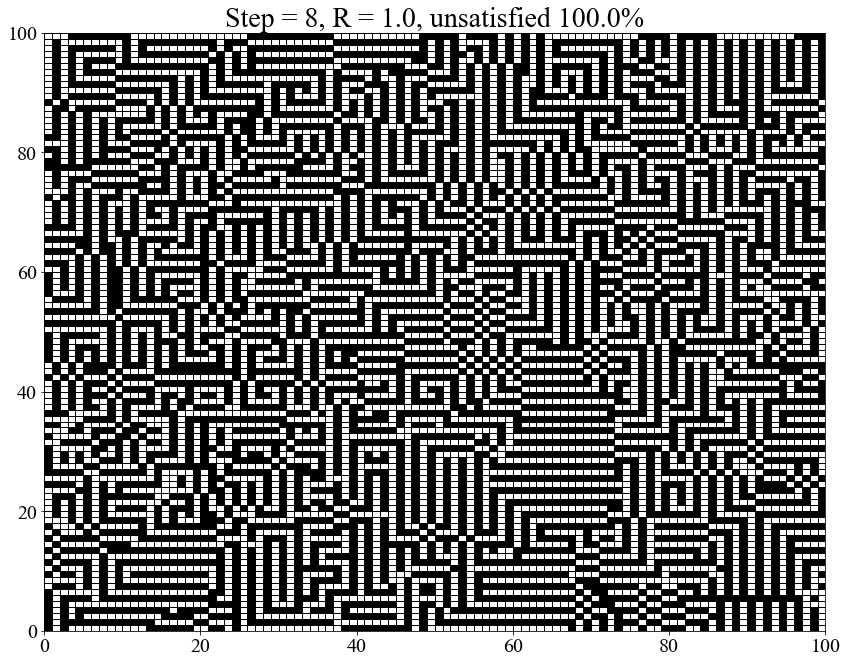

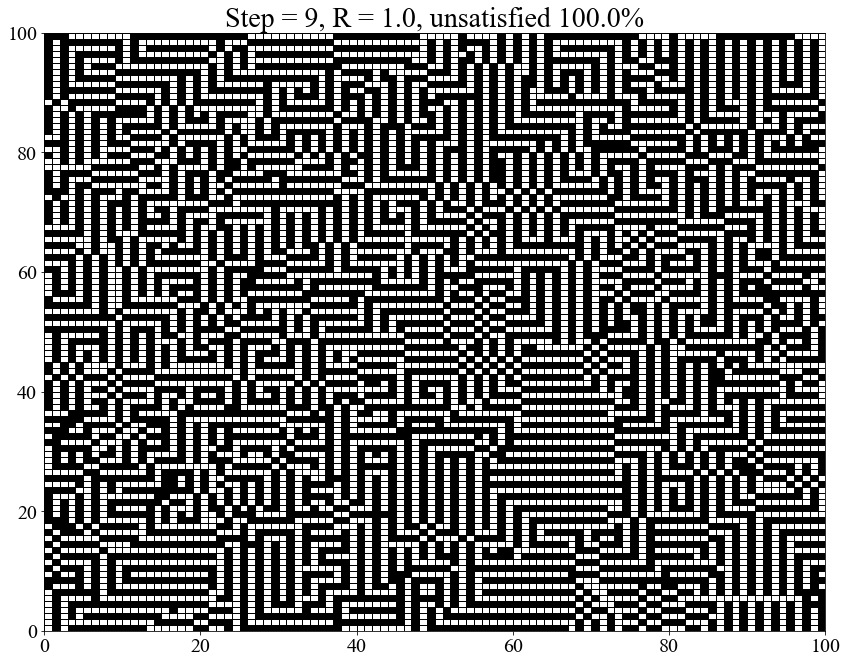

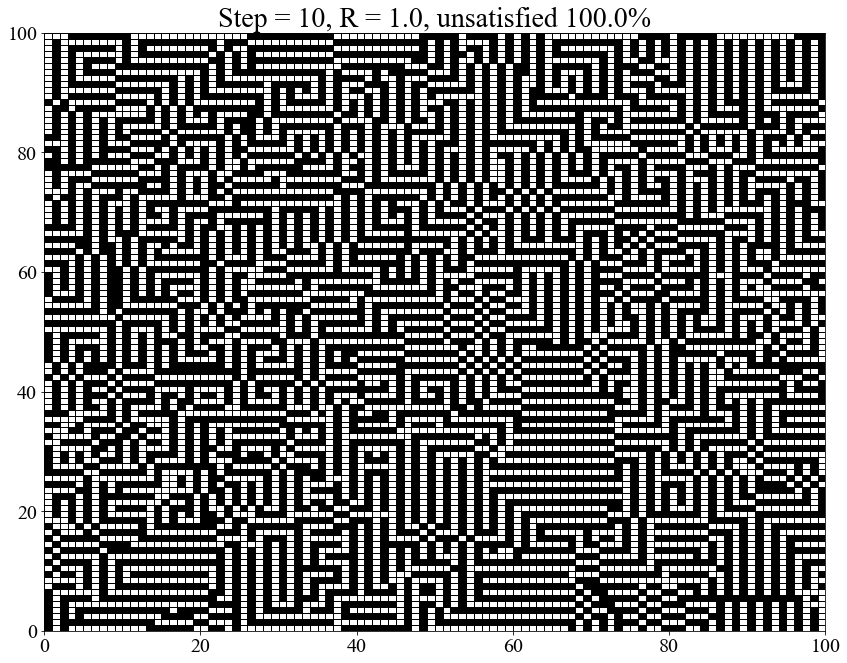

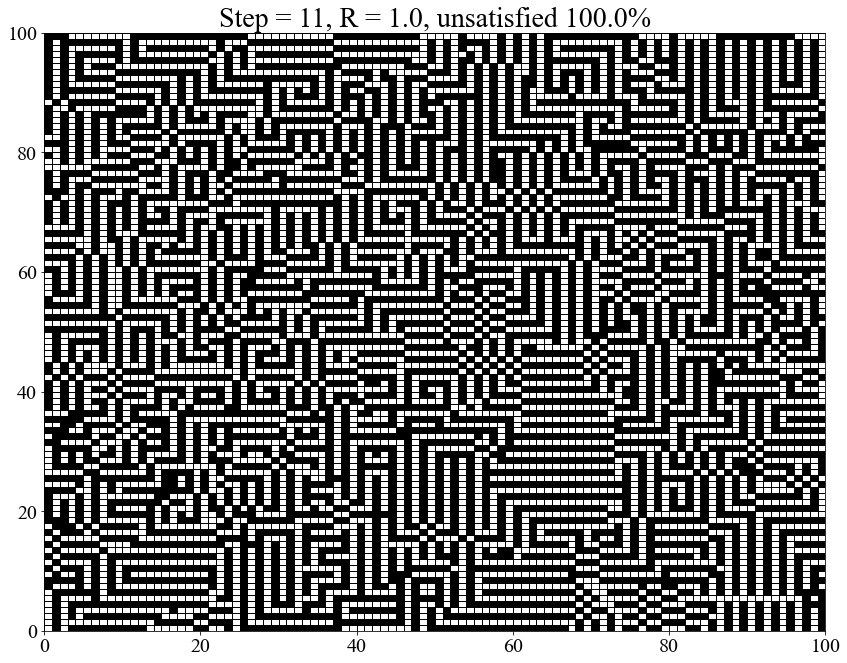

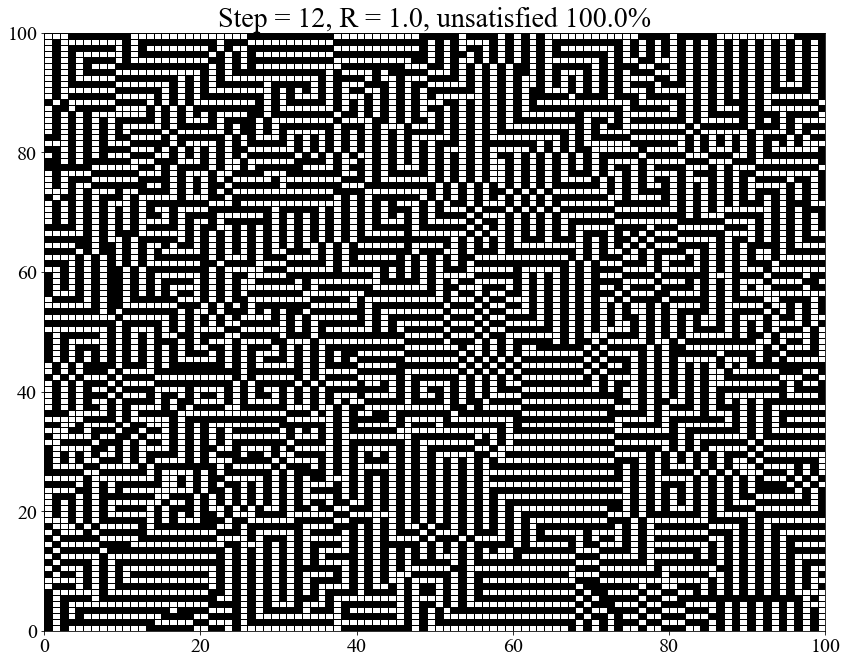

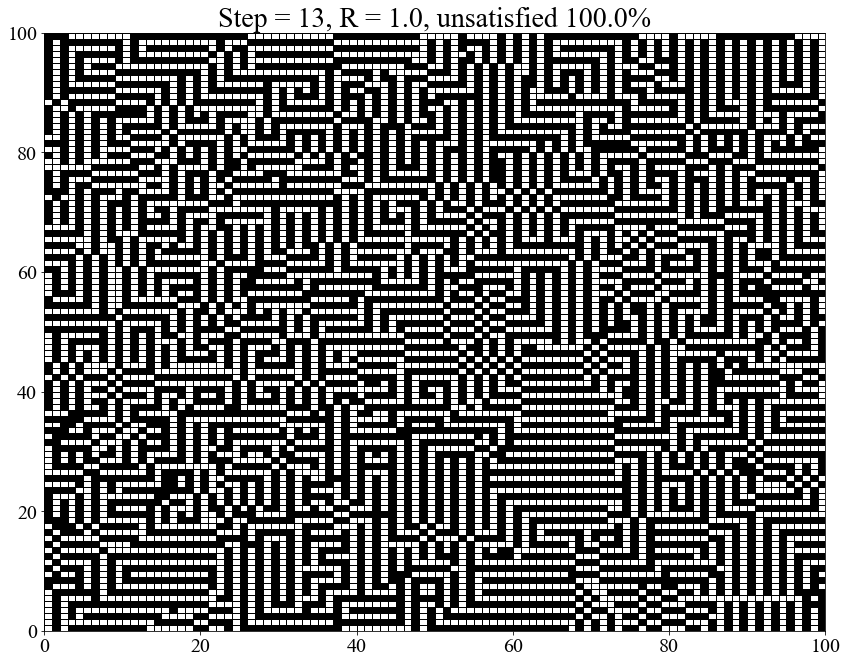

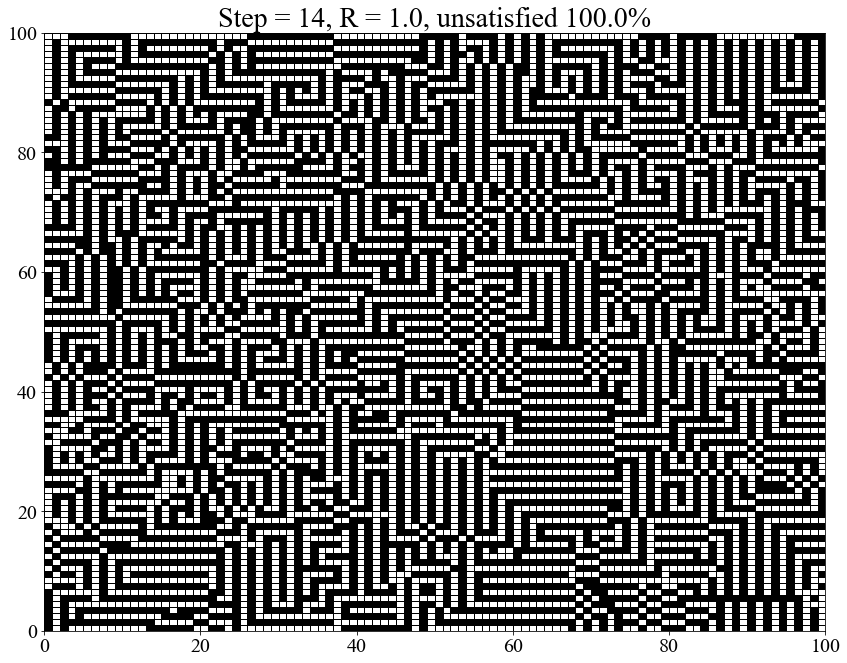

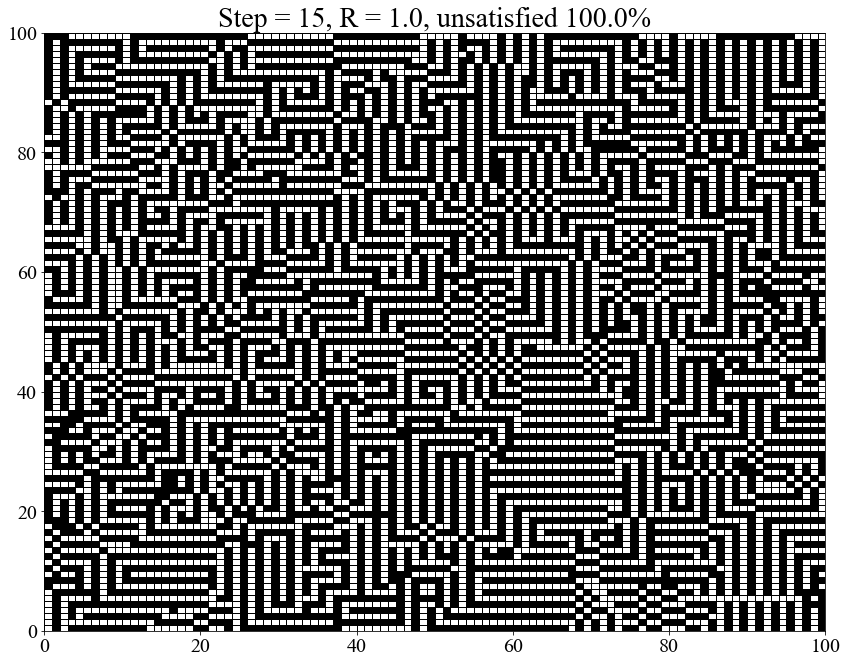

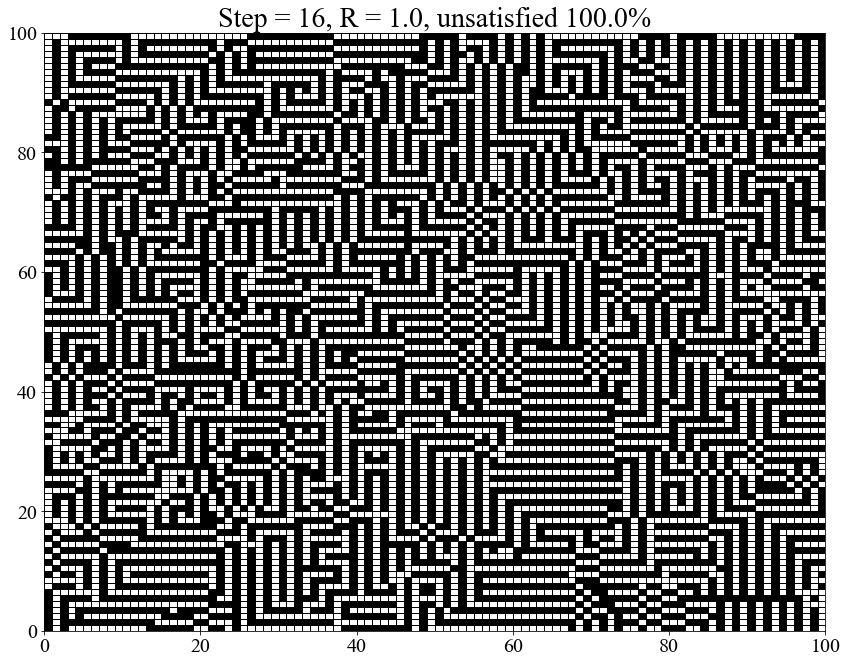

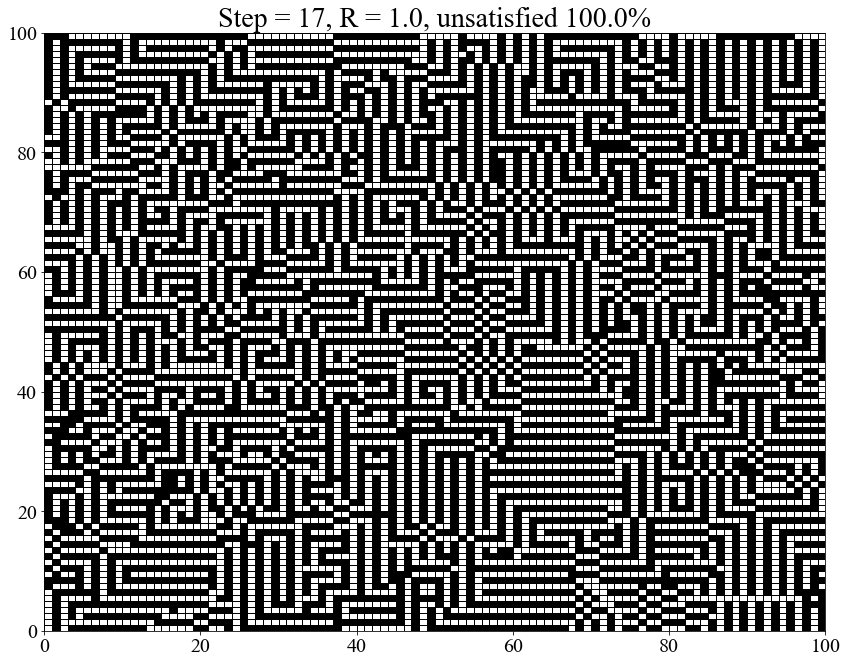

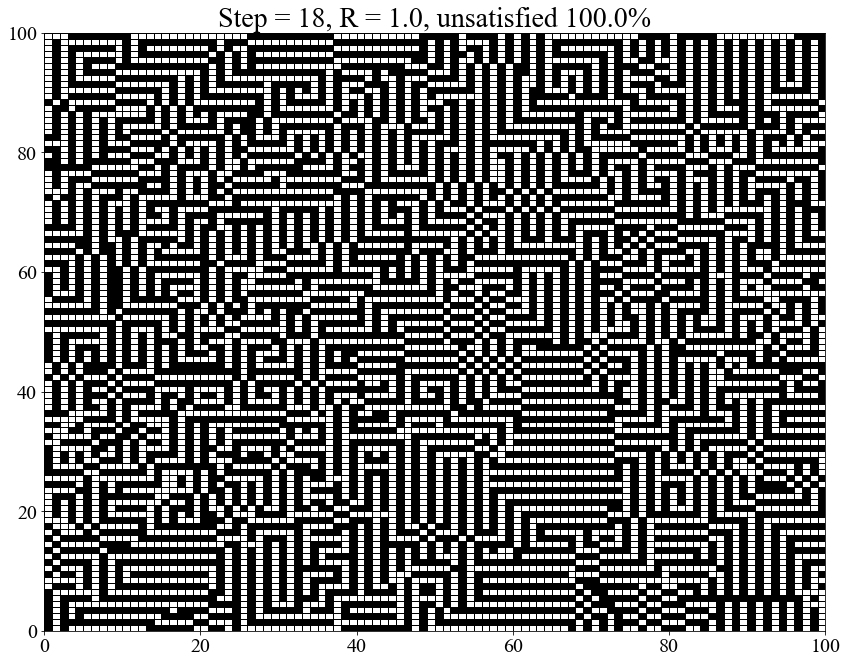

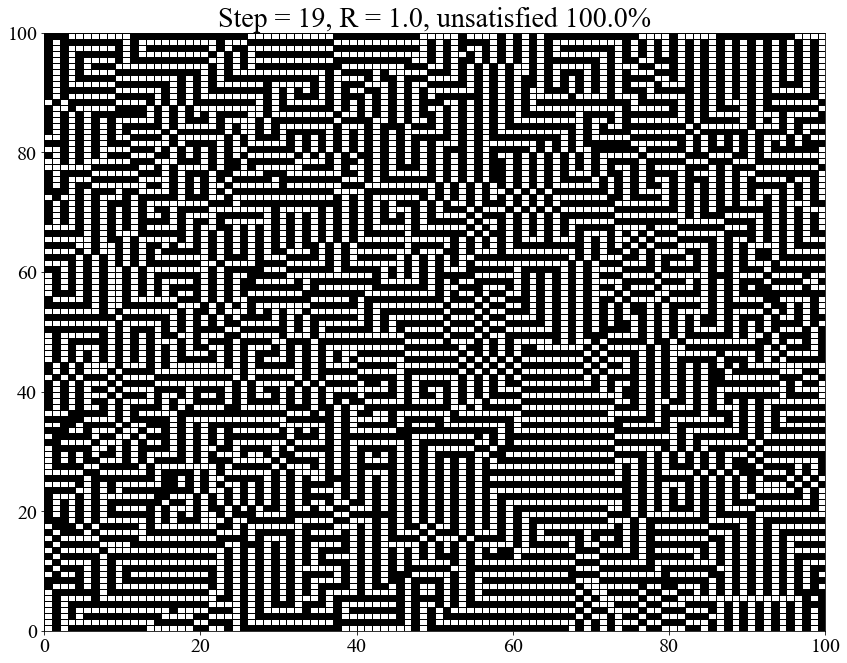

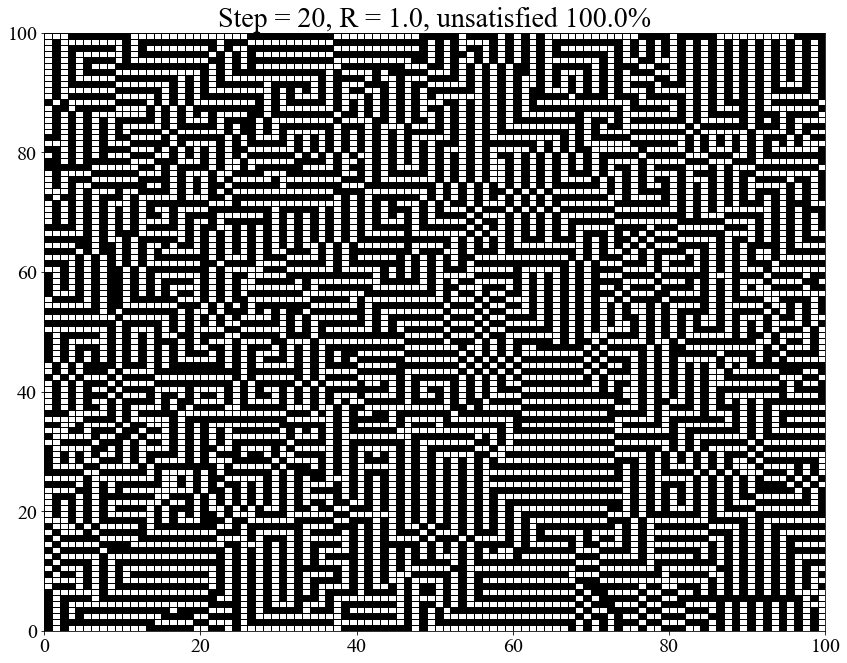

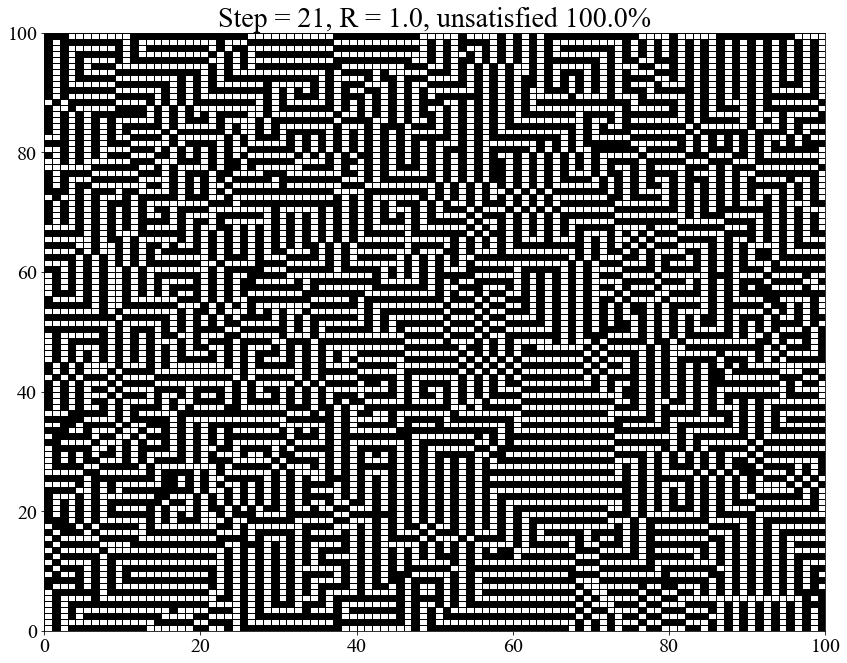

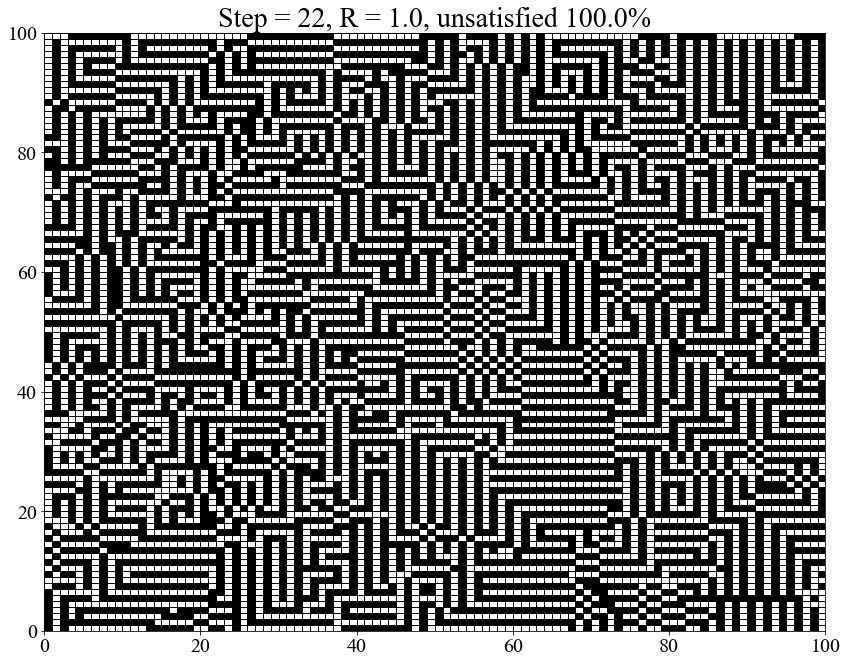

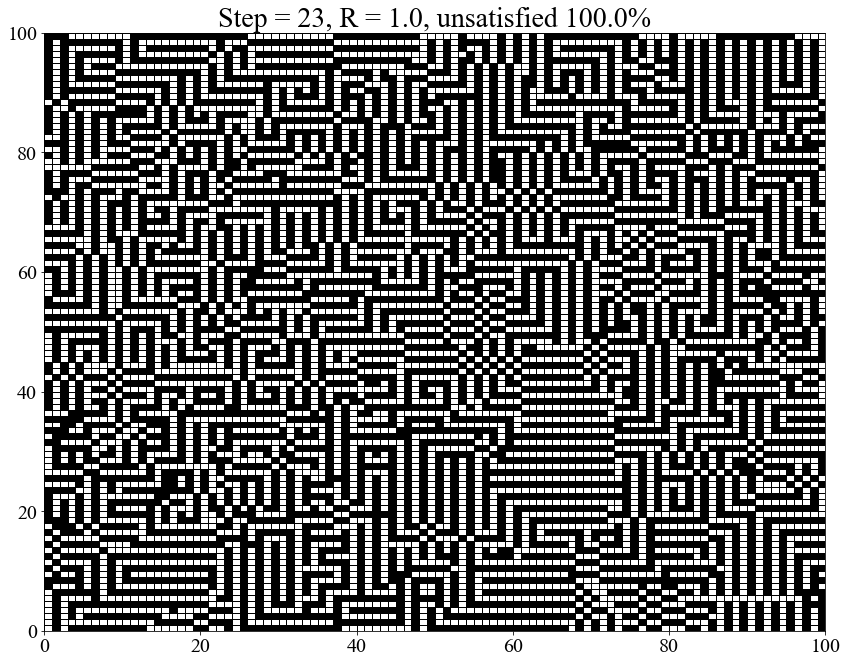

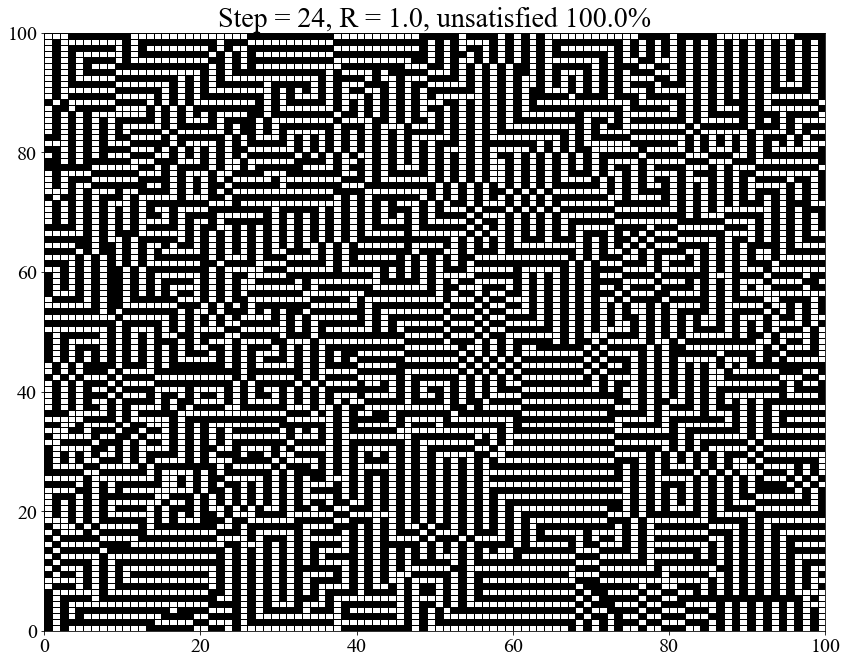

In [552]:
N = 100
ratio = 0.5

matrix = randomize(N, ratio)
max_step = 25
r = [0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 1]
count = np.zeros((9, max_step), dtype = int)

for i in r:
    matrix_temp = matrix
    count = calculation(N, matrix_temp, i * 8, max_step, count)

## Subtask 2: Plot number of households that want to move versus time for 9 values of R on one graph

### Plot the evolution

In [549]:
def evolution(count, max_step, ax = None):
    x = np.arange(0, max_step)
    y = np.arange(0, 9, 1)
    
    for i in y:
        ax.plot(x, (count[i] * 100 / (N * N)), label = f'R = {i / 8}', lw = 2)
        
    ax.set_title('Evolution of the number of unsatisfied household over time', fontname = 'Times New Roman', fontsize = 20, fontweight = 'bold')
    
    ax.set_xlabel('Number of steps', fontname = 'Times New Roman', fontsize = 18, fontstyle = 'oblique')
    ax.set_ylabel('Number of unsatisfied households, %', fontsize = 20, fontname = 'Times New Roman', fontstyle = 'oblique')
    
    plt.xticks(fontname = 'Times New Roman', fontsize = 15)
    ax.set_xlim(-1, max_step + 1)
    plt.yticks(fontname = 'Times New Roman', fontsize = 15)
    
    return ax

### Main function call

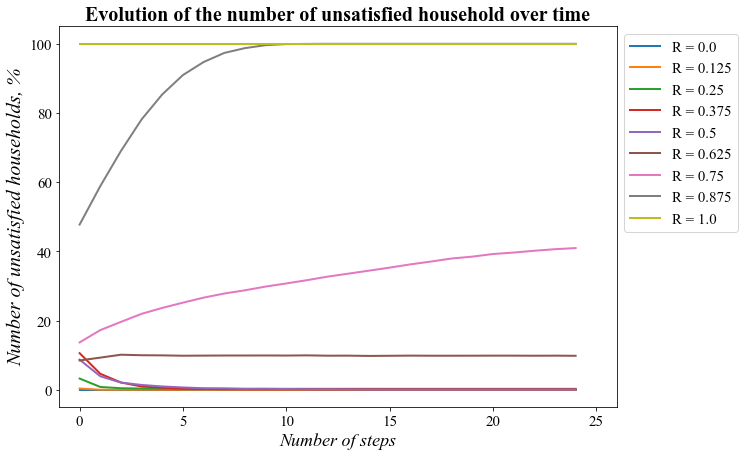

In [550]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax = evolution(count, max_step, ax)
plt.legend(prop={'family': 'Times New Roman', 'size': 15}, bbox_to_anchor = (1, 1))
plt.show()